# Airbnb Open Data
##### Kaggle link - https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
pd.set_option('display.max_columns',100)

### Loading Data and Basic Exploration

In [3]:
df = pd.read_csv('D:\\Data Science\\Datasets\\EDA\\02 Airbnb Open Data\\Airbnb_Open_Data.csv')
df.head(2)

C:\Users\Ajith\AppData\Local\Temp\ipykernel_4176\982805198.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:\\Data Science\\Datasets\\EDA\\02 Airbnb Open Data\\Airbnb_Open_Data.csv')


id                                NAME      host id  \
0  1001254  Clean & quiet apt home by the park  80014485718   
1  1002102               Skylit Midtown Castle  52335172823   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   

        lat      long        country country code instant_bookable  \
0  40.64749 -73.97237  United States           US            False   
1  40.75362 -73.98377  United States           US            False   

  cancellation_policy        room type  Construction year  price service fee  \
0              strict     Private room             2020.0  $966        $193    
1            moderate  Entire home/apt             2007.0  $142         $28    

   minimum nights  number of reviews last review  reviews per month  \
0            10.0                9.0  10/19/2021               0.21   
1            30.0               45.0   5/21/2022               0.38   

   review rate number  calculated host listings count  availability 365  \
0                 4.0                             6.0             286.0   
1                 4.0                             2.0             228.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN

In [4]:
df.columns = [x.lower() for x in df.columns]
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')

In [5]:
df.shape

(102599, 26)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(102058, 26)

In [8]:
df.info() # Dropped about more than 500 rows

<class 'pandas.core.frame.DataFrame'>
Index: 102058 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102058 non-null  int64  
 1   name                            101808 non-null  object 
 2   host_id                         102058 non-null  int64  
 3   host_identity_verified          101769 non-null  object 
 4   host_name                       101654 non-null  object 
 5   neighbourhood_group             102029 non-null  object 
 6   neighbourhood                   102042 non-null  object 
 7   lat                             102050 non-null  float64
 8   long                            102050 non-null  float64
 9   country                         101526 non-null  object 
 10  country_code                    101927 non-null  object 
 11  instant_bookable                101953 non-null  object 
 12  cancellation_policy  

In [9]:
df.isnull().sum()

id                                     0
name                                 250
host_id                                0
host_identity_verified               289
host_name                            404
neighbourhood_group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country_code                         131
instant_bookable                     105
cancellation_policy                   76
room_type                              0
construction_year                    214
price                                247
service_fee                          273
minimum_nights                       400
number_of_reviews                    183
last_review                        15832
reviews_per_month                  15818
review_rate_number                   319
calculated_host_listings_count       319
availability_365                     448
house_rules     

In [10]:
df.nunique()

id                                102058
name                               61281
host_id                           102057
host_identity_verified                 2
host_name                          13190
neighbourhood_group                    7
neighbourhood                        224
lat                                21991
long                               17774
country                                1
country_code                           1
instant_bookable                       2
cancellation_policy                    3
room_type                              4
construction_year                     20
price                               1151
service_fee                          231
minimum_nights                       153
number_of_reviews                    476
last_review                         2477
reviews_per_month                   1016
review_rate_number                     5
calculated_host_listings_count        78
availability_365                     438
house_rules     

## Data Cleaning

### Plan of action

We have null values of  the list below (only two columns not have null values)\

Will drop the columns which I feel it may not require for this EDA

> name                                 250 -- Dropping Column\
host_identity_verified               289 -- Filling with mode \
host_name                            404 -- Dropping Column\
neighbourhood_group                   29 -- Filling with mode\
neighbourhood                         16 -- Filling with mode\
lat                                    8 -- Dropping Column\
long                                   8 -- Dropping Column\
country                              532 -- Dropping Column\
country_code                         131 -- Dropping Column\
instant_bookable                     105 -- Filling with mode, since it has 2 category best approach in fill with random\
cancellation_policy                   76 -- Filling with mode, since it has 3 category best approach in fill with random\
construction_year                    214 -- Filling with mode\
price                                247 -- Filling with mode\
service_fee                          273 -- Filling with mode\
minimum_nights                       400 -- Filling with mode\
number_of_reviews                    183 -- Filling with mode\
last_review                        15832 -- Filling with mode\
reviews_per_month                  15818 -- Filling with mode\
review_rate_number                   319 -- Filling with mode\
calculated_host_listings_count       319 -- Filling with mode\
availability_365                     448 -- Filling with mode\
house_rules                        51842 -- Dropping Column\
license                           102056 -- Dropping Column

In [11]:
### Droping the columns as mentioned above

df.drop(columns=['name','host_id','host_name','lat','long','country','country_code','house_rules','license'],inplace=True)

In [12]:
df.shape

(102058, 17)

In [13]:
df.head(2)

id host_identity_verified neighbourhood_group neighbourhood  \
0  1001254            unconfirmed            Brooklyn    Kensington   
1  1002102               verified           Manhattan       Midtown   

  instant_bookable cancellation_policy        room_type  construction_year  \
0            False              strict     Private room             2020.0   
1            False            moderate  Entire home/apt             2007.0   

   price service_fee  minimum_nights  number_of_reviews last_review  \
0  $966        $193             10.0                9.0  10/19/2021   
1  $142         $28             30.0               45.0   5/21/2022   

   reviews_per_month  review_rate_number  calculated_host_listings_count  \
0               0.21                 4.0                             6.0   
1               0.38                 4.0                             2.0   

   availability_365  
0             286.0  
1             228.0

In [14]:
### Handling the NA Values
for i in df.columns:
    if (i == 'host_identity_verified'):
        mode = df[i].mode()[0]
        df.loc[df[i].isnull(), 'host_identity_verified'] = mode
    
    if (i == 'neighbourhood_group'):
        for j in df[i].value_counts().index:
            mode = df.loc[(df[i]==j), 'neighbourhood'].mode()[0]
            df.loc[(df[i]==j) & (df['neighbourhood'].isnull()),'neighbourhood'] = mode
    
    if (i == 'instant_bookable'):
        mode = df[i].mode()[0]
        df.loc[df[i].isnull(), 'instant_bookable'] = mode
    
    if (i == 'cancellation_policy'):
        mode = df[i].mode()[0]
        df.loc[df[i].isnull(), 'cancellation_policy'] = mode
        
    if (i == 'construction_year'):
        mode = df[i].mode()[0]
        df.loc[df[i].isnull(), 'construction_year'] = mode
    
    if (i == 'price'):
        mode = df[i].mode()[0]
        df.loc[df[i].isnull(), 'price'] = mode
        
    if (i == 'service_fee'):
        mode = df[i].mode()[0]
        df.loc[df[i].isnull(), 'service_fee'] = mode
        
    if (i == 'minimum_nights'):
        median = df[i].median()
        df.loc[df[i].isnull(), 'minimum_nights'] = median
        
    if (i == 'number_of_reviews'):
        median = df[i].median()
        df.loc[df[i].isnull(), 'number_of_reviews'] = median
    
    if (i == 'last_review'):
        mode = df[i].mode()[0]
        df.loc[df[i].isnull(), 'last_review'] = mode
    
    if (i == 'reviews_per_month'):
        mode = df[i].mode()[0]
        df.loc[df[i].isnull(), 'reviews_per_month'] = mode
    
    if (i == 'review_rate_number'):
        median = df[i].median()
        df.loc[df[i].isnull(), 'review_rate_number'] = median
        
    if (i == 'calculated_host_listings_count'):
        median = df[i].median()
        df.loc[df[i].isnull(), 'calculated_host_listings_count'] = median
        
    if (i == 'availability_365'):
        mode = df[i].mode()[0]
        df.loc[df[i].isnull(), 'availability_365'] = mode
        

In [15]:
neig_grp = df.loc[(df['neighbourhood_group'].isnull()),'neighbourhood']
neig_grp

for i in neig_grp:
    mode = df.loc[(df['neighbourhood'] == i) & (df['neighbourhood_group'].notnull()),'neighbourhood_group'].mode()[0]
    df.loc[(df['neighbourhood_group'].isnull()) & (df['neighbourhood'] == i), 'neighbourhood_group'] = mode

In [16]:
df.loc[(df['neighbourhood'] == 'Queens Village') & (df['neighbourhood_group'].notnull()),'neighbourhood_group'].mode()[0]

'Queens'

In [17]:
df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        43570
Brooklyn         41643
Queens           13199
Bronx             2695
Staten Island      949
brookln              1
manhatan             1
Name: count, dtype: int64

In [18]:
df.replace({'brookln':'Brooklyn','manhatan':'Manhattan'}, inplace=True)

In [19]:
df.isnull().sum()

id                                0
host_identity_verified            0
neighbourhood_group               0
neighbourhood                     0
instant_bookable                  0
cancellation_policy               0
room_type                         0
construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### checking the value counts for standardization 

In [20]:
df.columns

for i in df.columns:
    #print(i)
    print(i, '\n',df[i].value_counts(),'-'*50, '\n')

id 
 id
1001254     1
38582590    1
38581485    1
38580933    1
38580380    1
           ..
19789477    1
19788925    1
19788373    1
19787821    1
57367417    1
Name: count, Length: 102058, dtype: int64 -------------------------------------------------- 

host_identity_verified 
 host_identity_verified
unconfirmed    51233
verified       50825
Name: count, dtype: int64 -------------------------------------------------- 

neighbourhood_group 
 neighbourhood_group
Manhattan        43571
Brooklyn         41644
Queens           13199
Bronx             2695
Staten Island      949
Name: count, dtype: int64 -------------------------------------------------- 

neighbourhood 
 neighbourhood
Bedford-Stuyvesant        7906
Williamsburg              7732
Harlem                    5449
Bushwick                  4956
Hell's Kitchen            3949
                          ... 
Willowbrook                  3
Gerritsen Beach              3
Fort Wadsworth               2
Glen Oaks                    

In [21]:
### Standardizing  minimum nights column

df['minimum_nights'].unique()

array([ 1.000e+01,  3.000e+01,  3.000e+00,  4.500e+01,  2.000e+00,
        1.000e+00,  5.000e+00,  4.000e+00,  9.000e+01,  7.000e+00,
        1.400e+01,  6.000e+01,  1.800e+02,  9.000e+00,  3.100e+01,
        6.000e+00,  1.500e+01,  2.900e+01,  8.000e+00,  4.700e+01,
        8.100e+01,  1.440e+02,  3.710e+02,  1.490e+02,  2.730e+02,
        1.310e+02,  2.750e+02,  3.230e+02,  5.900e+01,  9.900e+01,
        2.680e+02, -1.000e+01,  1.890e+02,  3.400e+02,  1.280e+02,
        3.500e+02,  1.660e+02,  1.100e+02,  5.700e+01,  1.420e+02,
        3.660e+02,  2.800e+01,  2.000e+02,  5.000e+01,  3.990e+02,
        1.700e+01,  1.100e+01,  4.520e+02,  2.500e+01,  1.300e+01,
        3.455e+03, -5.000e+00,  2.100e+01,  2.700e+01,  1.800e+01,
        3.650e+02, -1.000e+00,  2.000e+01, -1.200e+01,  4.000e+01,
        4.400e+01,  3.980e+02, -2.000e+00,  6.500e+01, -3.000e+00,
        5.500e+01,  1.200e+02,  1.220e+02,  1.900e+01,  2.400e+02,
        8.800e+01,  1.150e+02,  1.500e+02,  3.700e+02,  1.600e

In [22]:
df['minimum_nights']=df['minimum_nights'].astype(float)
negative = df['minimum_nights'].value_counts().index

for i in negative:
    if i < 0:
        num = -i
        
        print(i, num)
        
        df['minimum_nights'] = df['minimum_nights'].replace(to_replace=i,value=num)
        
        
### Standaradization completed for minimum nights

-10.0 10.0
-125.0 125.0
-1223.0 1223.0
-365.0 365.0
-200.0 200.0
-2.0 2.0
-12.0 12.0
-1.0 1.0
-5.0 5.0
-3.0 3.0


In [23]:
df['availability_365'].unique()

array([ 2.860e+02,  2.280e+02,  3.520e+02,  3.220e+02,  2.890e+02,
        3.740e+02,  2.240e+02,  2.190e+02,  1.800e+02,  3.750e+02,
        1.000e+00,  1.630e+02,  2.580e+02,  4.700e+01,  6.800e+01,
        1.000e+02,  1.970e+02,  9.600e+01,  3.250e+02,  3.450e+02,
        3.470e+02,  1.930e+02,  5.400e+01,  9.000e+00,  3.440e+02,
        3.720e+02,  1.030e+02,  1.720e+02,  5.600e+01,  1.050e+02,
        1.690e+02,  3.830e+02,  4.110e+02,  7.600e+01,  4.160e+02,
        2.940e+02,  2.140e+02,  3.560e+02,  1.100e+02,  3.540e+02,
        3.300e+01,  4.050e+02,  8.600e+01,  1.520e+02,  3.530e+02,
        2.600e+01,  3.200e+01,  8.500e+01,  0.000e+00,  8.200e+01,
        9.200e+01,  5.500e+01,  1.580e+02,  6.400e+01,  1.840e+02,
        2.010e+02,  3.280e+02,  3.930e+02,  6.100e+01,  2.670e+02,
        1.890e+02,  8.300e+01,  4.000e+02,  3.400e+01,  2.030e+02,
        3.500e+01,  2.800e+02,  4.170e+02,  1.620e+02,  2.370e+02,
        2.420e+02,  2.270e+02,  1.730e+02,  1.460e+02,  2.430e

In [24]:
df['availability_365']=df['availability_365'].astype(float)
negative = df['availability_365'].value_counts().index

for i in negative:
    print
    if i < 0:
        num = -i
        df['availability_365'] = df['availability_365'].replace(to_replace=i,value=num)
        print(i, num)
        
# Standardization completed for availability 

-5.0 5.0
-8.0 8.0
-9.0 9.0
-1.0 1.0
-2.0 2.0
-3.0 3.0
-4.0 4.0
-10.0 10.0
-7.0 7.0
-6.0 6.0


In [25]:
## Standardizing the price

df['price'] = df['price'].str.replace(r'[$,]', '', regex=True).astype(float)

In [26]:
df['service_fee'] = df['service_fee'].str.replace(r'[$,]', '', regex=True).astype(float)

### Detecting outlier using Standard deviation and z-score for price and service fee

In [27]:
upper_price = df.price.mean() + 3*df.price.std()
upper_price

1620.0744787756248

In [28]:
lower_price = df.price.mean() - 3*df.price.std()
lower_price

-371.3931603096544

In [29]:
df.price.max()

1200.0

In [30]:
df.price.min()

50.0

In [31]:
df.describe().T

count          mean           std  \
id                              102058.0  2.918438e+07  1.627173e+07   
construction_year               102058.0  2.012491e+03  5.760204e+00   
price                           102058.0  6.243407e+02  3.319113e+02   
service_fee                     102058.0  1.252826e+02  6.640355e+01   
minimum_nights                  102058.0  8.145270e+00  3.054802e+01   
number_of_reviews               102058.0  2.748116e+01  4.953489e+01   
reviews_per_month               102058.0  1.166883e+00  1.679003e+00   
review_rate_number              102058.0  3.277862e+00  1.283174e+00   
calculated_host_listings_count  102058.0  7.915254e+00  3.221822e+01   
availability_365                102058.0  1.404708e+02  1.354052e+02   

                                       min          25%          50%  \
id                              1001254.00  15092856.25  29184376.50   
construction_year                  2003.00      2008.00      2012.00   
price                                50.00       338.00       623.00   
service_fee                          10.00        68.00       125.00   
minimum_nights                        1.00         2.00         3.00   
number_of_reviews                     0.00         1.00         7.00   
reviews_per_month                     0.01         0.09         0.48   
review_rate_number                    1.00         2.00         3.00   
calculated_host_listings_count        1.00         1.00         1.00   
availability_365                      0.00         3.00        95.00   

                                        75%         max  
id                              43275897.00  57367417.0  
construction_year                   2017.00      2022.0  
price                                912.00      1200.0  
service_fee                          183.00       240.0  
minimum_nights                         5.00      5645.0  
number_of_reviews                     30.00      1024.0  
reviews_per_month                      1.71        90.0  
review_rate_number                     4.00         5.0  
calculated_host_listings_count         2.00       332.0  
availability_365                     268.00      3677.0

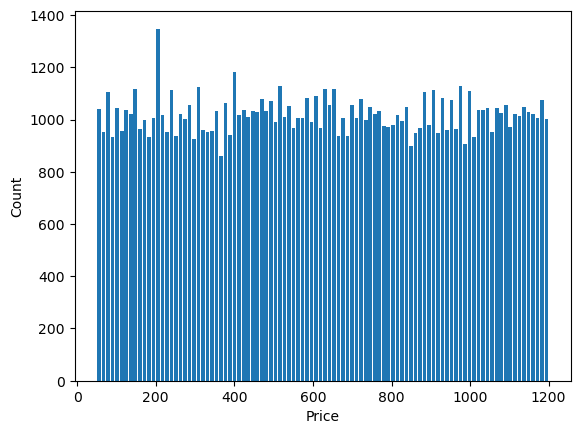

In [32]:
## Plotting hist plot for price to see outliers
plt.hist(df.price, bins=100, rwidth=0.8)
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

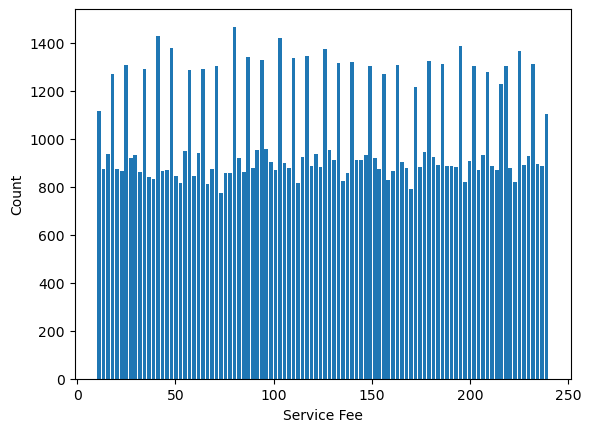

In [33]:
## Plotting hist plot to see outliers
plt.hist(df.service_fee, bins=100, rwidth=0.8)
plt.xlabel('Service Fee')
plt.ylabel('Count')
plt.show()

In [34]:
results = df.groupby('neighbourhood_group').sum()
results

id  \
neighbourhood_group                  
Bronx                  84287980299   
Brooklyn             1206817005973   
Manhattan            1252156268207   
Queens                405252052482   
Staten Island          29985800082   

                                                host_identity_verified  \
neighbourhood_group                                                      
Bronx                unconfirmedunconfirmedverifiedverifiedverified...   
Brooklyn             unconfirmedunconfirmedunconfirmedunconfirmedve...   
Manhattan            verifiedunconfirmedverifiedverifiedverifiedunc...   
Queens               unconfirmedunconfirmedunconfirmedunconfirmedun...   
Staten Island        unconfirmedunconfirmedunconfirmedunconfirmedve...   

                                                         neighbourhood  \
neighbourhood_group                                                      
Bronx                HighbridgeHighbridgeClason PointEastchesterKin...   
Brooklyn             KensingtonClinton HillBedford-StuyvesantBedfor...   
Manhattan            MidtownHarlemEast HarlemMurray HillHell's Kitc...   
Queens               Long Island CityWoodsideFlushingSunnysideRidge...   
Staten Island        St. GeorgeTompkinsvilleTompkinsvilleTompkinsvi...   

                     instant_bookable  \
neighbourhood_group                     
Bronx                            1363   
Brooklyn                        20712   
Manhattan                       21684   
Queens                           6519   
Staten Island                     489   

                                                   cancellation_policy  \
neighbourhood_group                                                      
Bronx                flexibleflexiblemoderateflexiblestrictmoderate...   
Brooklyn             strictmoderatemoderatemoderatemoderatemoderate...   
Manhattan            moderateflexiblemoderateflexiblestrictstrictfl...   
Queens               flexibleflexiblestrictmoderateflexiblemoderate...   
Staten Island        strictflexiblestrictflexiblemoderateflexiblemo...   

                                                             room_type  \
neighbourhood_group                                                      
Bronx                Private roomPrivate roomPrivate roomEntire hom...   
Brooklyn             Private roomEntire home/aptPrivate roomPrivate...   
Manhattan            Entire home/aptPrivate roomEntire home/aptEnti...   
Queens               Private roomPrivate roomPrivate roomPrivate ro...   
Staten Island        Private roomPrivate roomPrivate roomPrivate ro...   

                     construction_year       price  service_fee  \
neighbourhood_group                                               
Bronx                        5423686.0   1689155.0     338687.0   
Brooklyn                    83809433.0  26052264.0    5226375.0   
Manhattan                   87685696.0  27082927.0    5435543.0   
Queens                      26562882.0   8303700.0    1666798.0   
Staten Island                1909136.0    590913.0     118685.0   

                     minimum_nights  number_of_reviews  \
neighbourhood_group                                      
Bronx                       16227.0            85548.0   
Brooklyn                   303883.0          1188776.0   
Manhattan                  420225.0          1052078.0   
Queens                      85330.0           444299.0   
Staten Island                5625.0            33971.0   

                                                           last_review  \
neighbourhood_group                                                      
Bronx                7/4/20196/30/20196/23/20196/27/20191/2/20196/2...   
Brooklyn             10/19/20217/5/201910/5/201710/5/20176/24/20196...   
Manhattan            5/21/20226/23/201911/19/20186/22/20196/24/2019...   
Queens               7/1/20196/23/20196/23/20194/12/20195/12/20195/...   
Staten Island        6/13/20196/23/20196/23/20196/23/20197/2/20192/...   

     

In [35]:
df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        43571
Brooklyn         41644
Queens           13199
Bronx             2695
Staten Island      949
Name: count, dtype: int64

neighbourhood_group
Manhattan        43571
Brooklyn         41644
Queens           13199
Bronx             2695
Staten Island      949
Name: count, dtype: int64


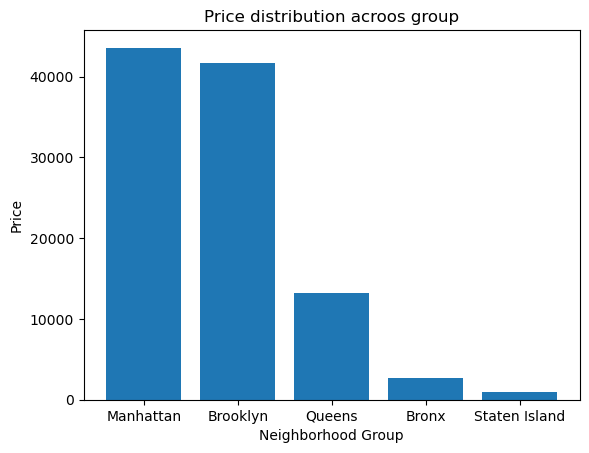

In [36]:
### visualization
neigh_grp = df['neighbourhood_group'].value_counts()
print(neigh_grp)

plt.bar(neigh_grp.index,neigh_grp.values)
plt.title('Price distribution acroos group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

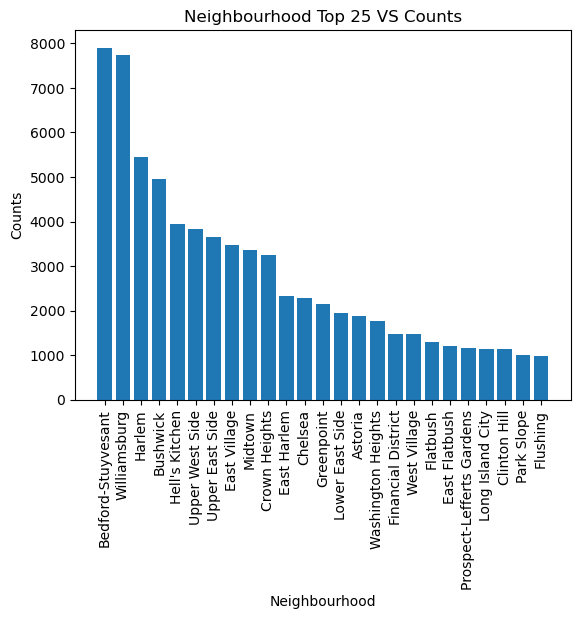

In [37]:
# Get the top 10 neighborhoods
neigh = df['neighbourhood'].value_counts().head(25)
neigh

plt.bar(neigh.index, neigh.values)
plt.title('Neighbourhood Top 25 VS Counts')
plt.xlabel('Neighbourhood')
plt.ylabel('Counts')
plt.xticks(neigh.index, rotation=90)
plt.show()

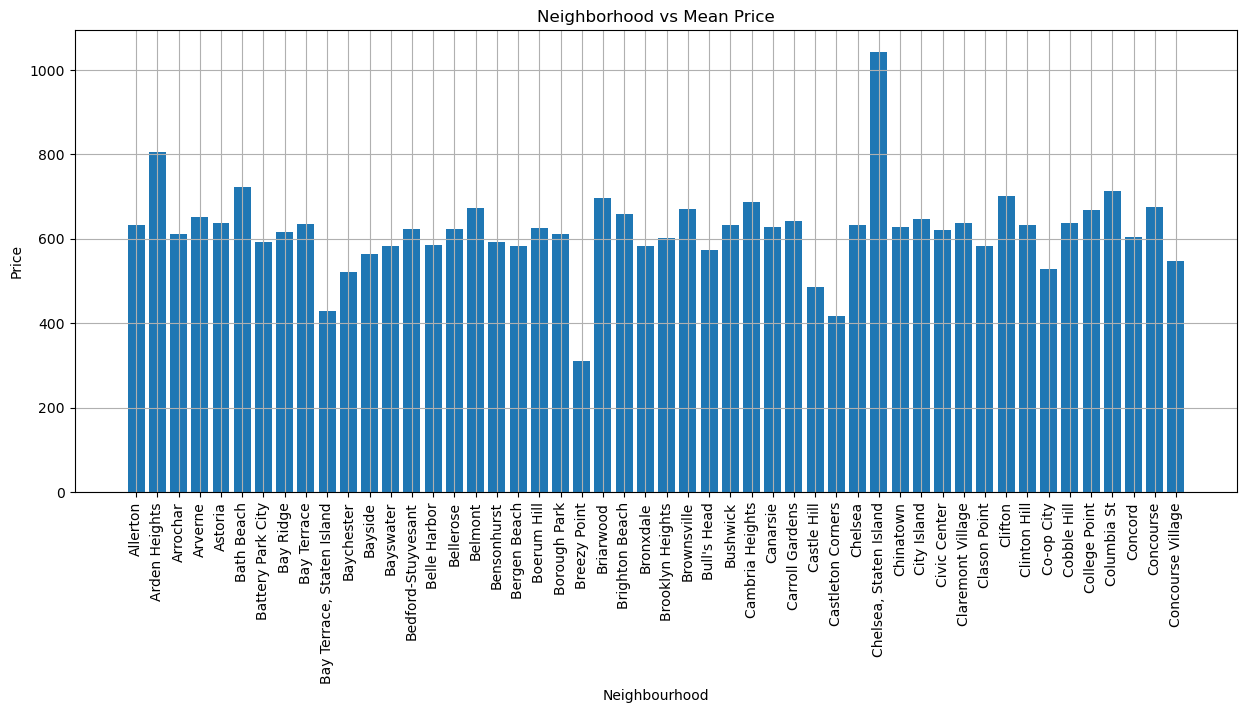

In [38]:
prices = df.groupby('neighbourhood')['price'].mean(numeric_only=True).head(50)
#prices = prices.sort_values(ascending=False).head(10)
prices.values

plt.figure(figsize=(15,6))

plt.bar(prices.index, prices.values)
plt.title('Neighborhood vs Mean Price')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.xticks(prices.index, rotation=90, size=10)
plt.grid()

plt.show()

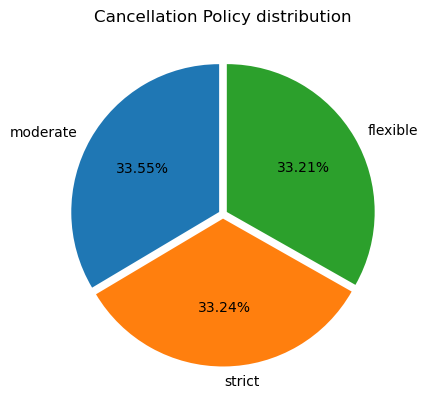

In [39]:
canl_pol = df['cancellation_policy'].value_counts()

plt.pie(canl_pol.values, labels=canl_pol.index, autopct='%1.2f%%', explode =[0.03,0.03,0.03],startangle=90)
plt.title('Cancellation Policy distribution')
plt.show()

room_type
Entire home/apt    53429
Private room       46306
Shared room         2208
Hotel room           115
Name: count, dtype: int64


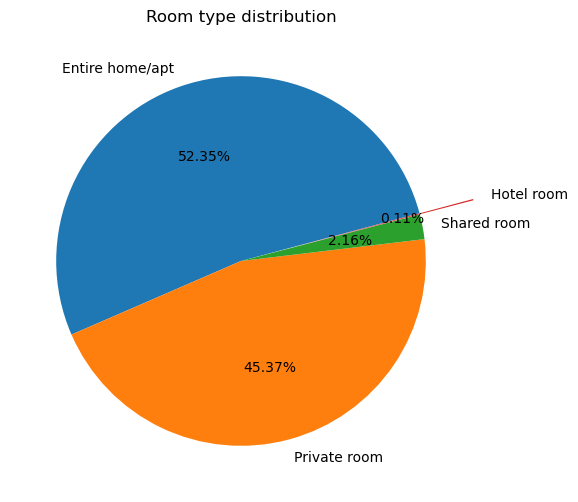

In [40]:
room_typ = df['room_type'].value_counts()
print(room_typ)
plt.figure(figsize=(15,6))
plt.pie(room_typ.values, labels=room_typ.index, autopct='%1.2f%%',startangle=15, 
        radius=1, normalize=True, explode=[0, 0, 0, 0.3])
plt.title('Room type distribution')
plt.show()

In [41]:
df[['price', 'service_fee', 'review_rate_number', 'availability_365']].head(10)

price  service_fee  review_rate_number  availability_365
0   966.0        193.0                 4.0             286.0
1   142.0         28.0                 4.0             228.0
2   620.0        124.0                 5.0             352.0
3   368.0         74.0                 4.0             322.0
4   204.0         41.0                 3.0             289.0
5   577.0        115.0                 3.0             374.0
6    71.0         14.0                 5.0             224.0
7  1060.0        212.0                 5.0             219.0
8  1018.0        204.0                 3.0             180.0
9   291.0         58.0                 5.0             375.0

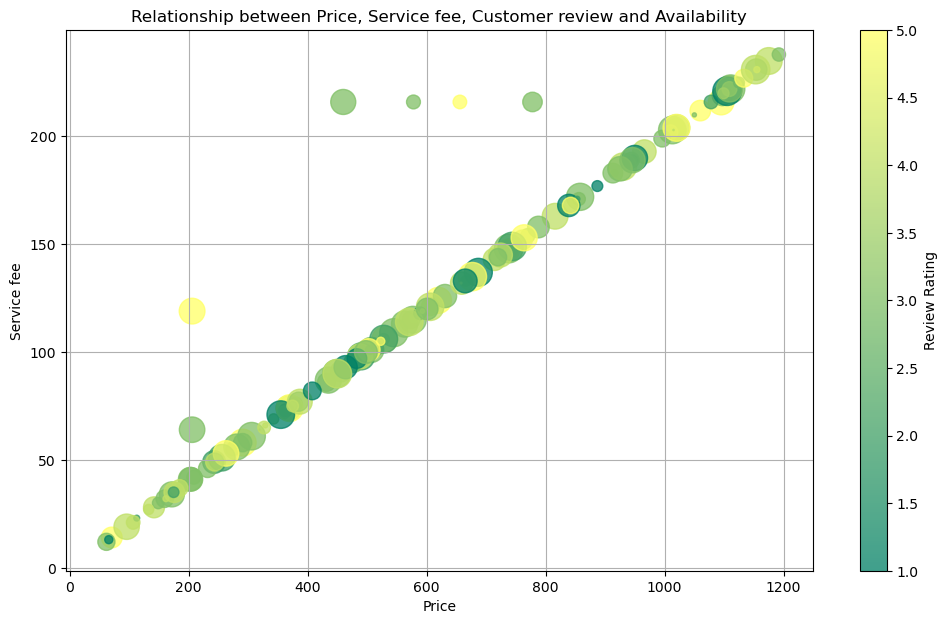

In [42]:
i=200
x = df['price'].head(i)
y = df['service_fee'].head(i)
colour = df['review_rate_number'].head(i)
avail = df['availability_365'].head(i)
#plt.figure(figsize=(15,6))
plt.figure(figsize=(10,6))
plt.scatter(x,y, c=colour,s=avail, cmap='summer', alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Review Rating')

plt.tight_layout()
plt.xlabel('Price')
plt.ylabel('Service fee')
plt.title('Relationship between Price, Service fee, Customer review and Availability')
plt.grid()

Kensington


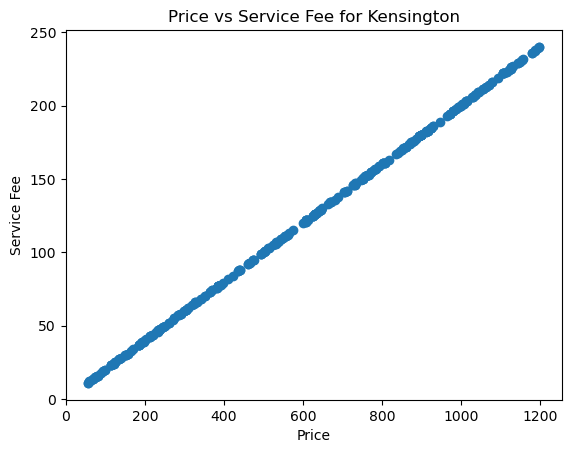

Midtown


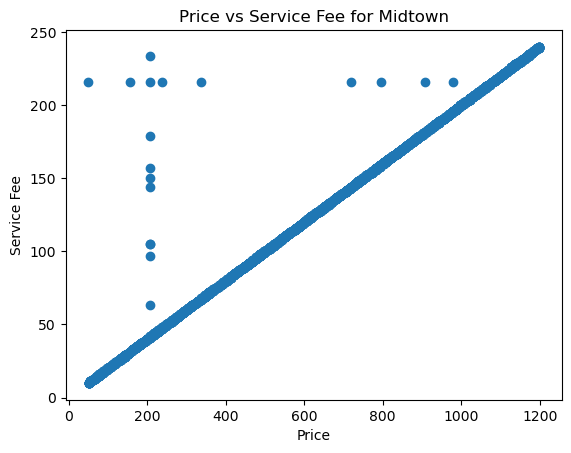

Harlem


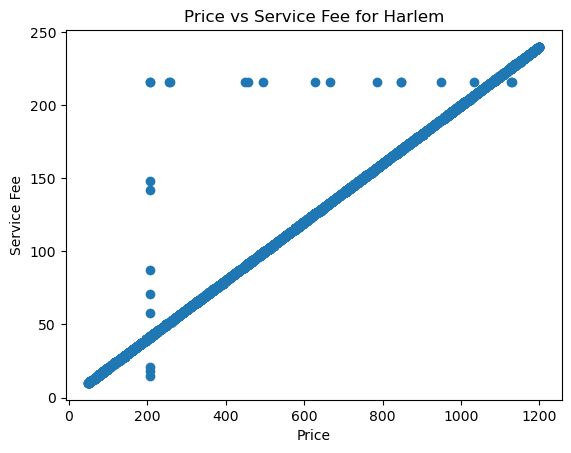

Clinton Hill


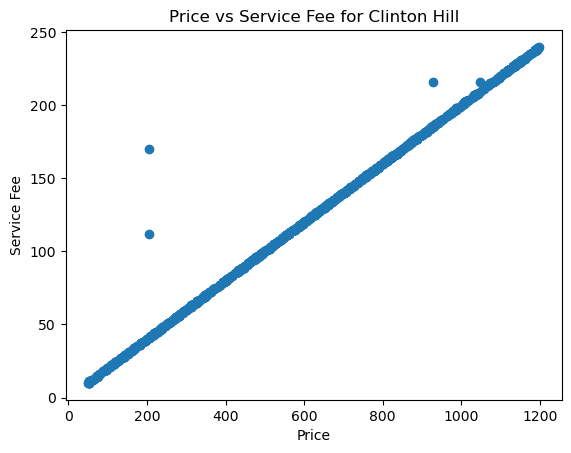

East Harlem


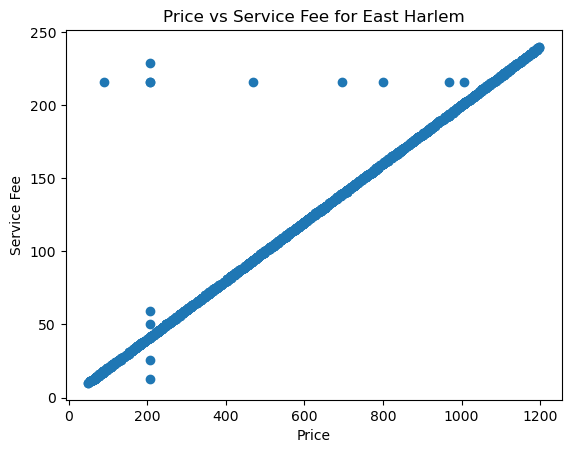

Murray Hill


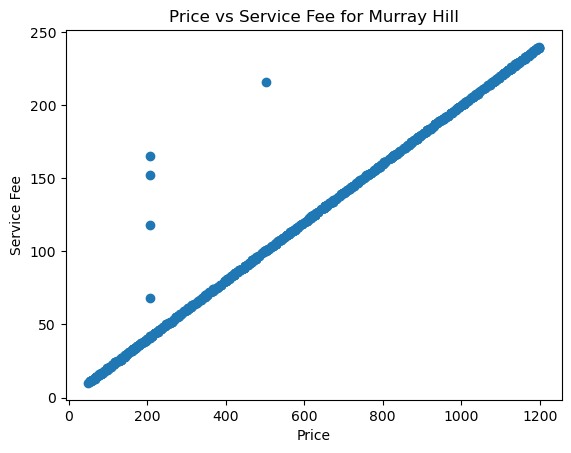

Bedford-Stuyvesant


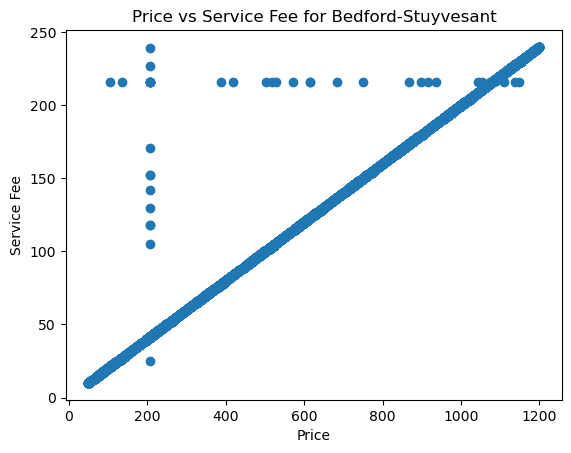

Hell's Kitchen


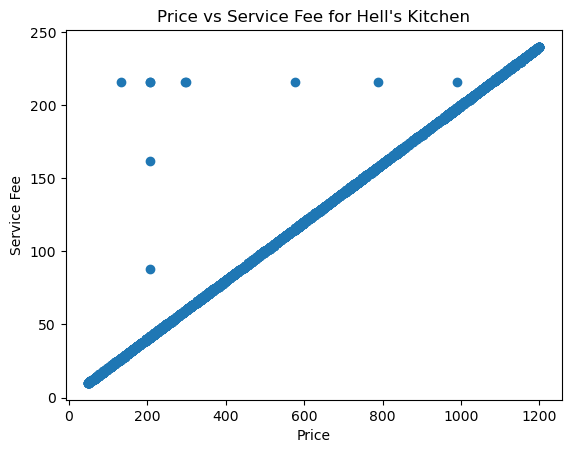

Upper West Side


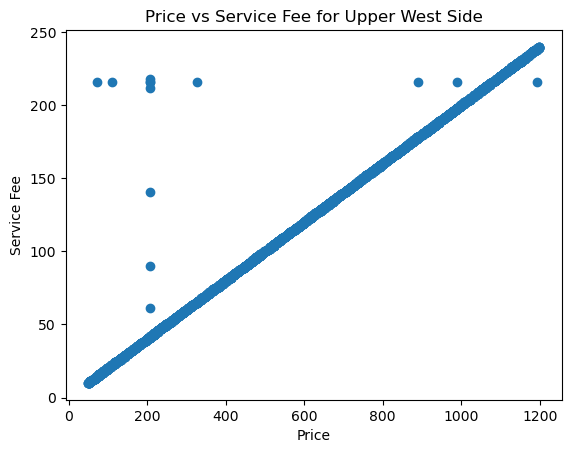

Chinatown


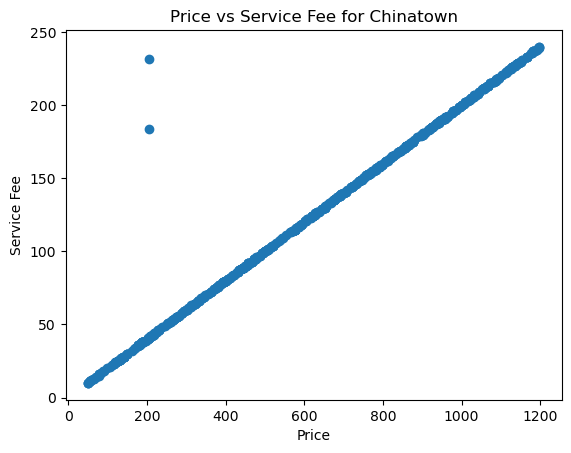

South Slope


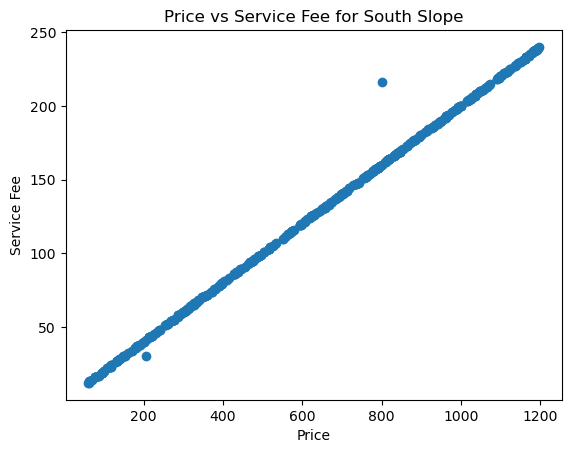

West Village


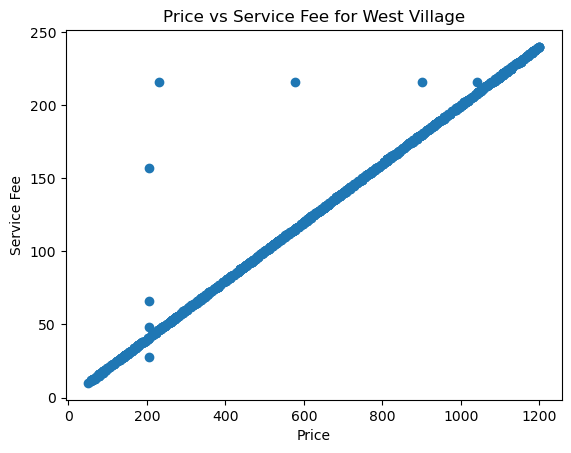

Williamsburg


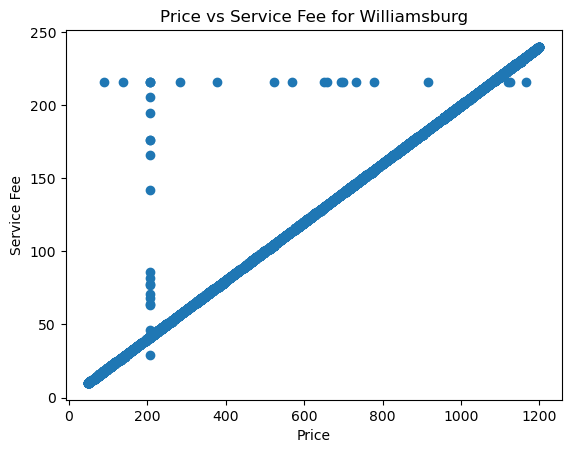

Fort Greene


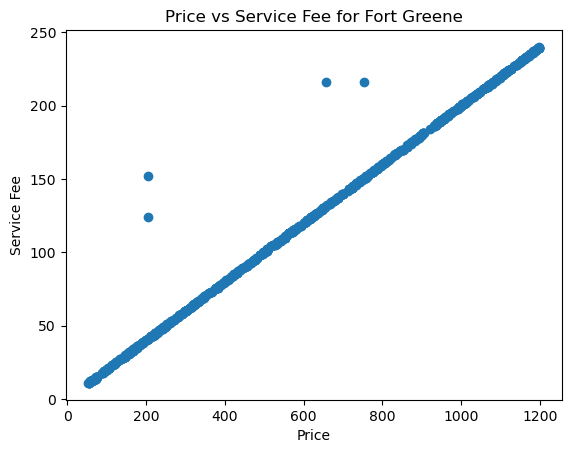

Chelsea


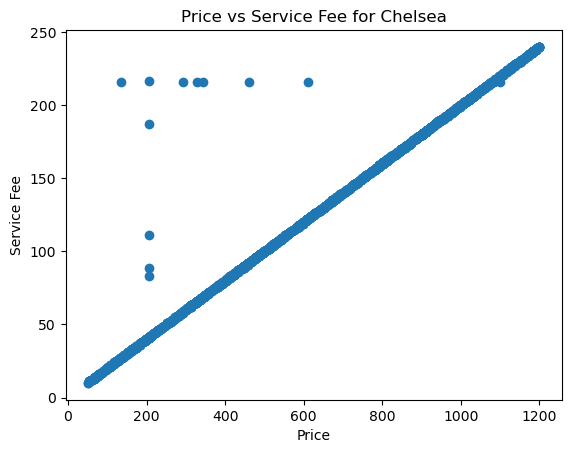

Crown Heights


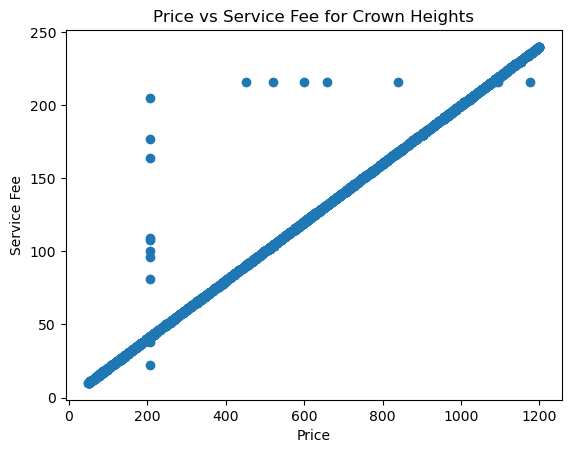

Park Slope


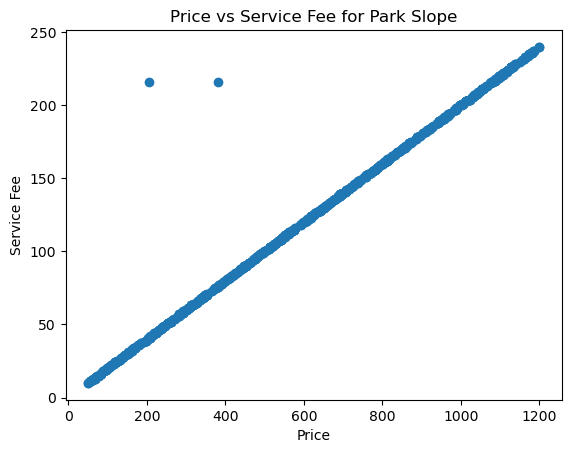

Windsor Terrace


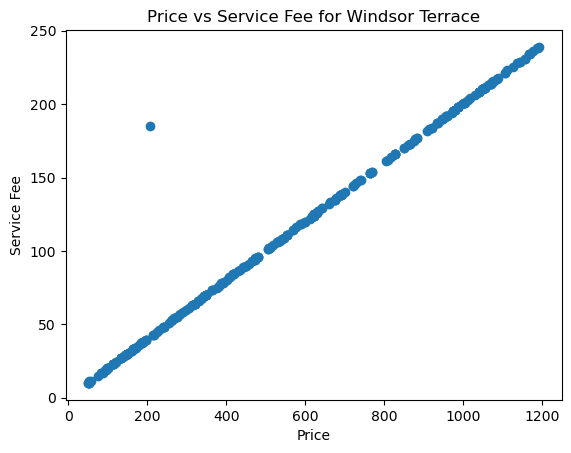

Inwood


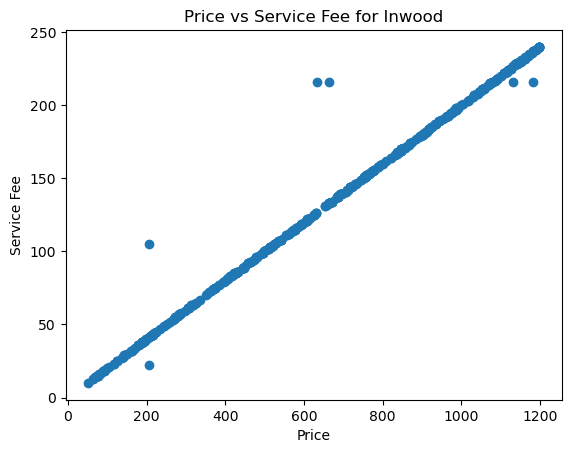

East Village


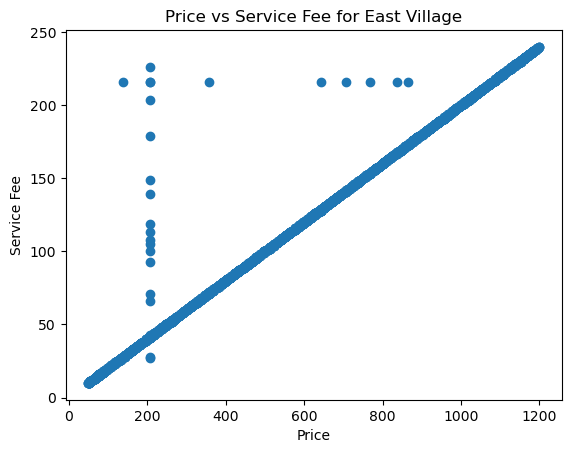

Greenpoint


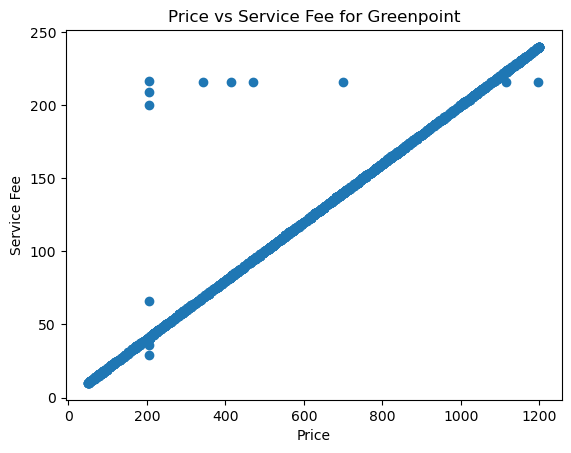

Bushwick


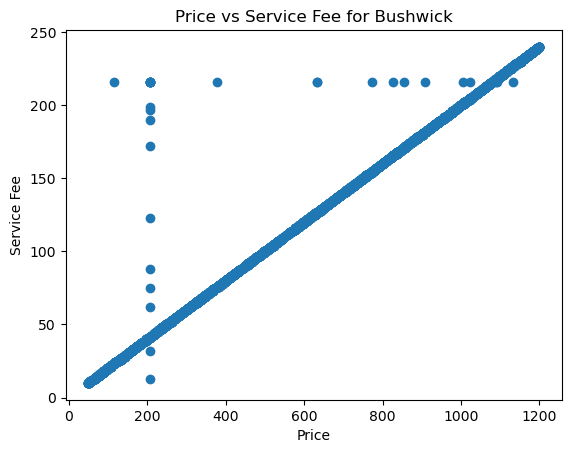

Flatbush


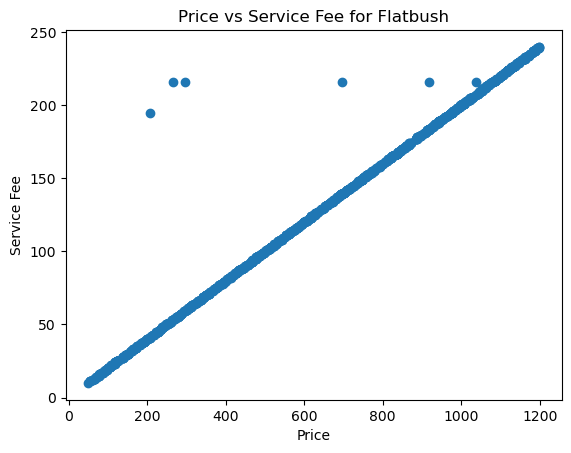

Lower East Side


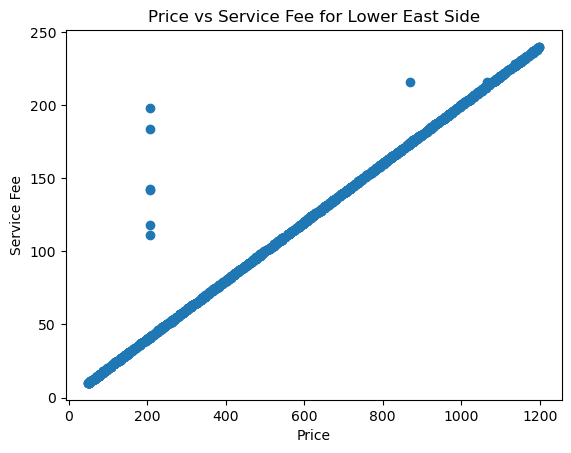

Prospect-Lefferts Gardens


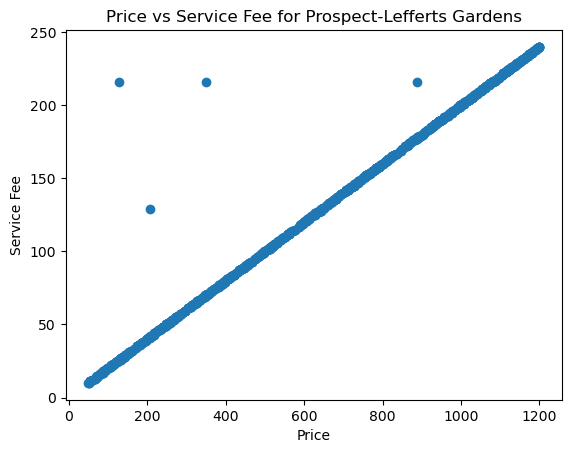

Long Island City


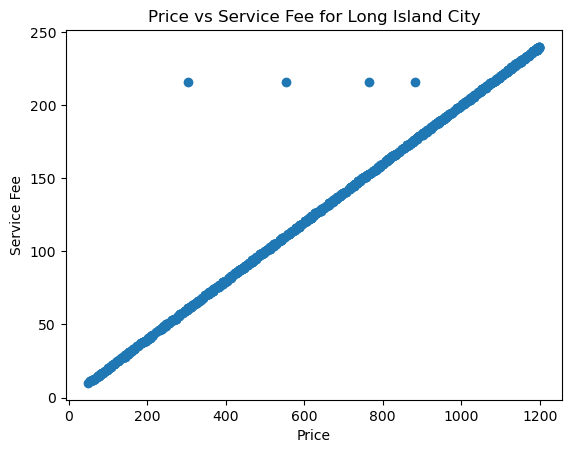

Kips Bay


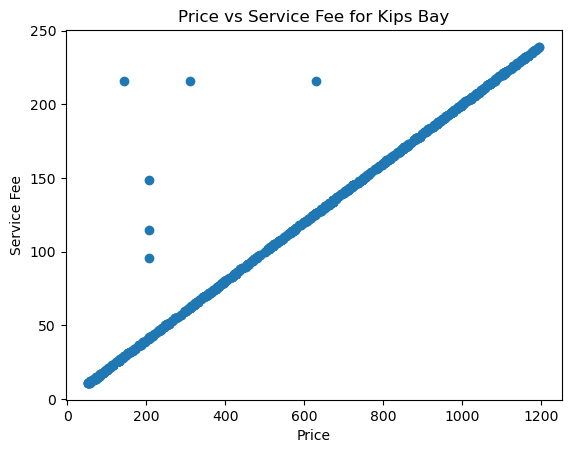

SoHo


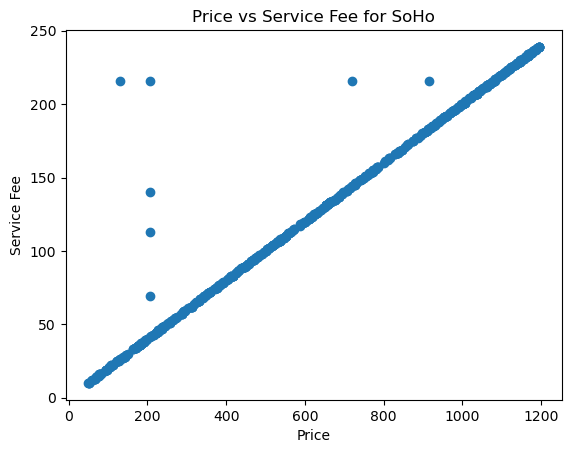

Upper East Side


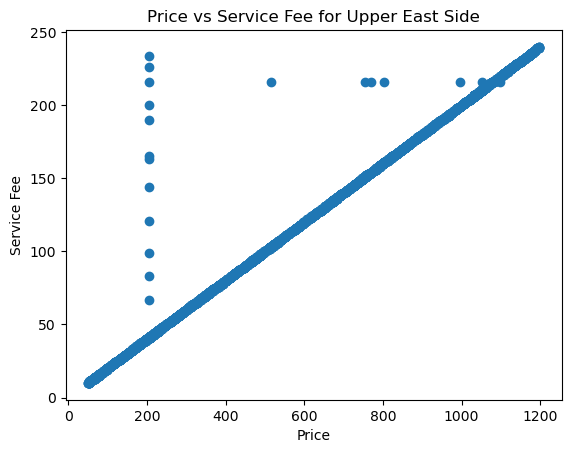

Prospect Heights


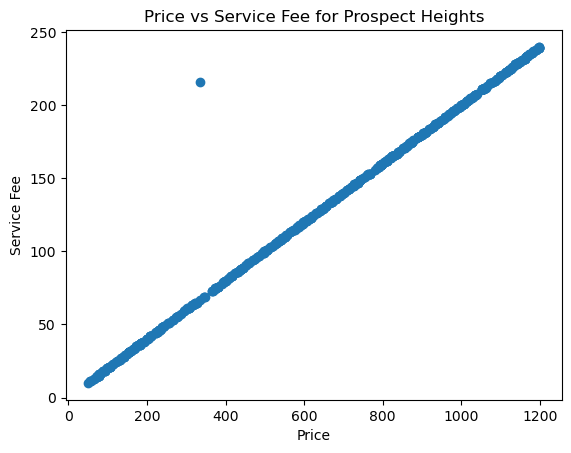

Washington Heights


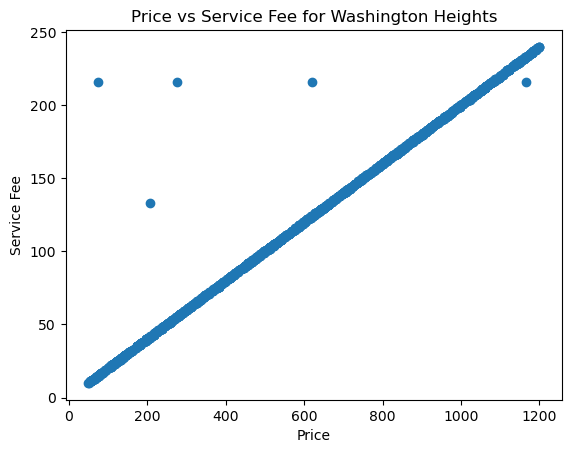

Woodside


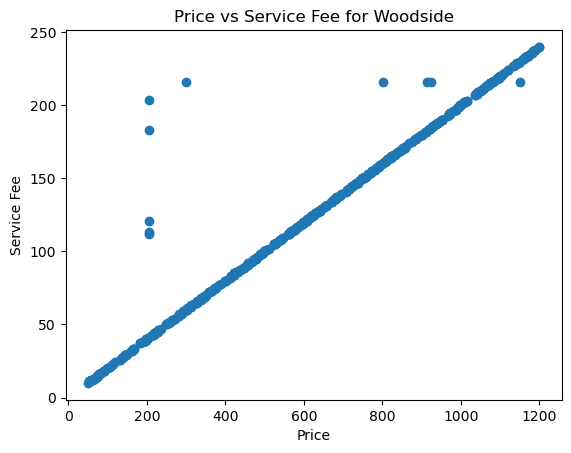

Brooklyn Heights


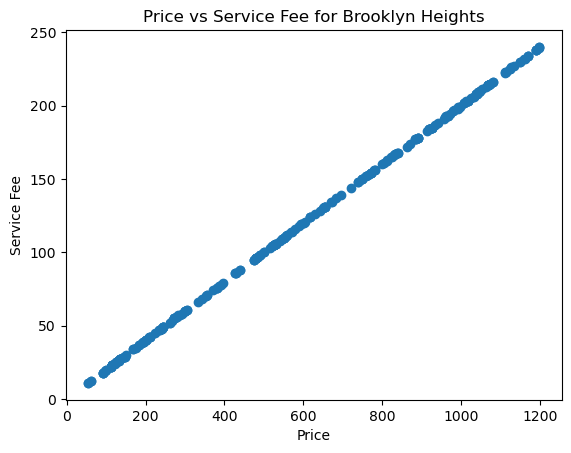

Carroll Gardens


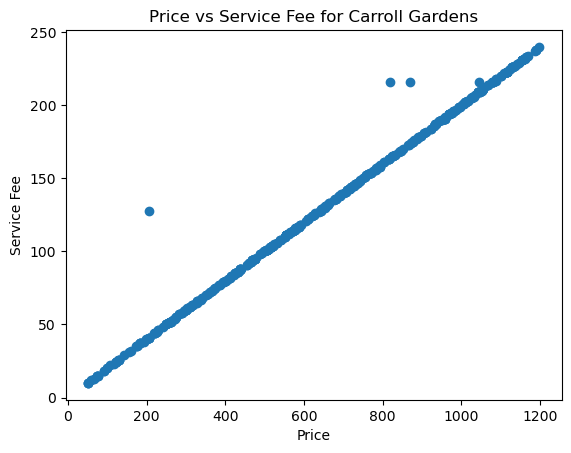

Gowanus


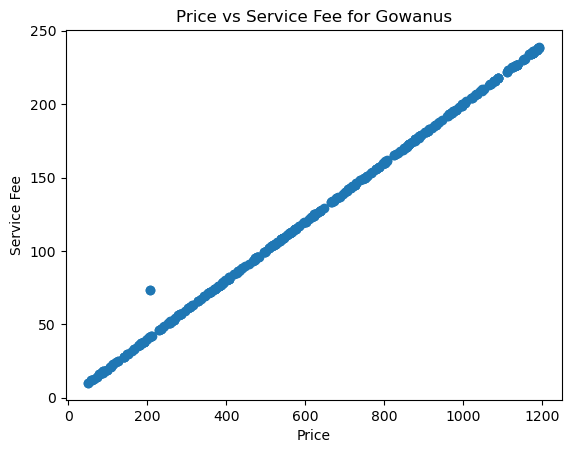

Flatlands


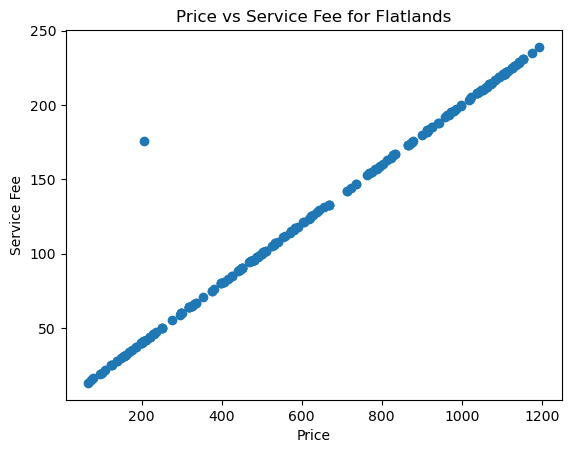

Cobble Hill


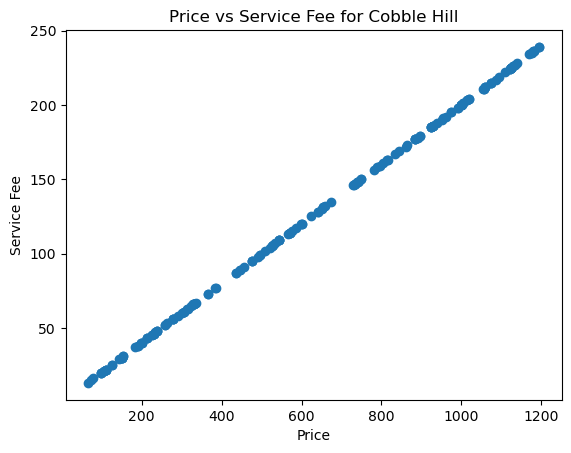

Flushing


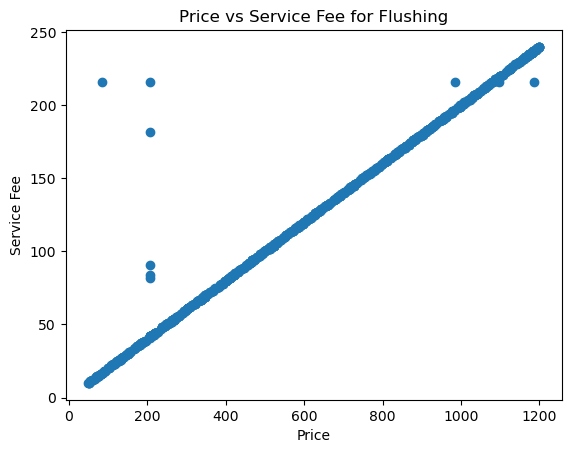

Boerum Hill


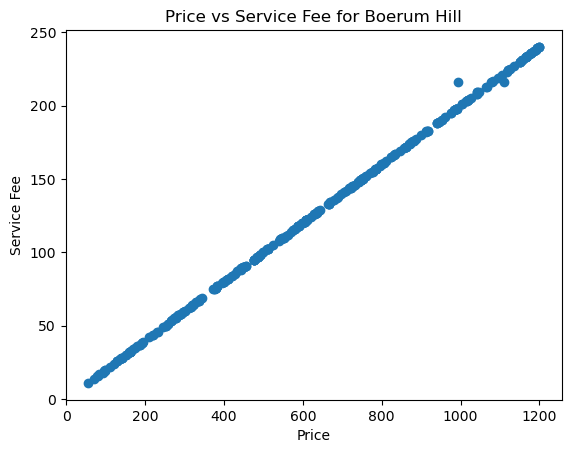

Sunnyside


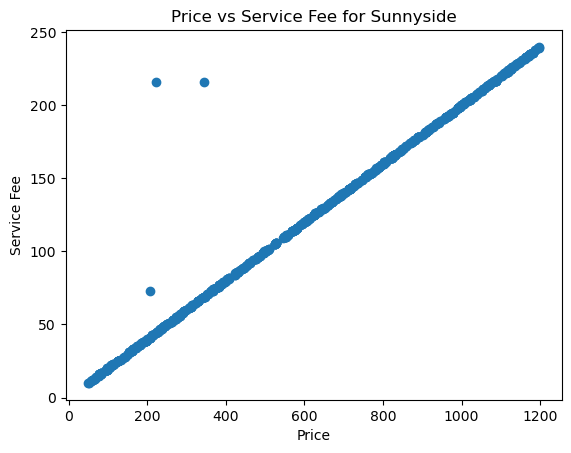

DUMBO


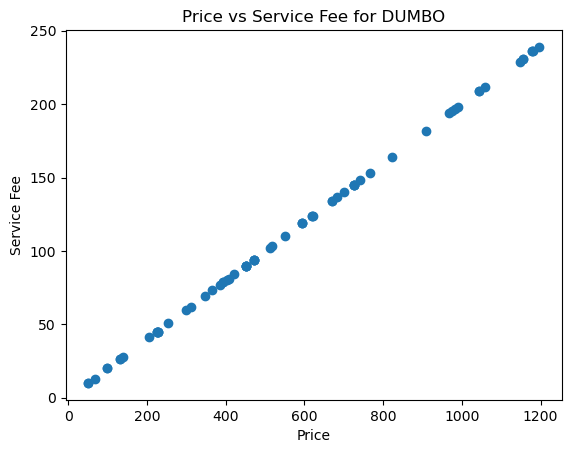

St. George


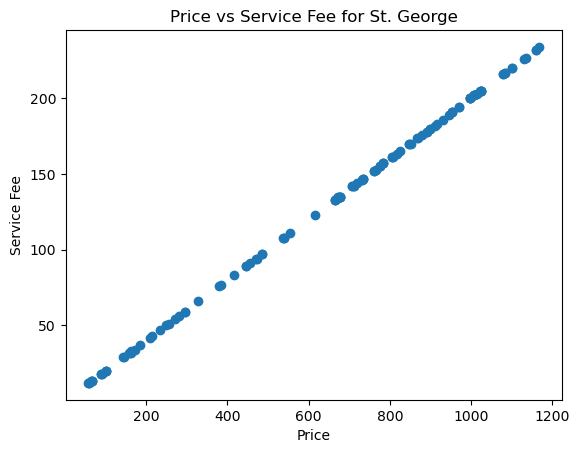

Highbridge


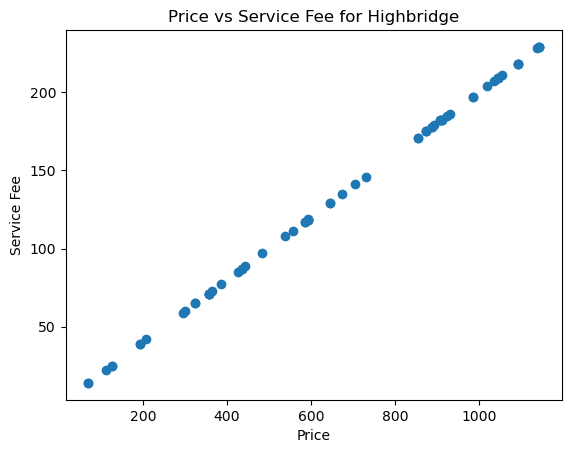

Financial District


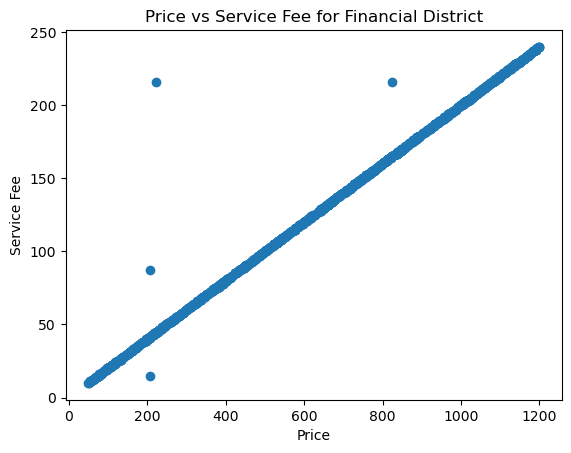

Ridgewood


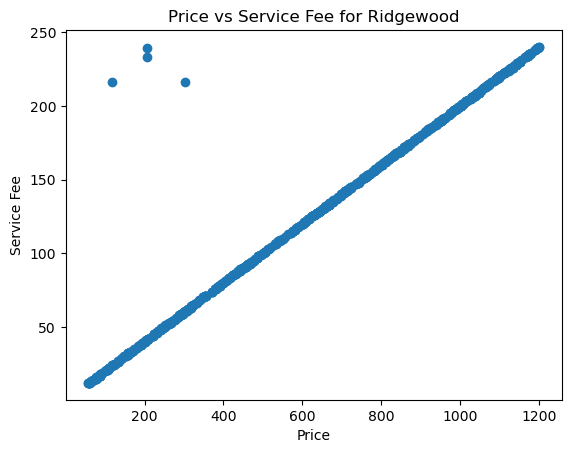

Morningside Heights


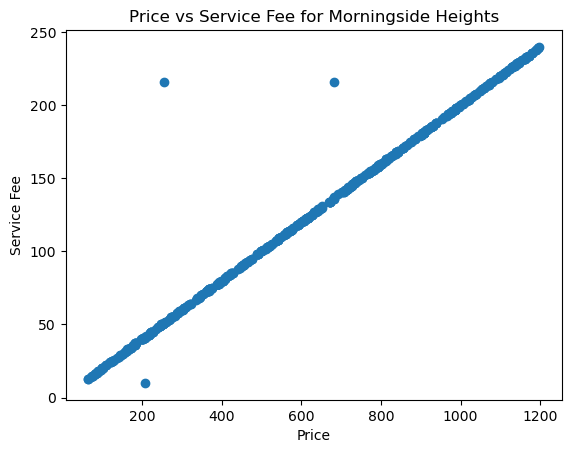

Jamaica


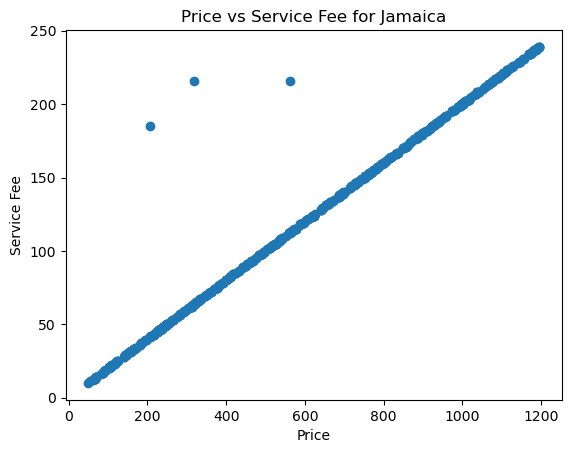

Middle Village


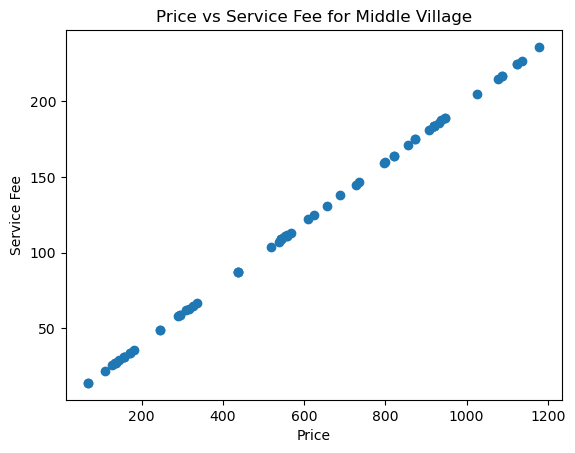

NoHo


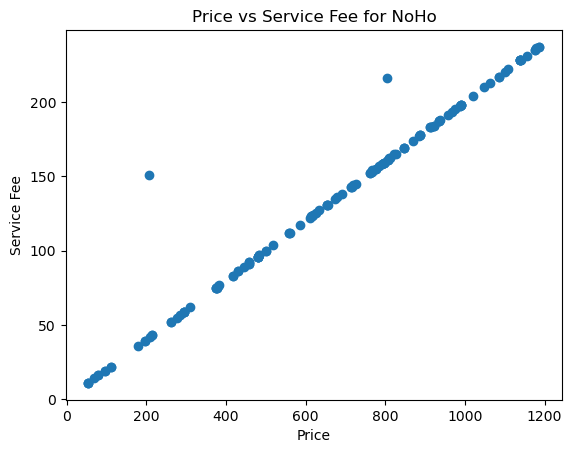

Ditmars Steinway


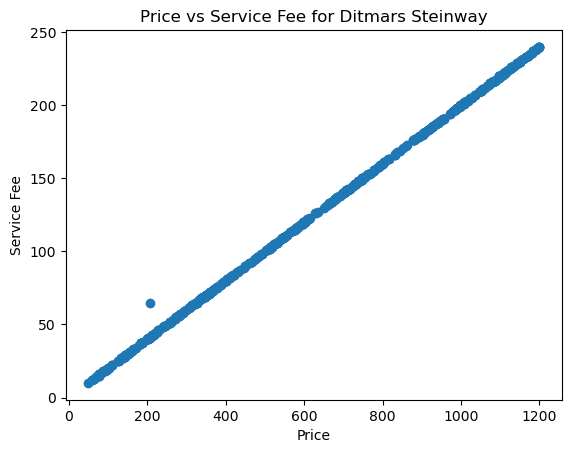

Flatiron District


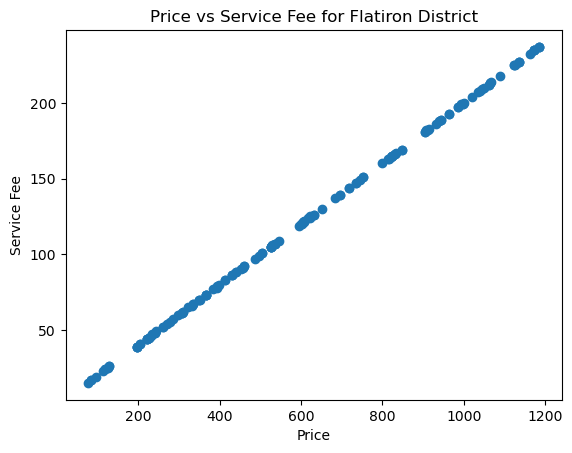

Roosevelt Island


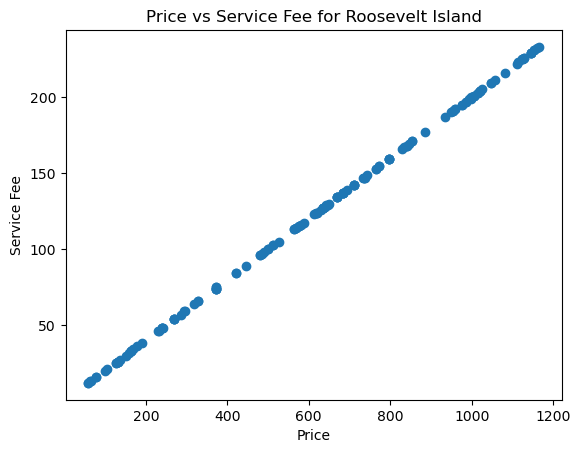

Greenwich Village


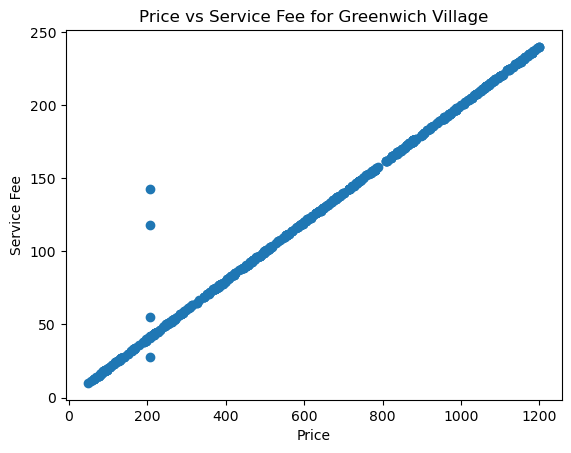

Little Italy


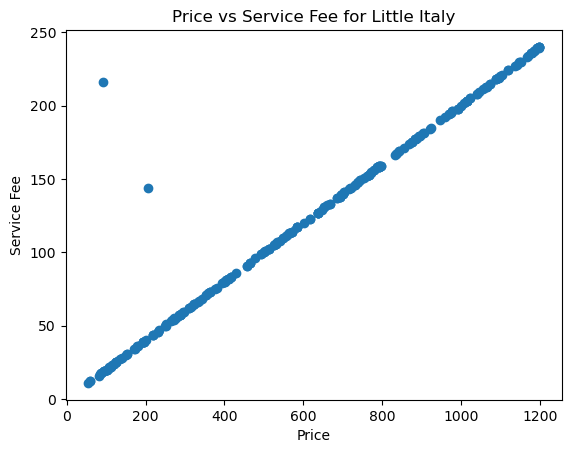

East Flatbush


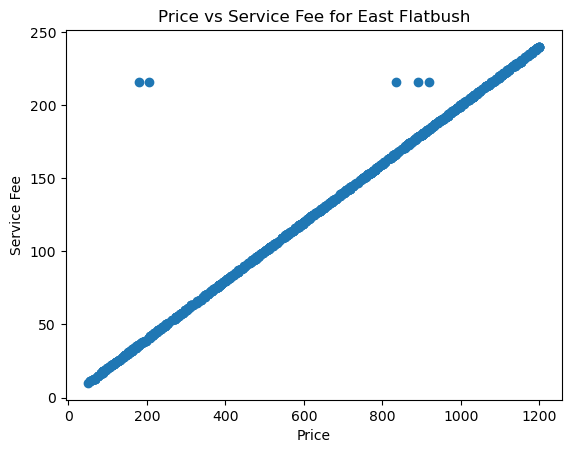

Tompkinsville


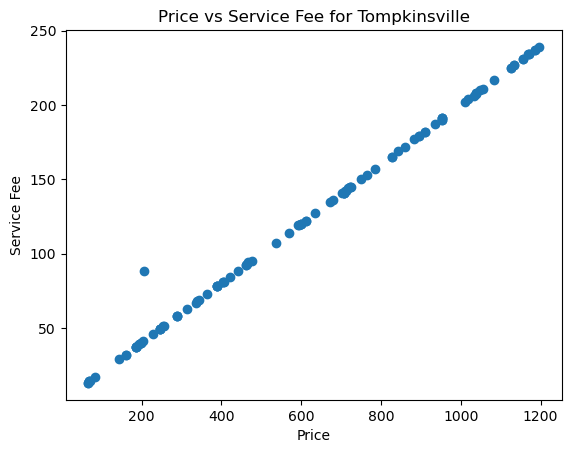

Astoria


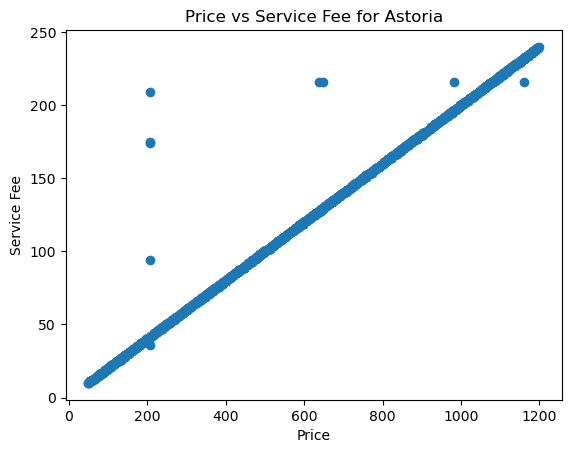

Clason Point


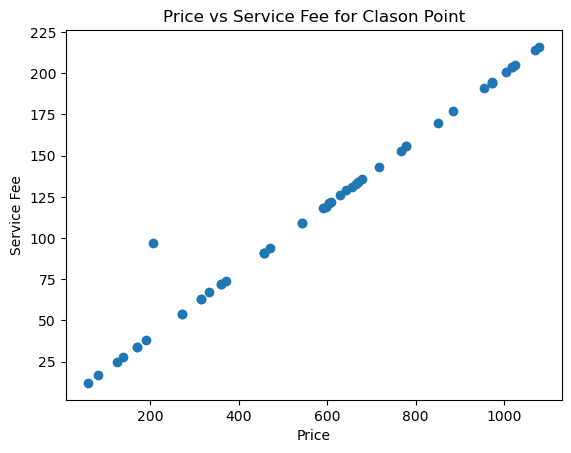

Eastchester


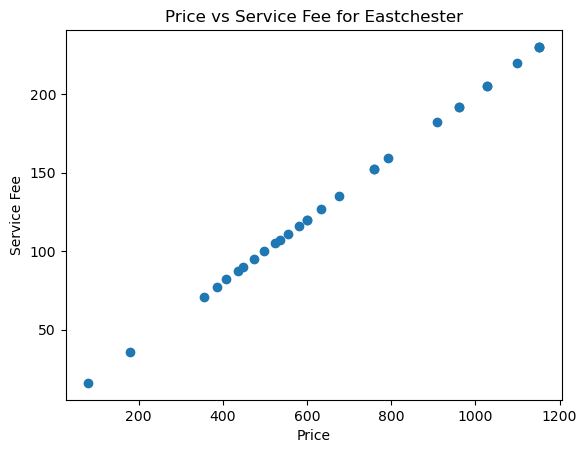

Kingsbridge


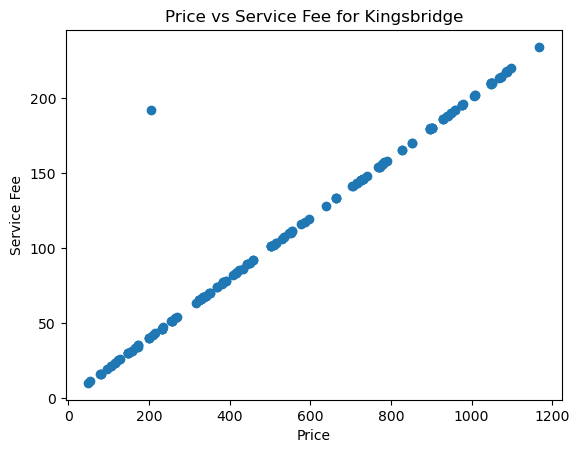

Two Bridges


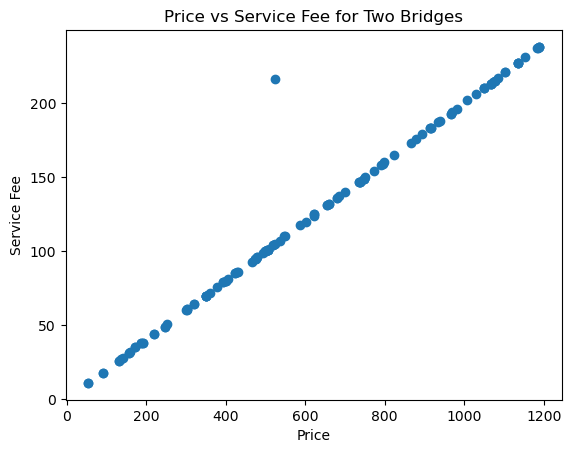

Queens Village


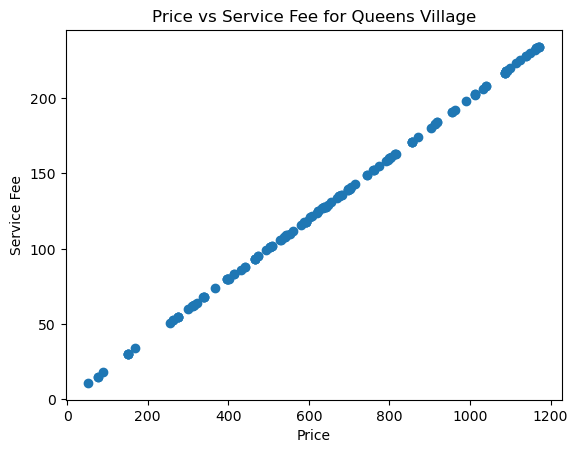

Rockaway Beach


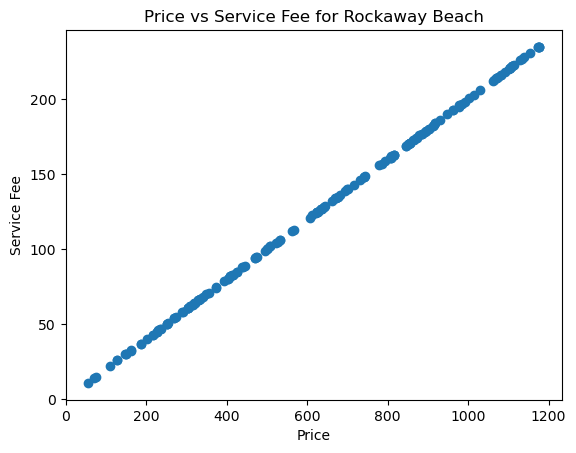

Forest Hills


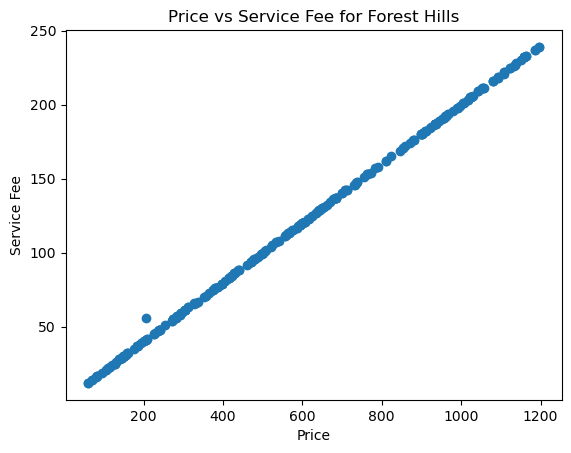

Nolita


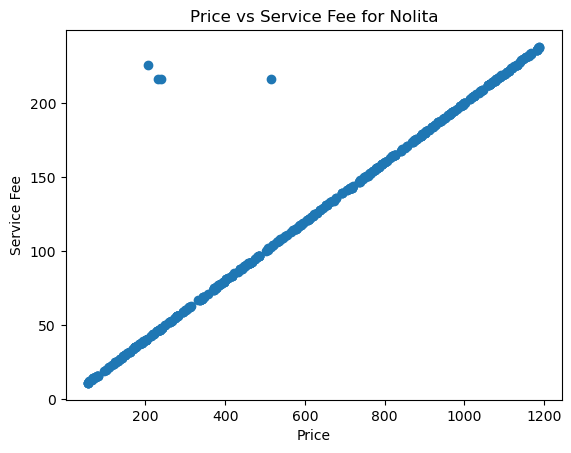

Woodlawn


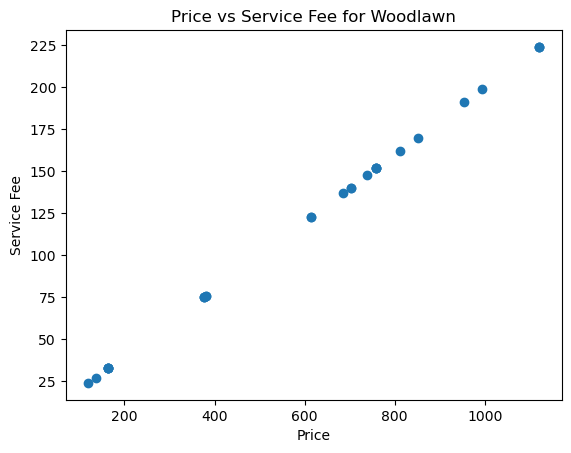

University Heights


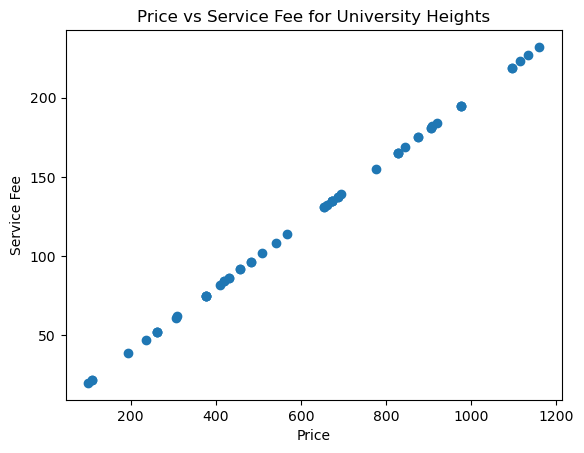

Gravesend


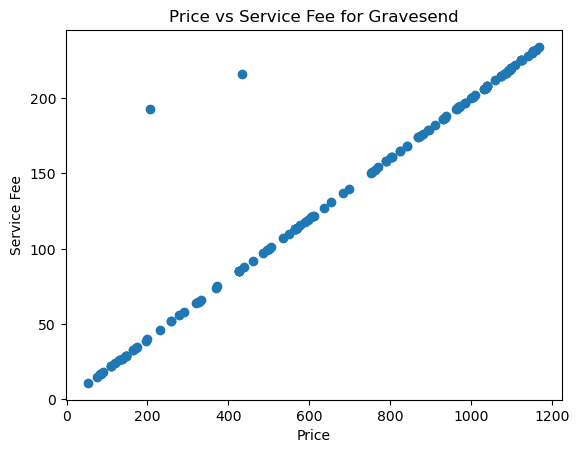

Gramercy


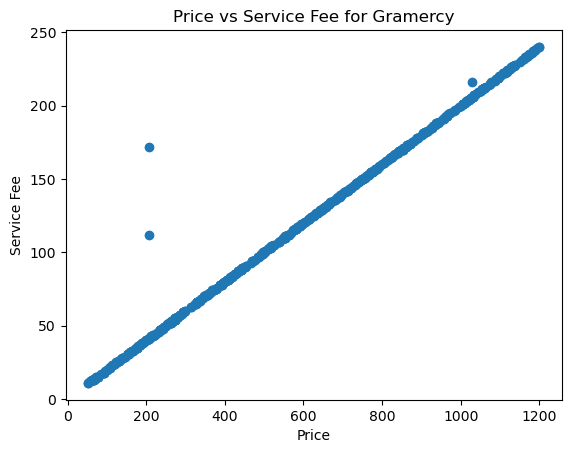

Allerton


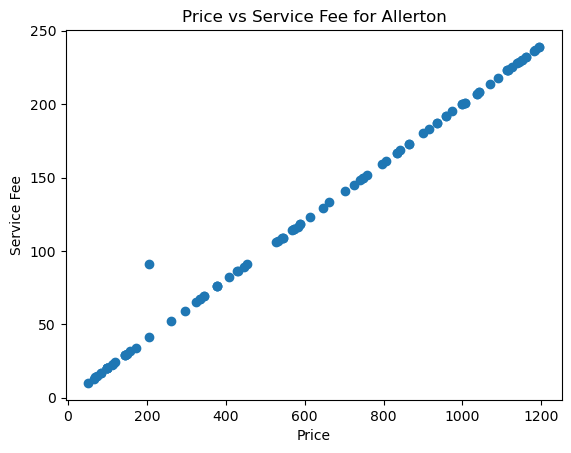

East New York


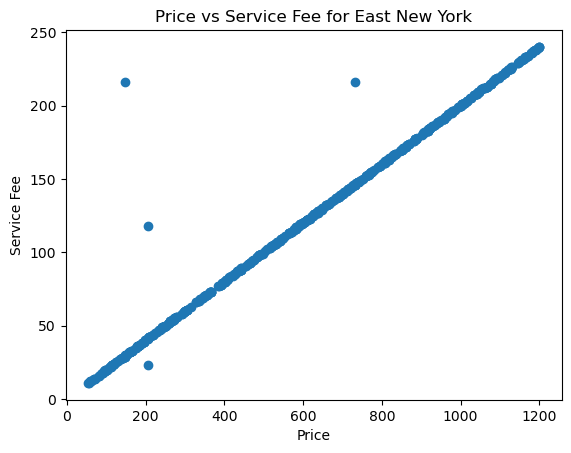

Theater District


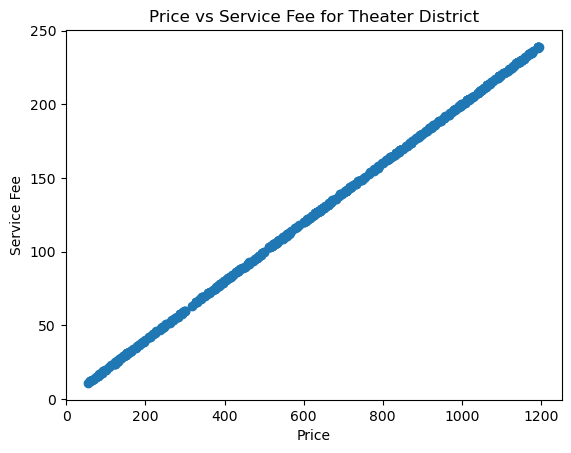

Concourse Village


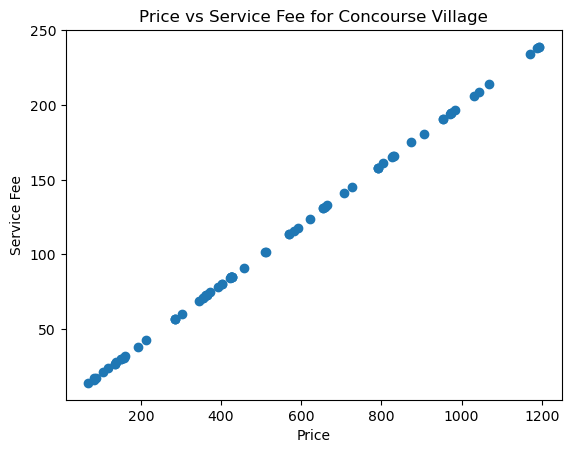

Sheepshead Bay


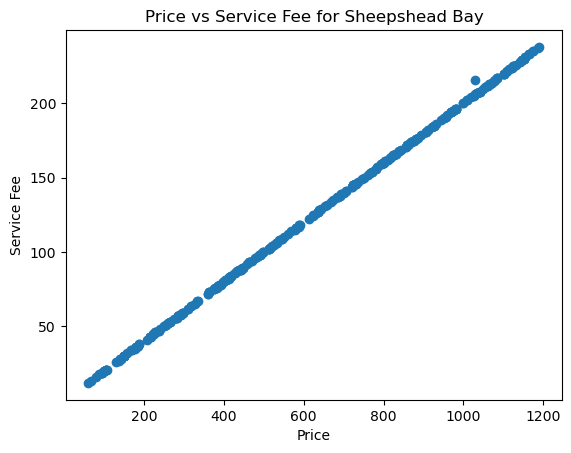

Emerson Hill


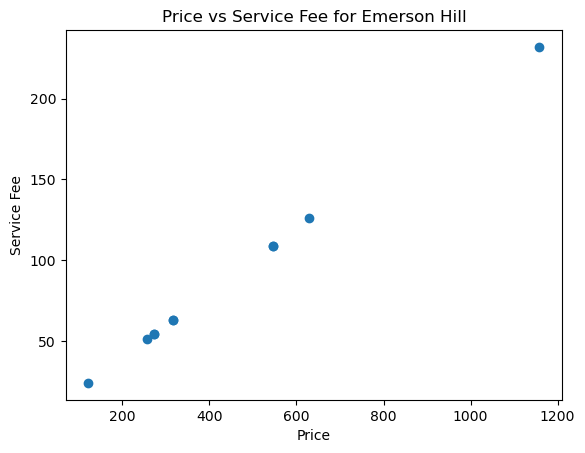

Fort Hamilton


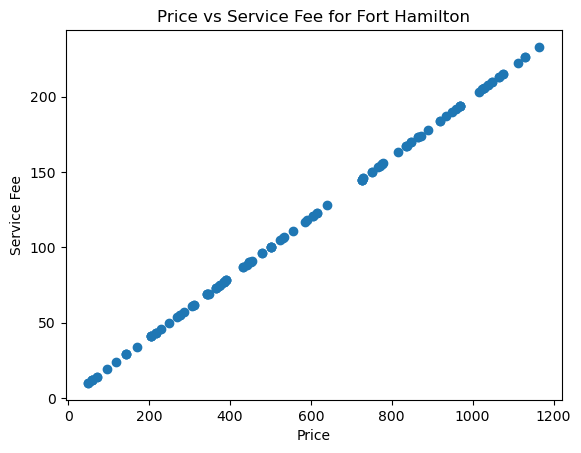

Bensonhurst


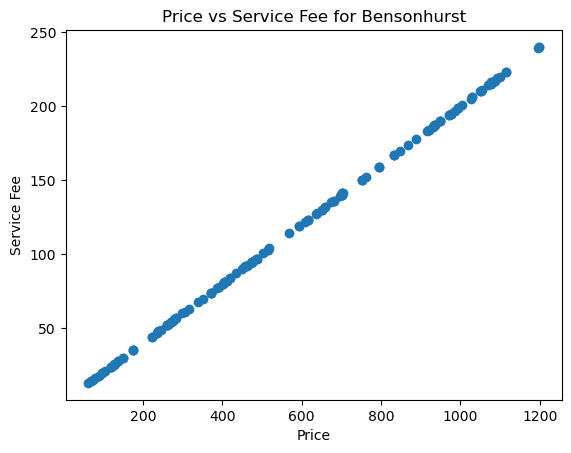

Tribeca


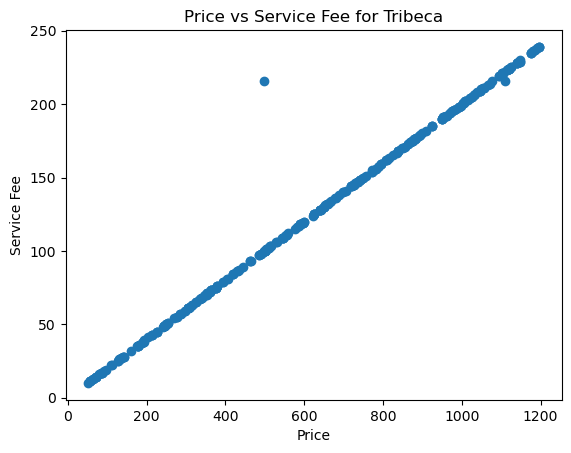

Shore Acres


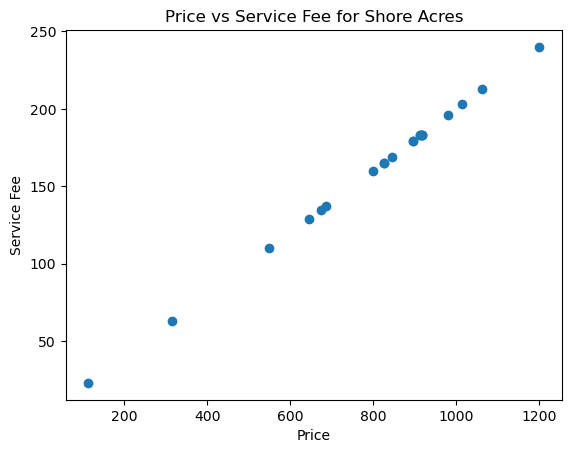

Sunset Park


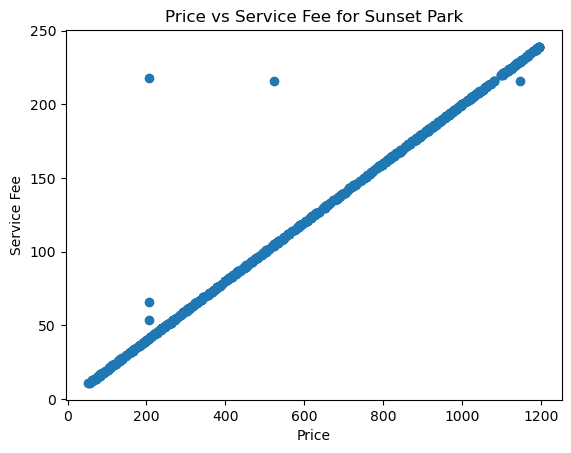

Concourse


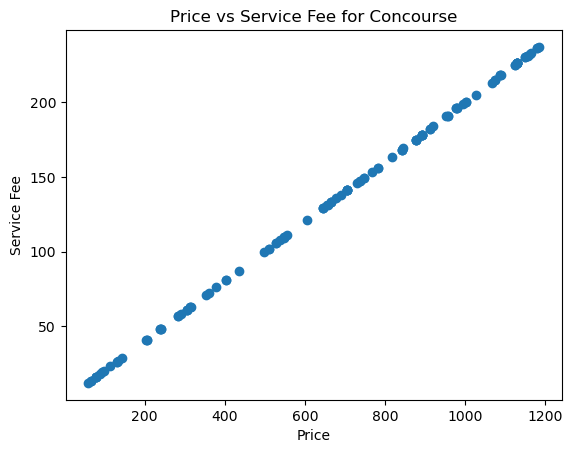

Elmhurst


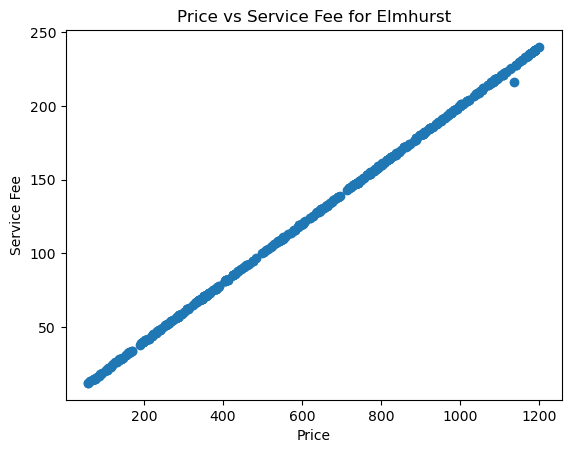

Brighton Beach


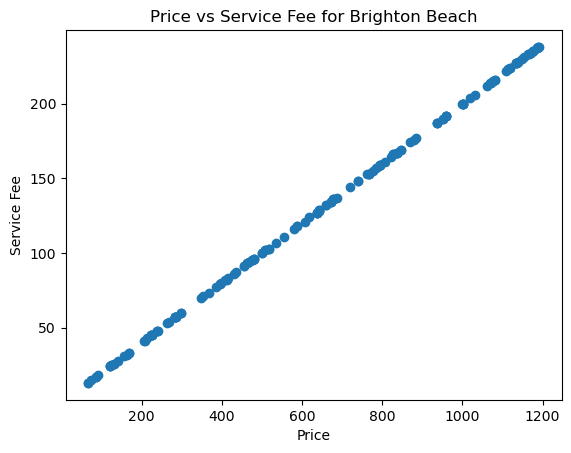

Jackson Heights


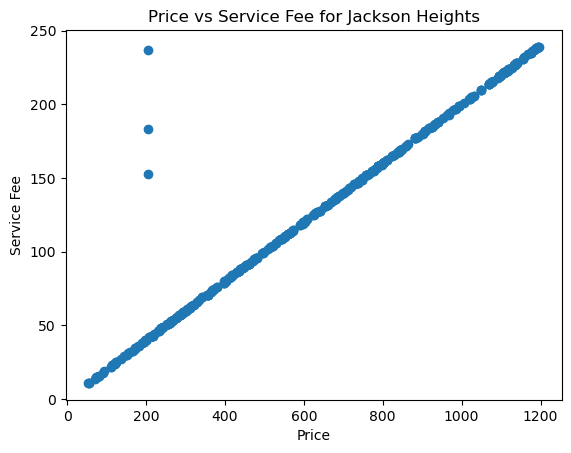

Cypress Hills


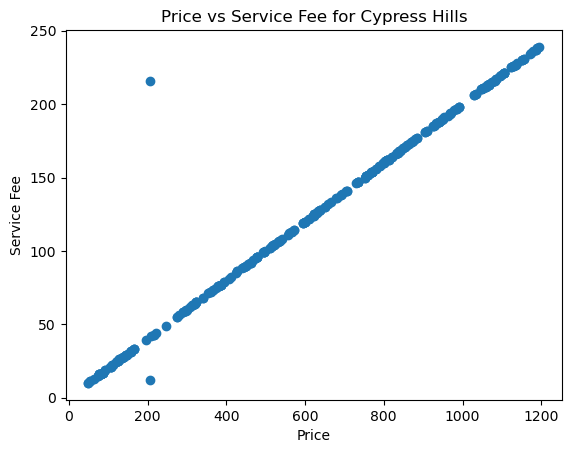

St. Albans


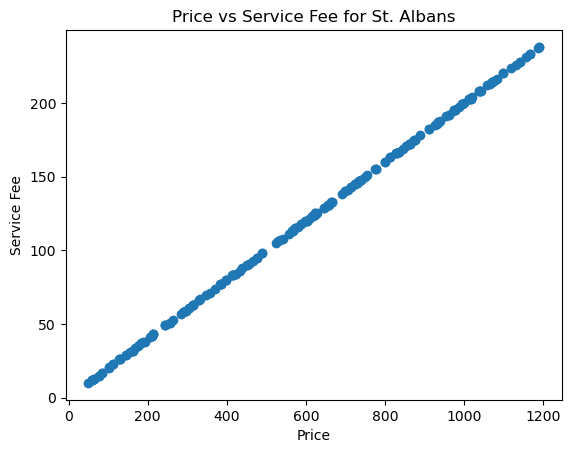

Arrochar


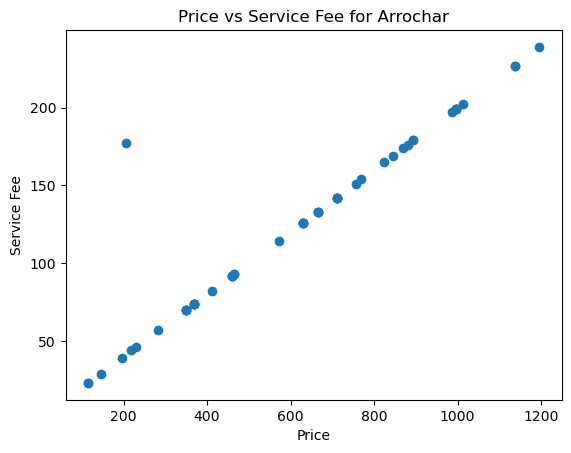

Rego Park


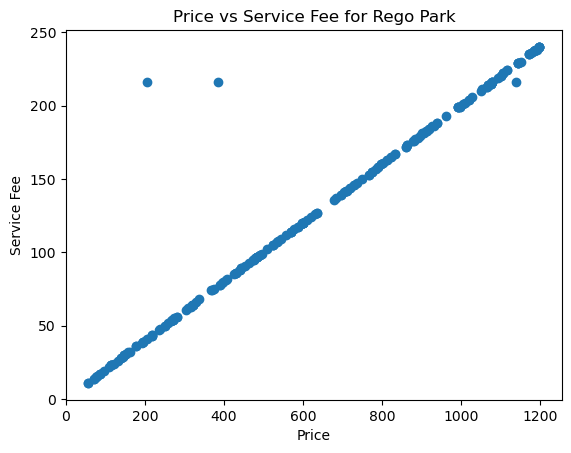

Wakefield


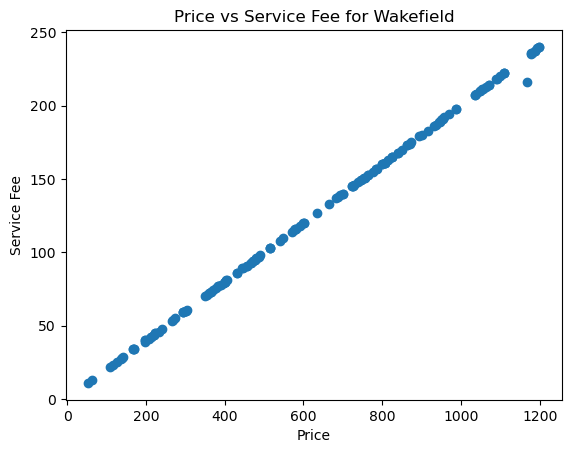

Clifton


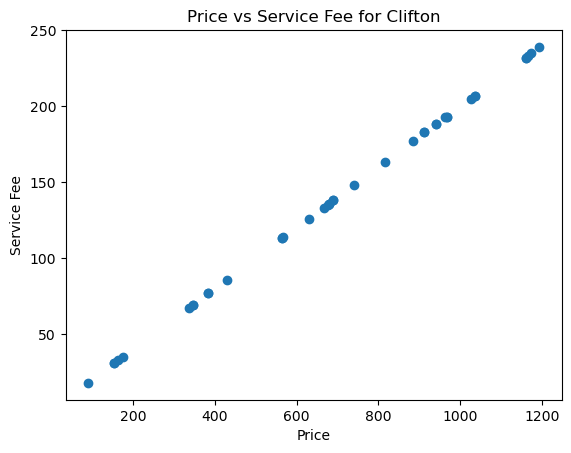

Bay Ridge


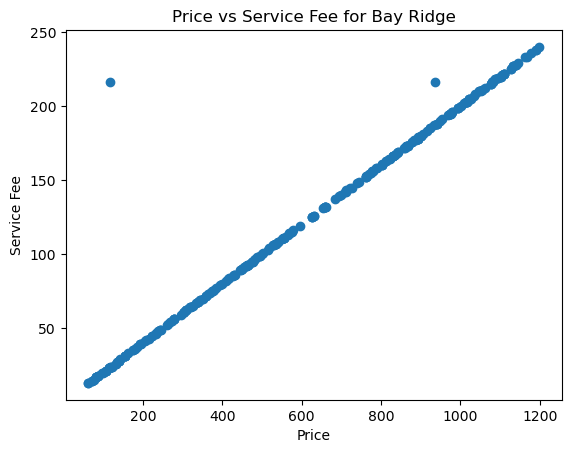

Graniteville


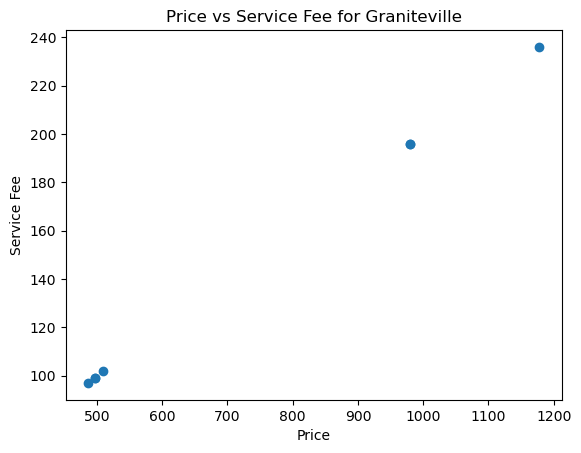

Spuyten Duyvil


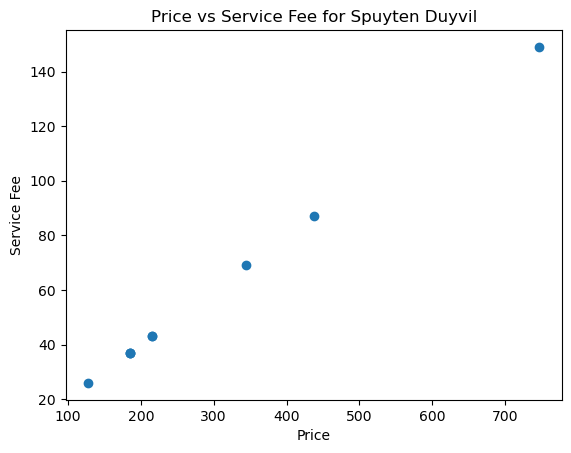

Stapleton


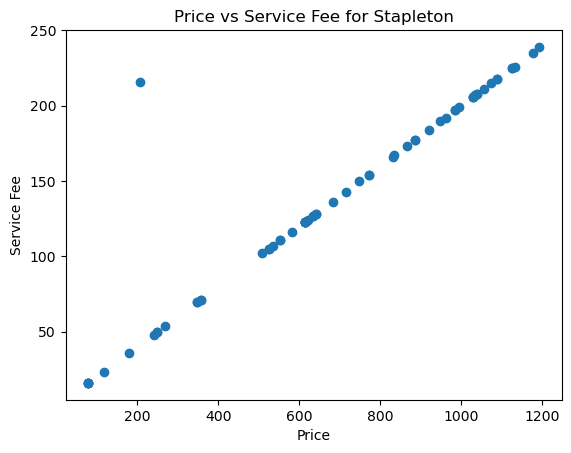

Briarwood


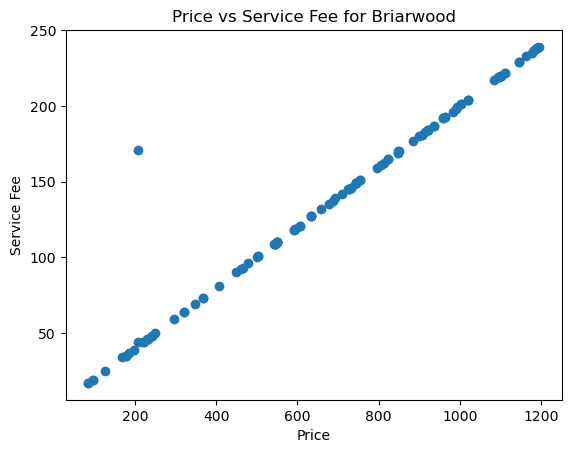

Ozone Park


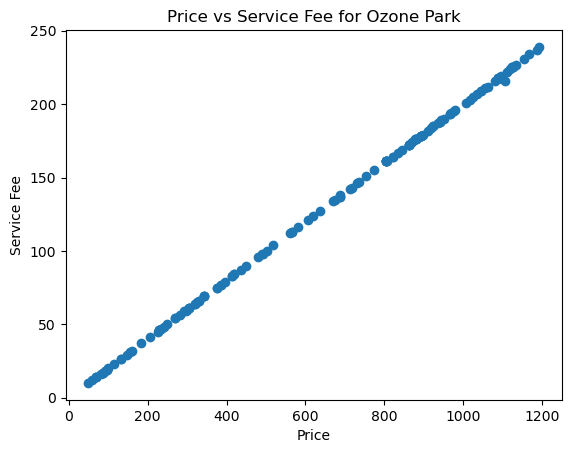

Columbia St


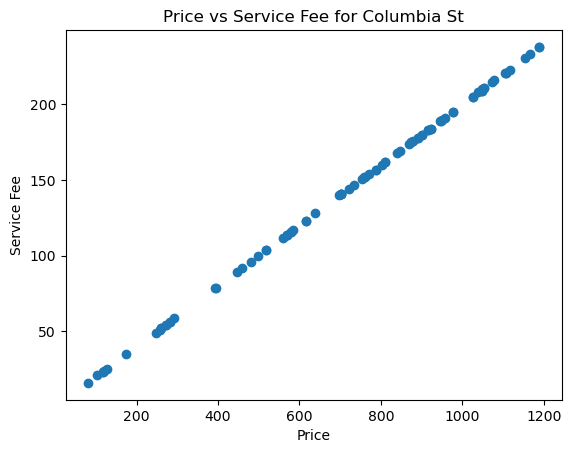

Vinegar Hill


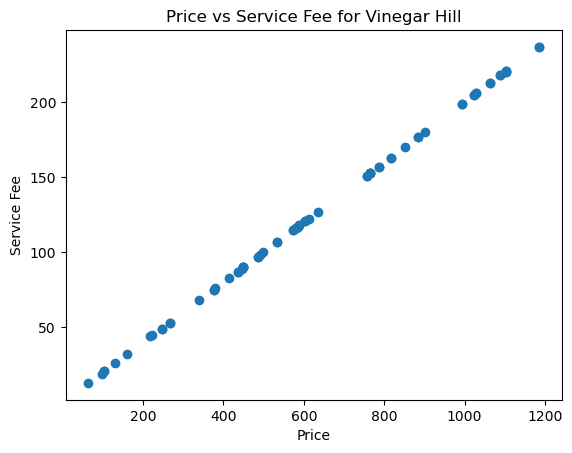

Mott Haven


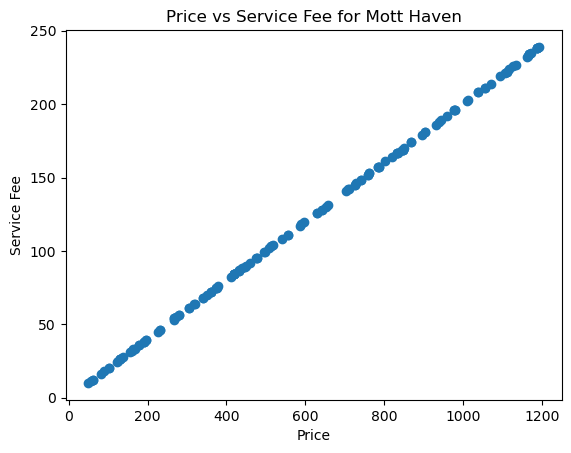

Longwood


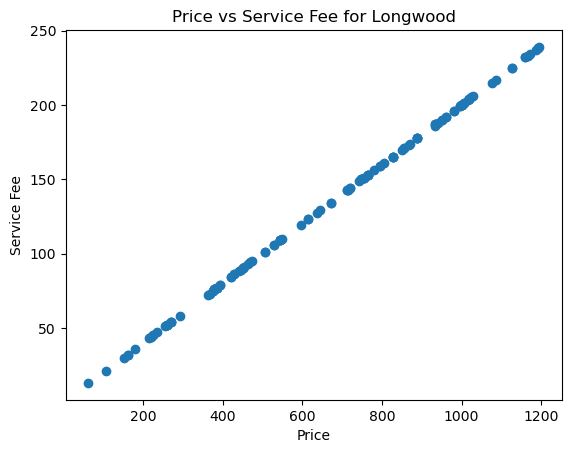

Canarsie


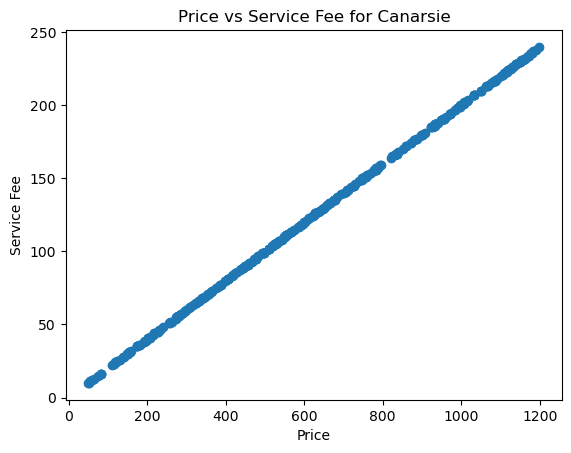

Battery Park City


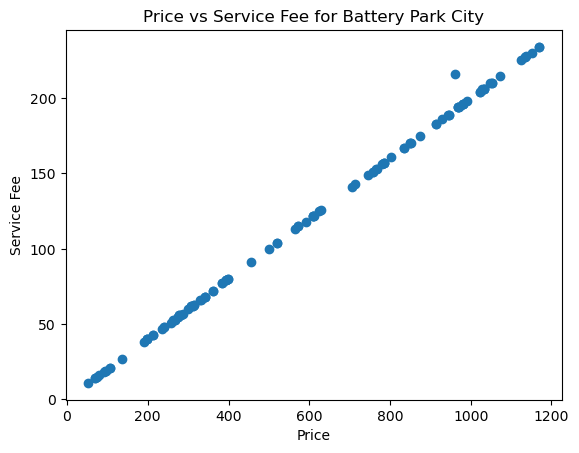

Civic Center


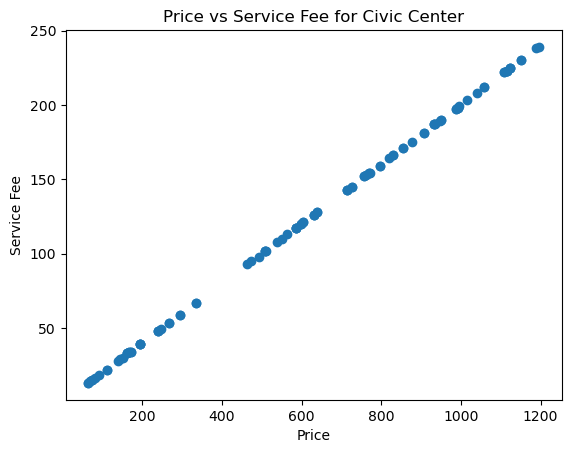

East Elmhurst


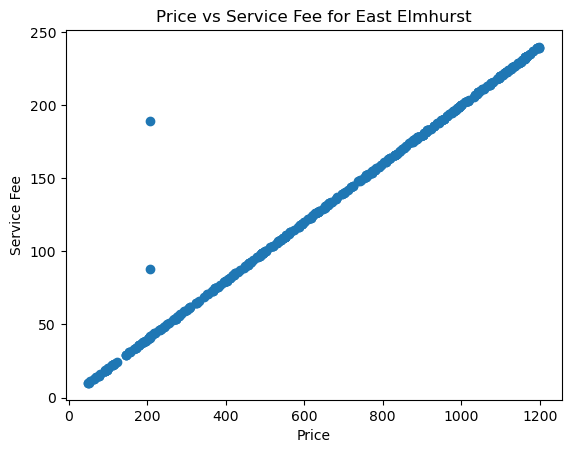

New Springville


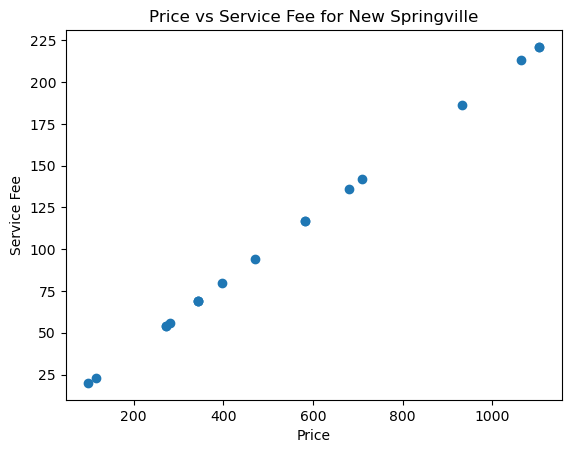

Morris Heights


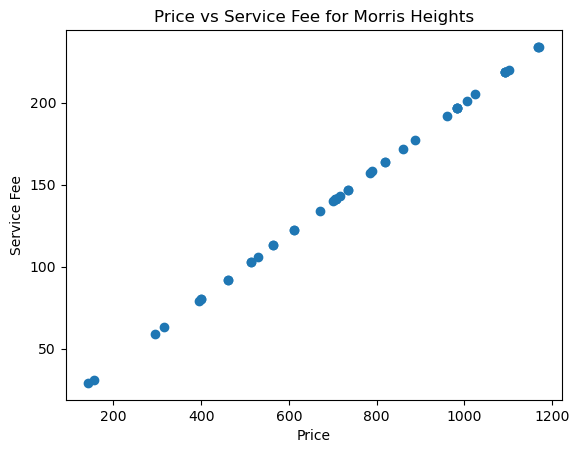

Arverne


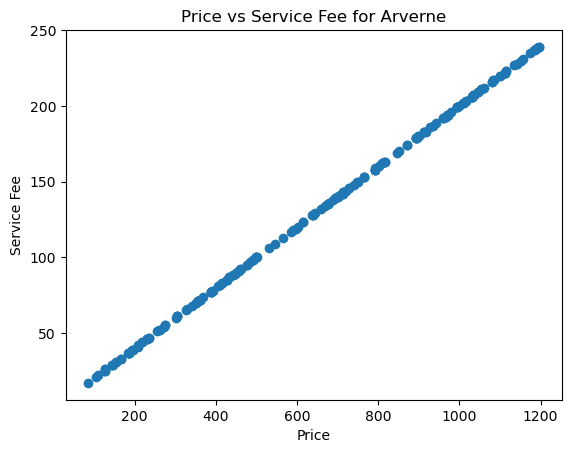

Cambria Heights


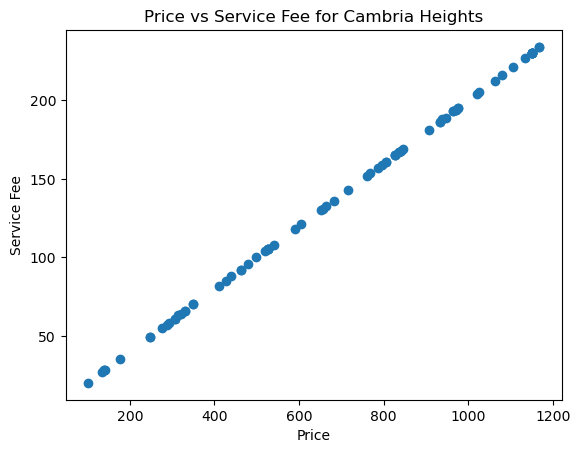

Tottenville


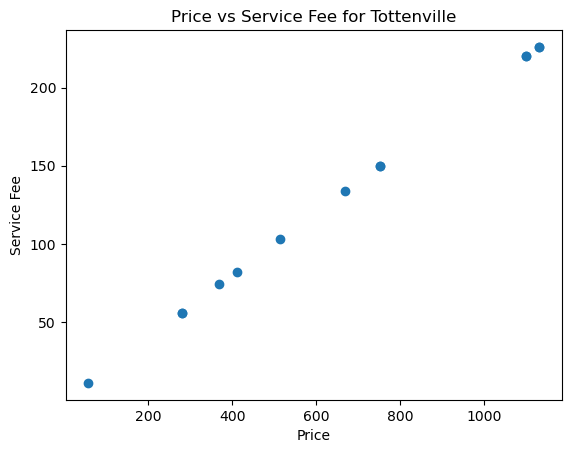

Mariners Harbor


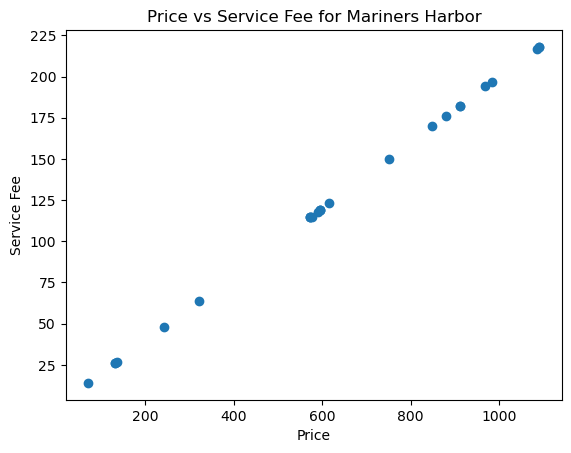

Concord


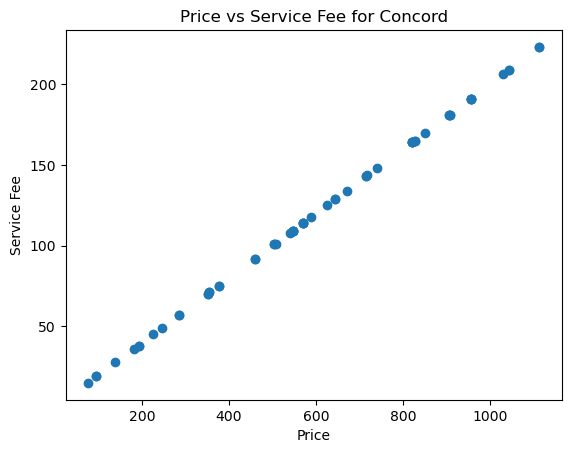

Borough Park


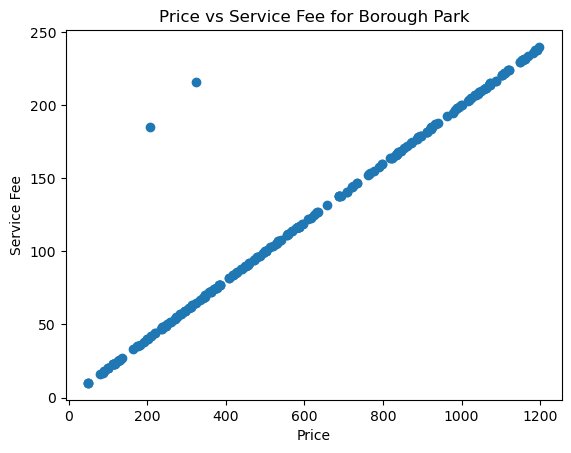

Bayside


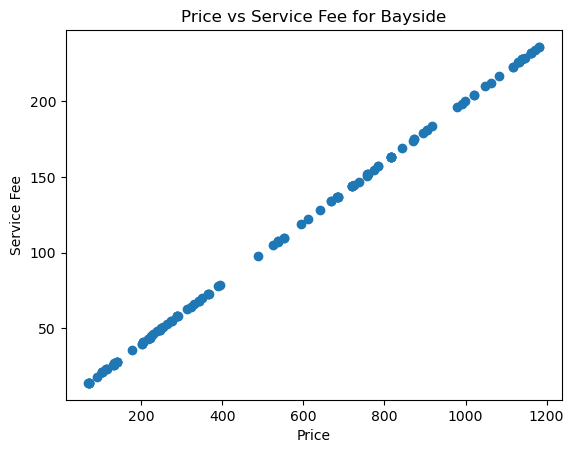

Downtown Brooklyn


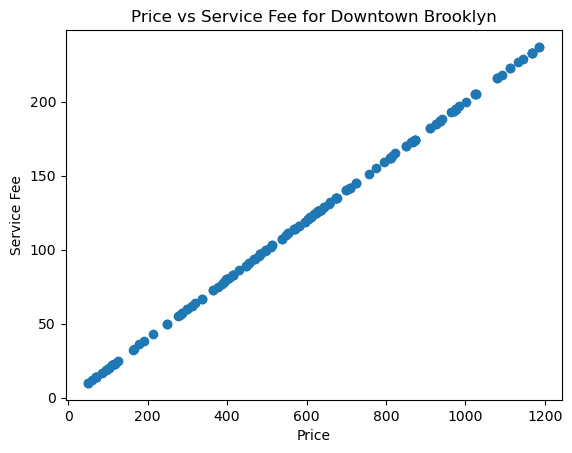

Port Morris


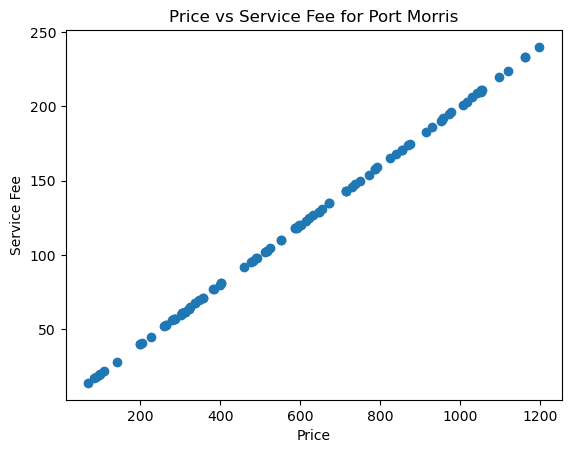

Fieldston


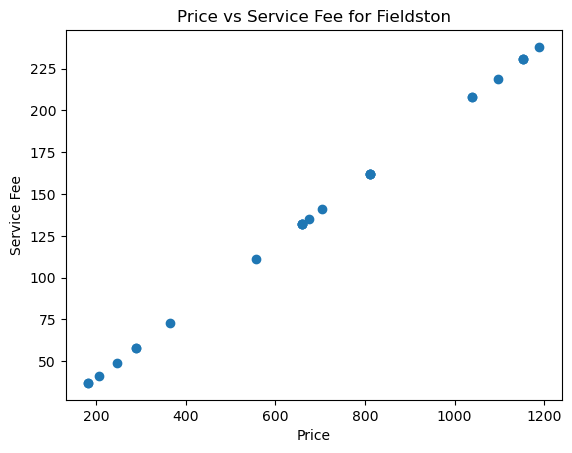

Kew Gardens


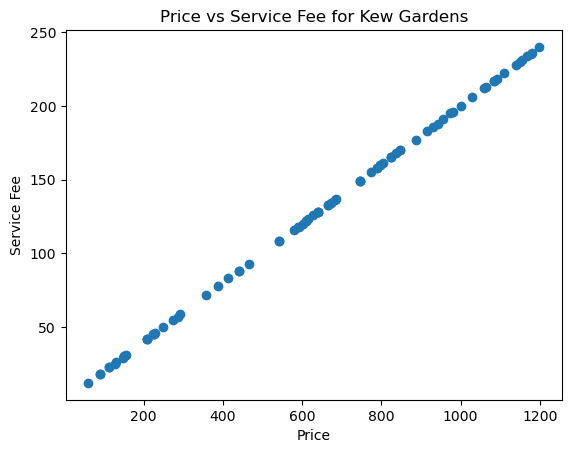

Midwood


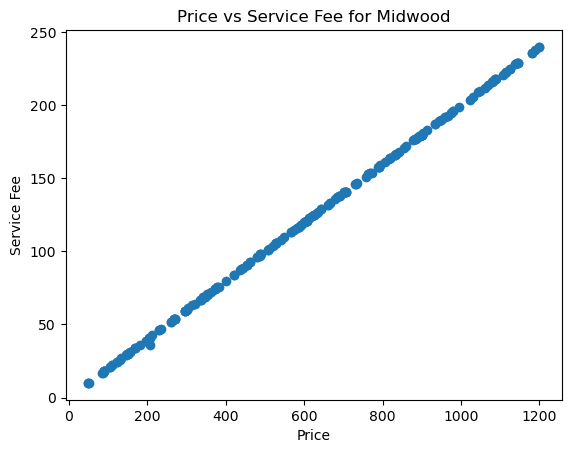

College Point


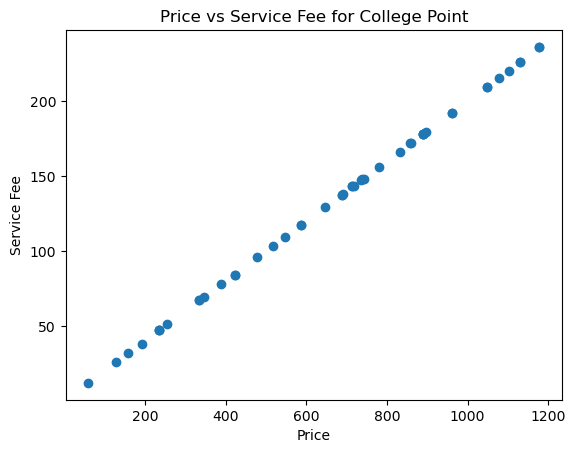

Mount Eden


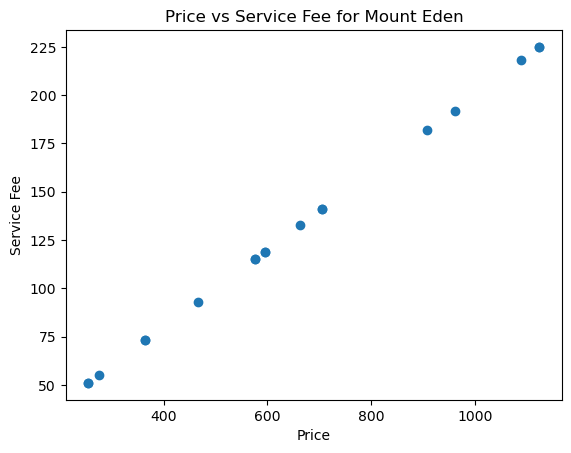

City Island


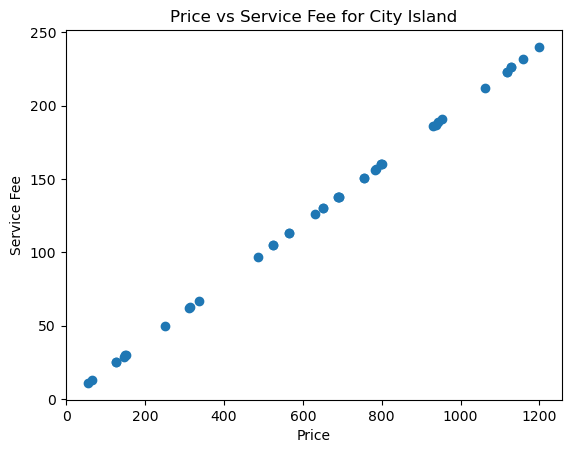

Glendale


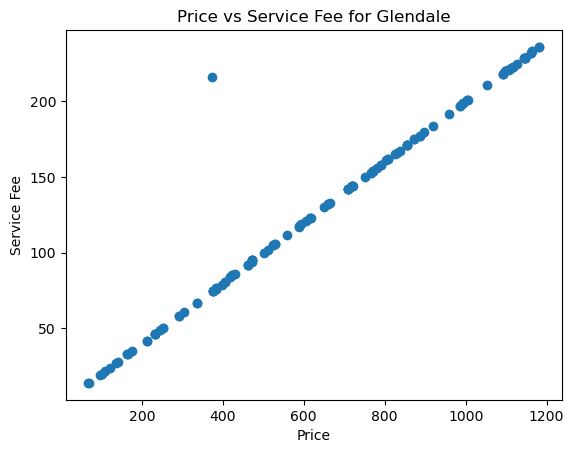

Port Richmond


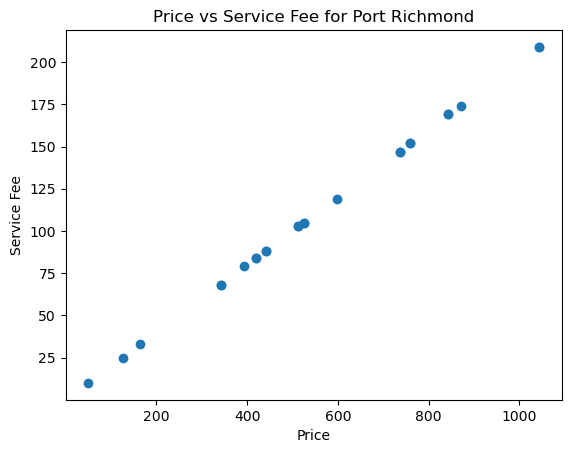

Red Hook


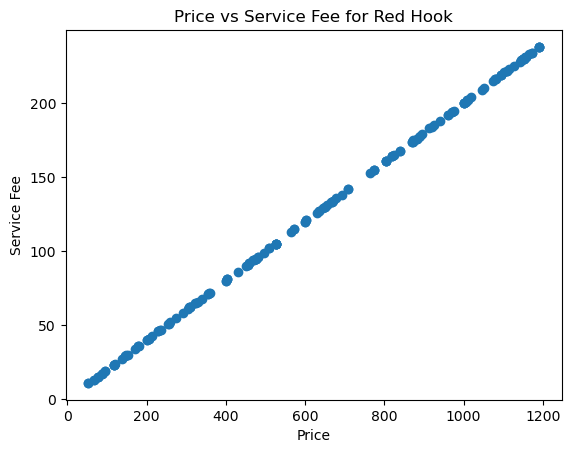

Richmond Hill


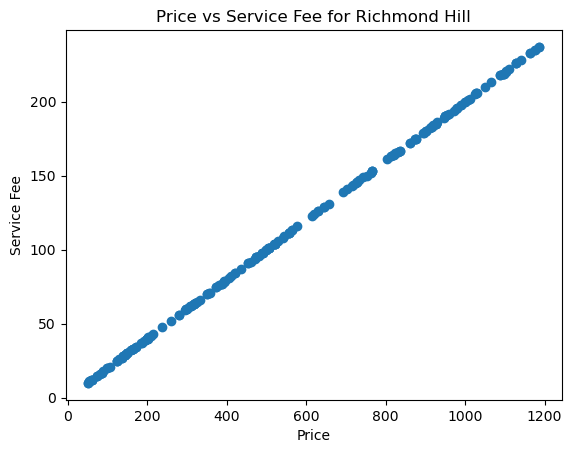

Bellerose


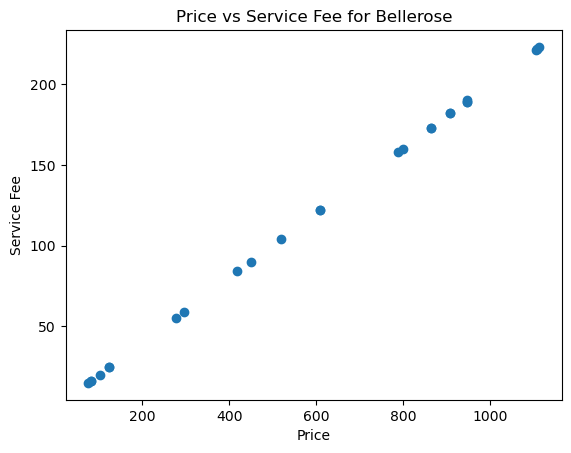

Maspeth


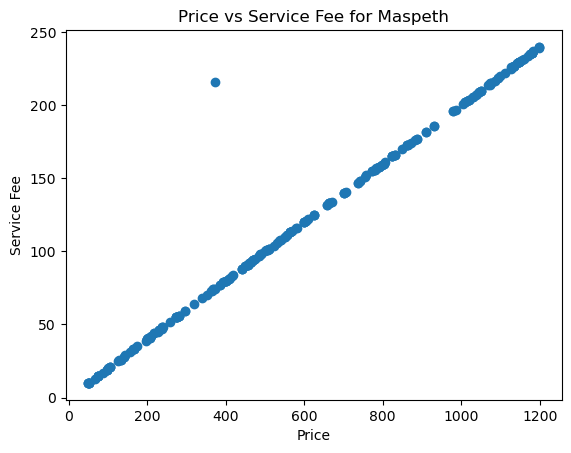

Williamsbridge


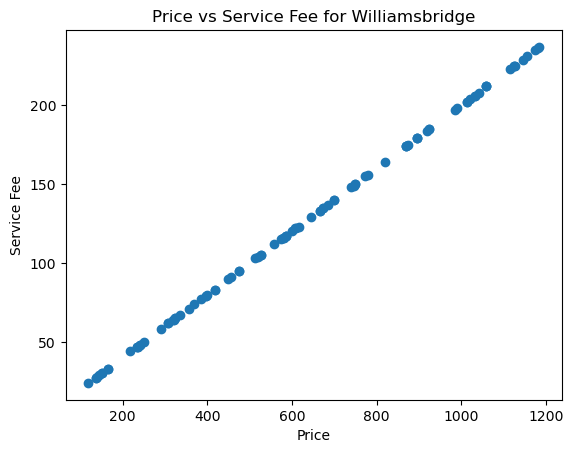

Soundview


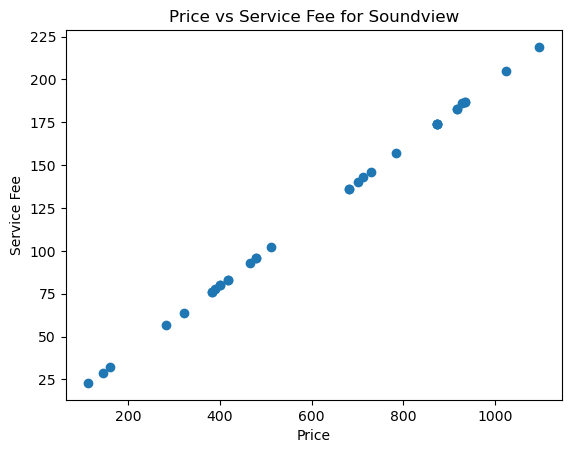

Woodhaven


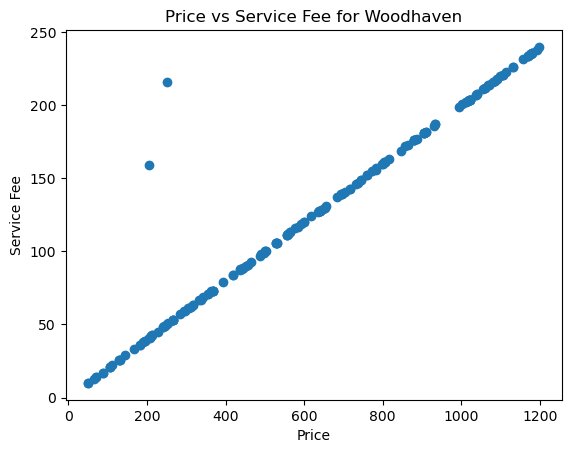

Woodrow


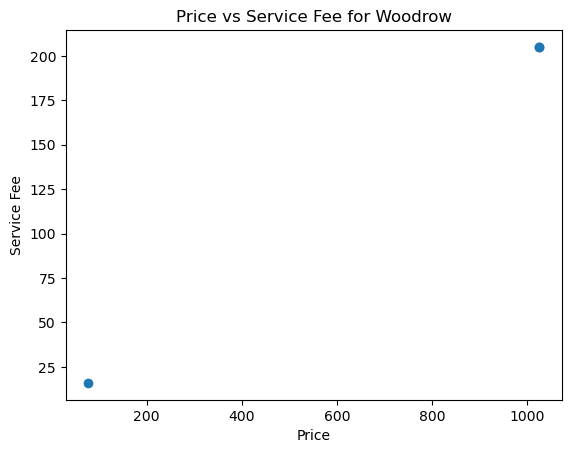

Co-op City


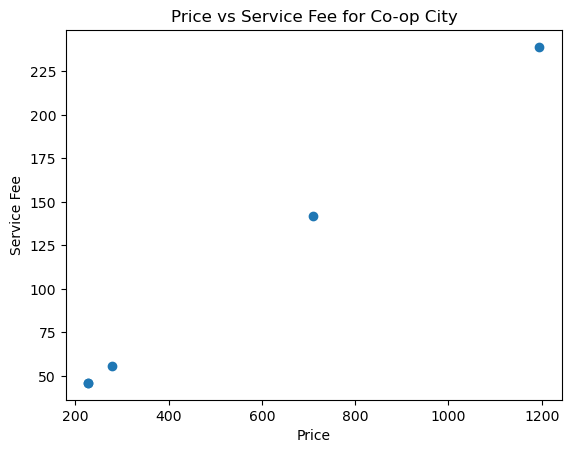

Stuyvesant Town


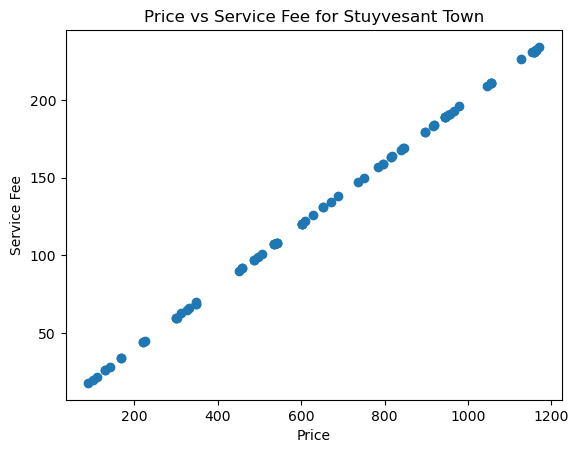

Parkchester


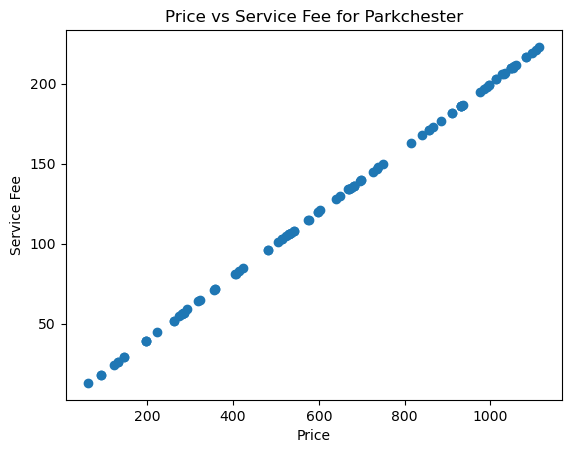

North Riverdale


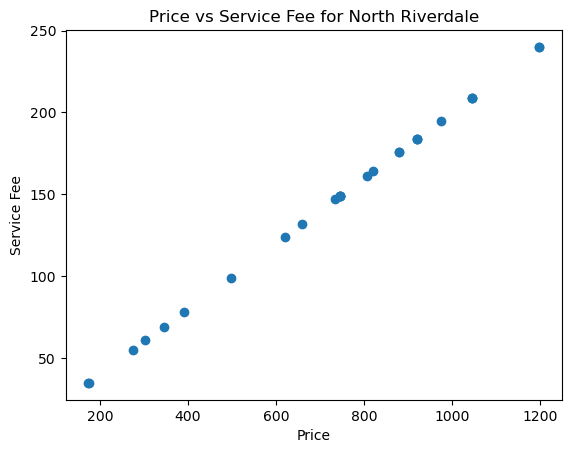

Dyker Heights


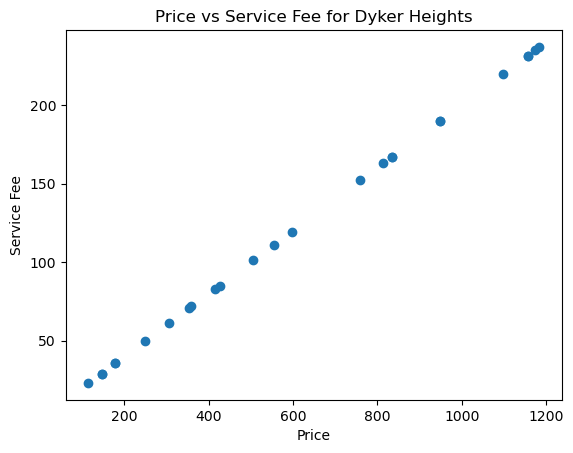

Bronxdale


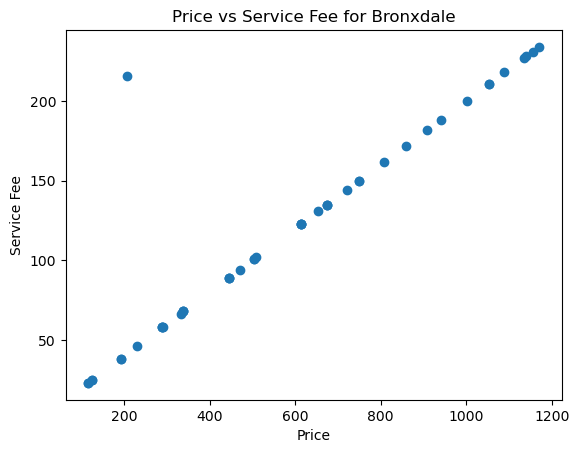

Sea Gate


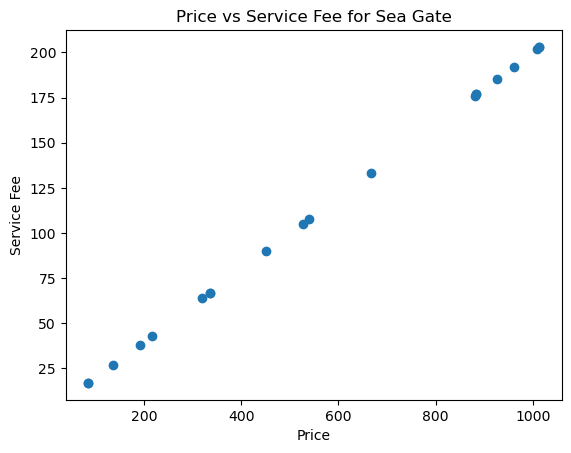

Riverdale


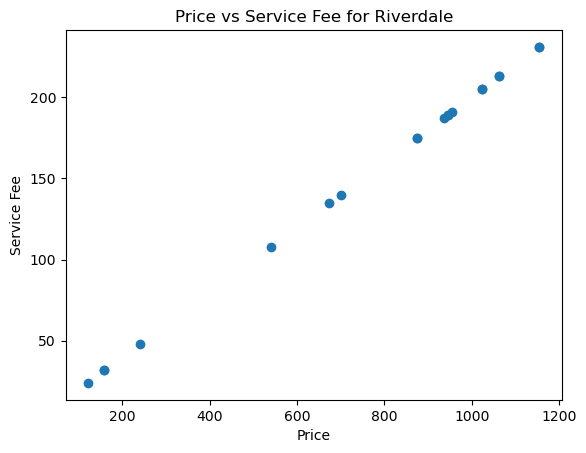

Kew Gardens Hills


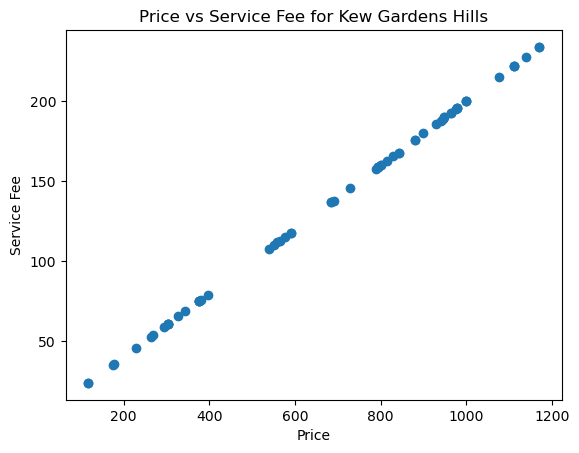

Bay Terrace


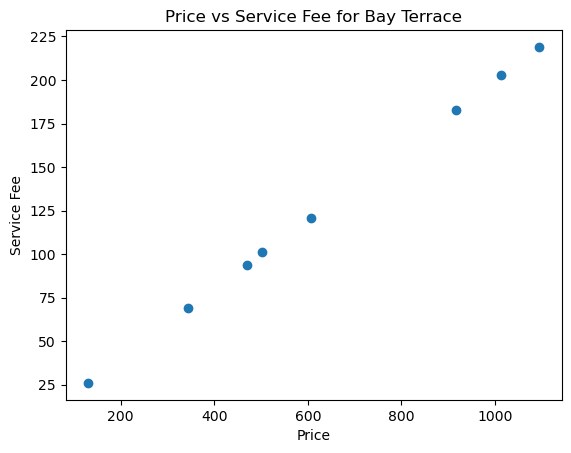

Norwood


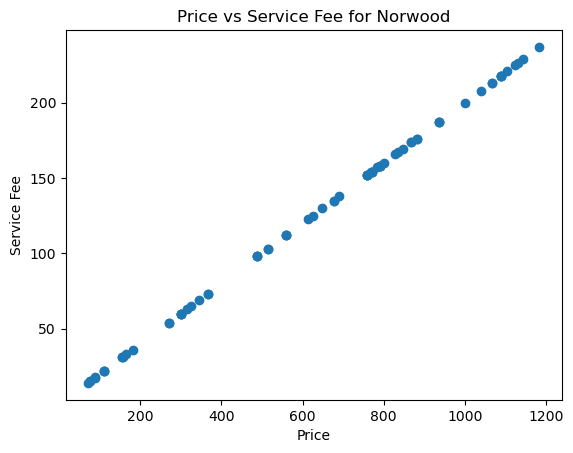

Claremont Village


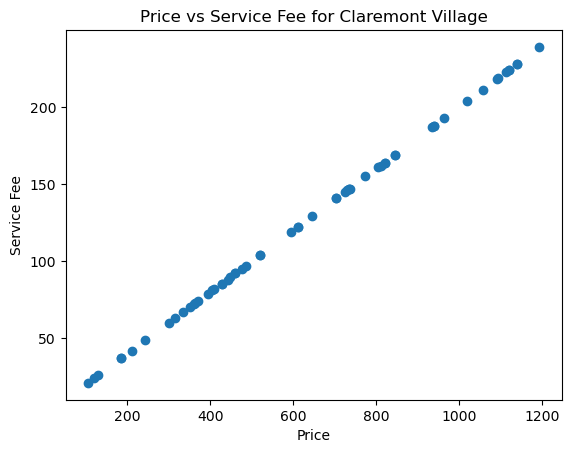

Whitestone


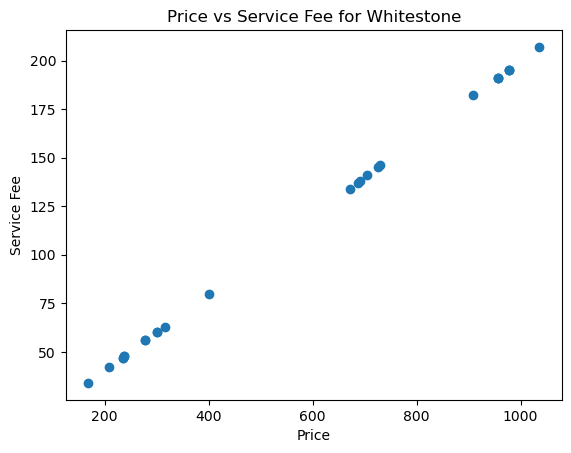

Fordham


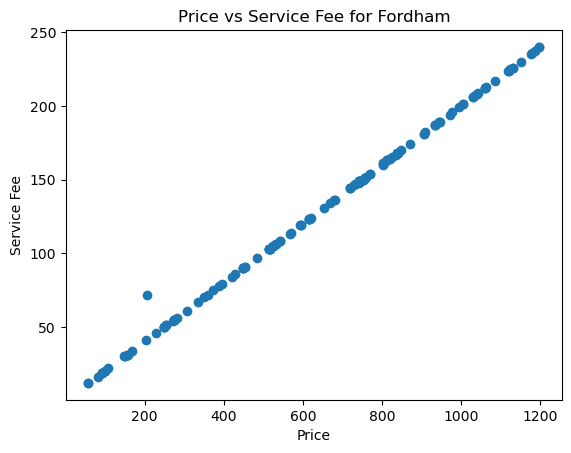

Bayswater


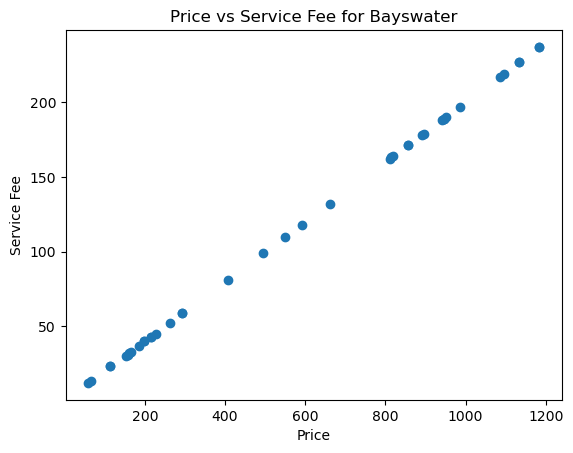

Navy Yard


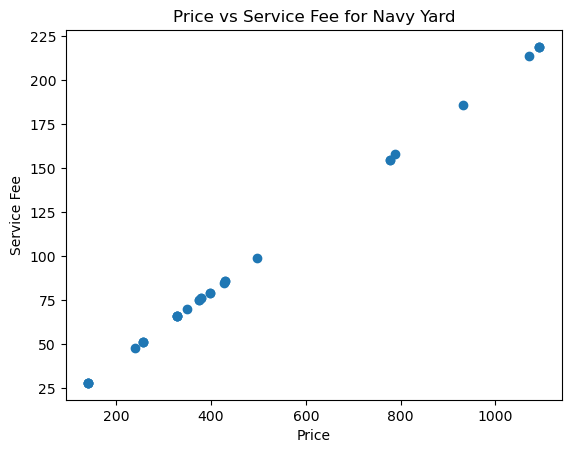

Brownsville


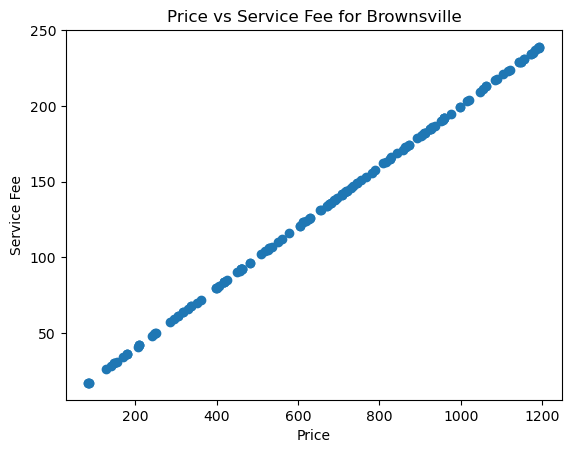

Eltingville


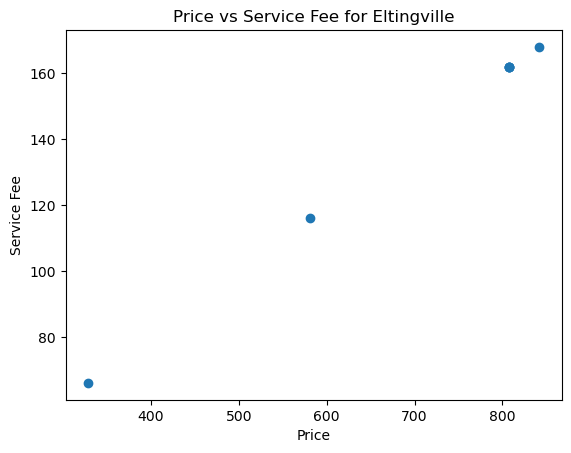

Fresh Meadows


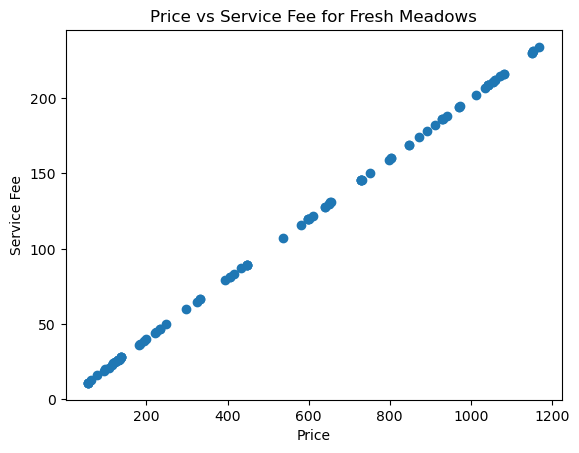

Mount Hope


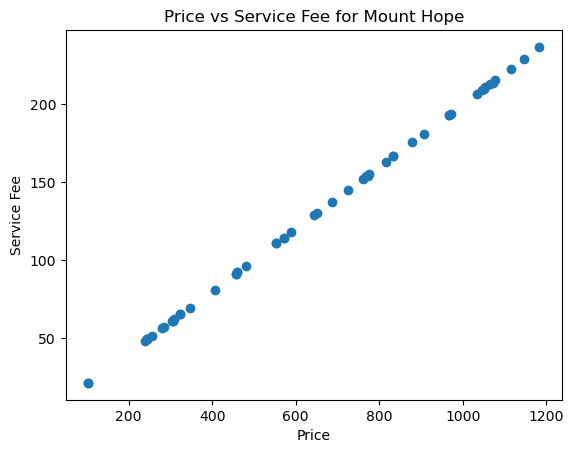

Lighthouse Hill


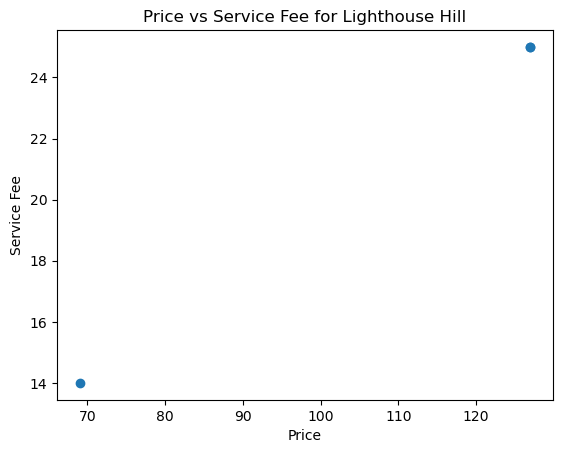

Springfield Gardens


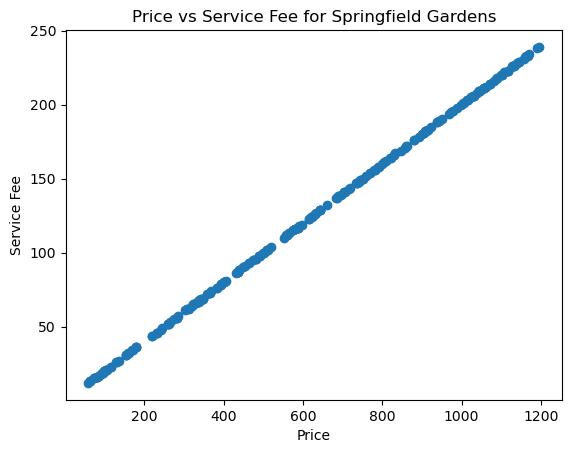

Howard Beach


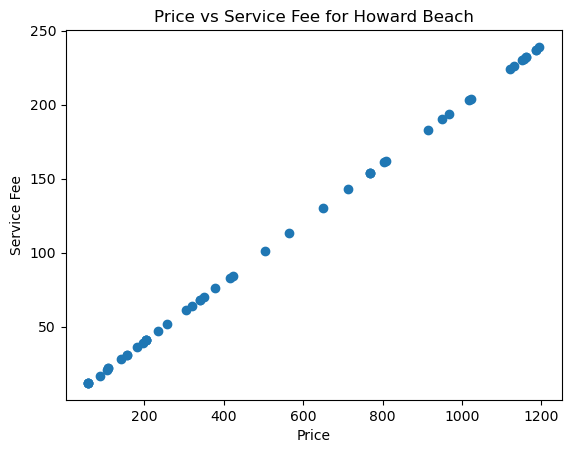

Belle Harbor


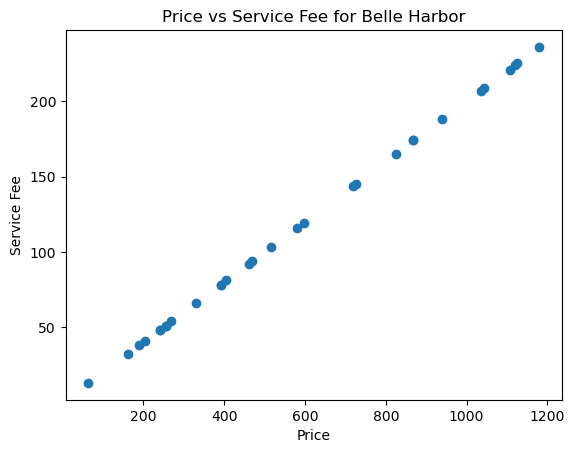

Jamaica Estates


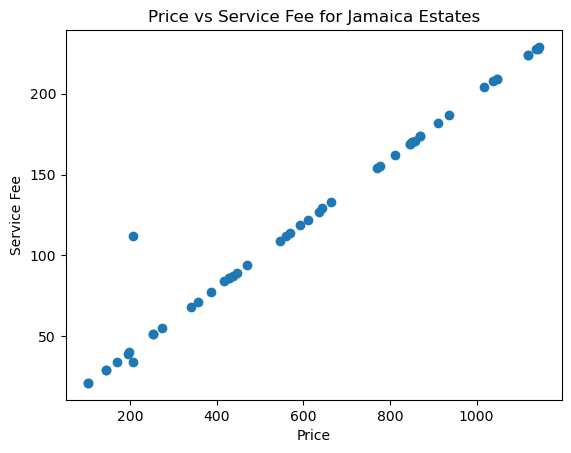

Van Nest


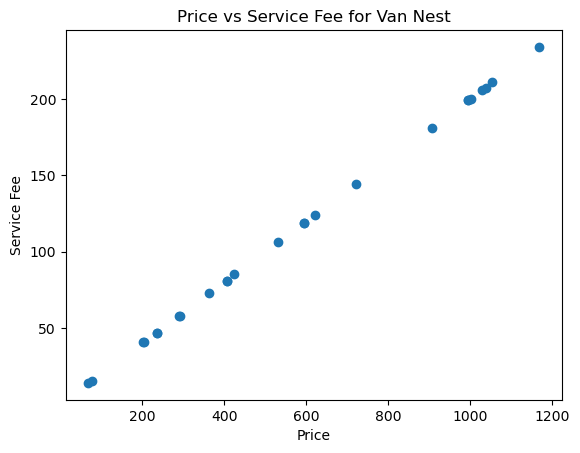

Morris Park


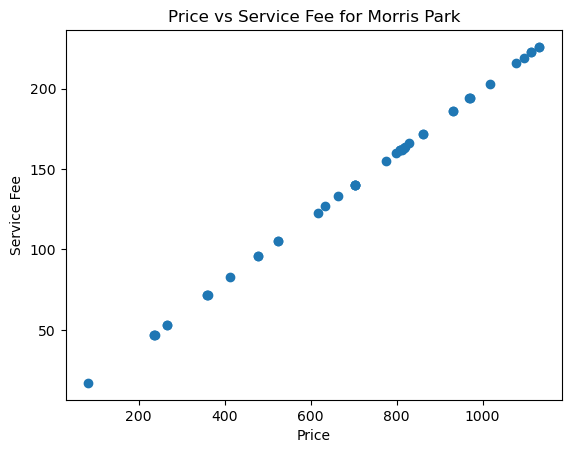

West Brighton


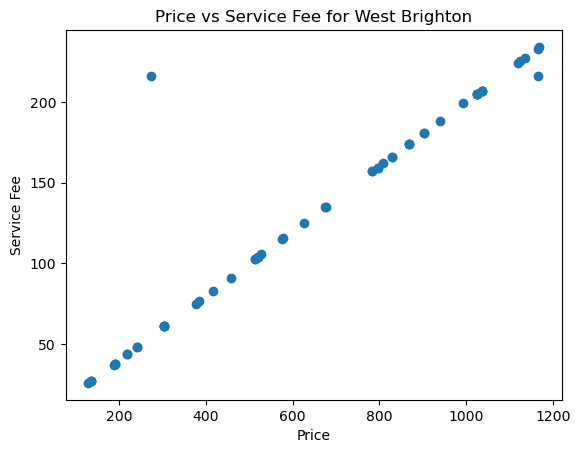

Far Rockaway


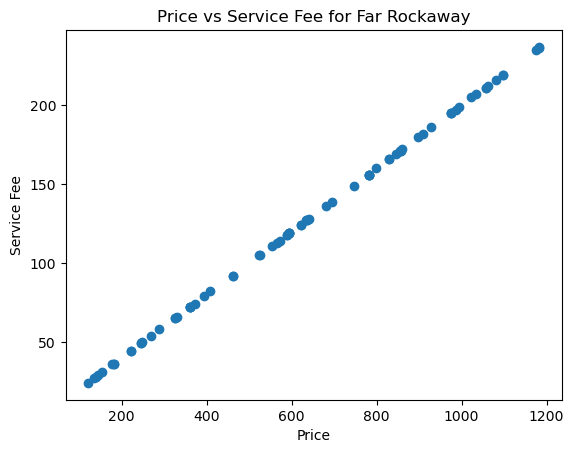

South Ozone Park


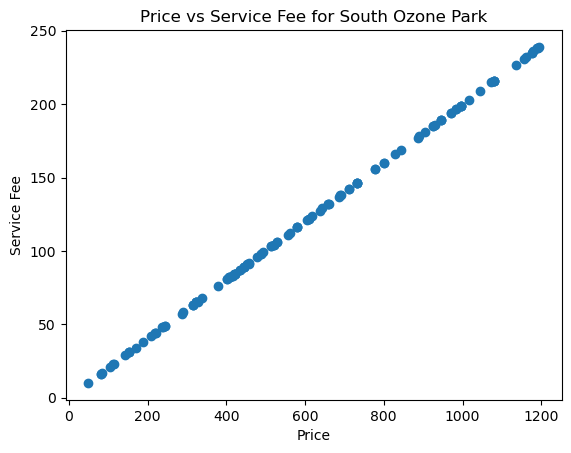

Tremont


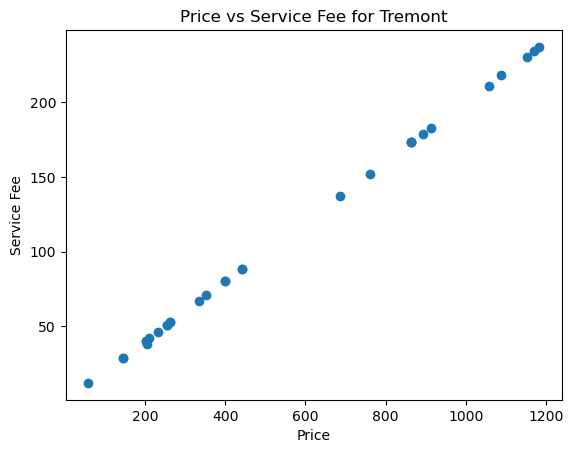

Corona


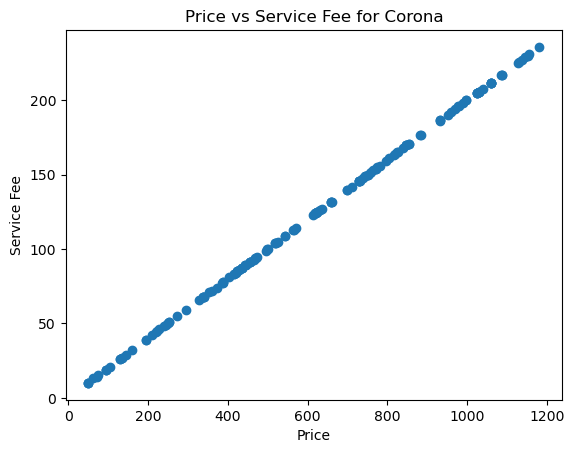

Great Kills


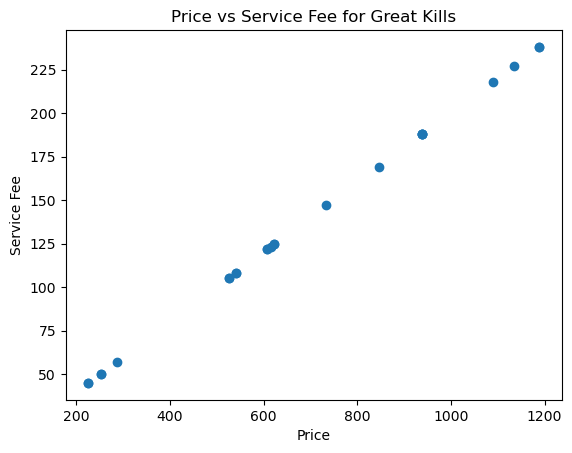

Manhattan Beach


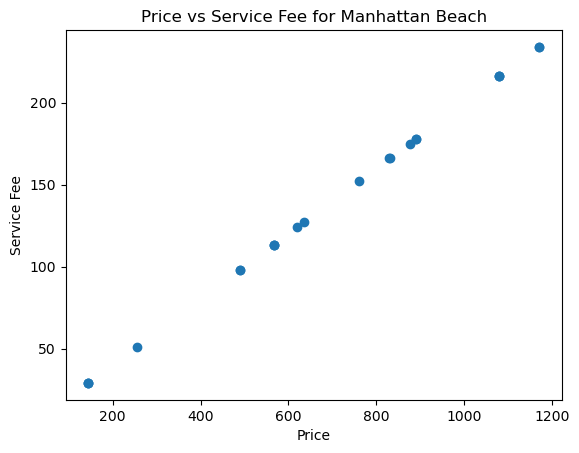

Marble Hill


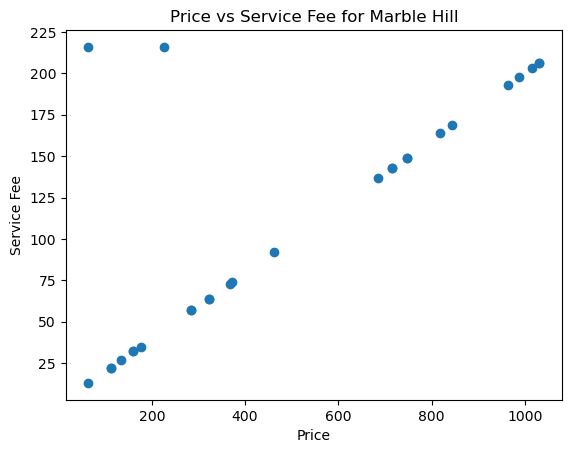

Dongan Hills


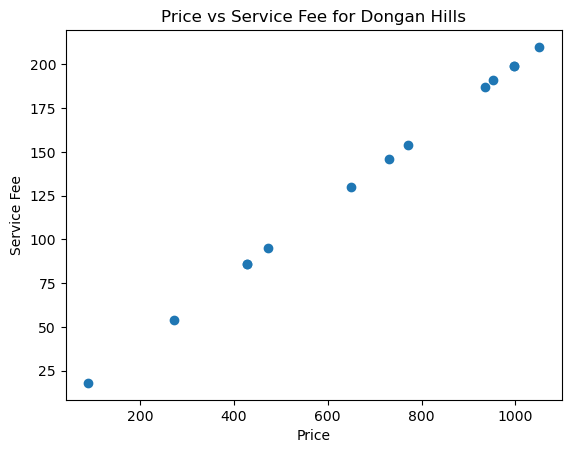

Castleton Corners


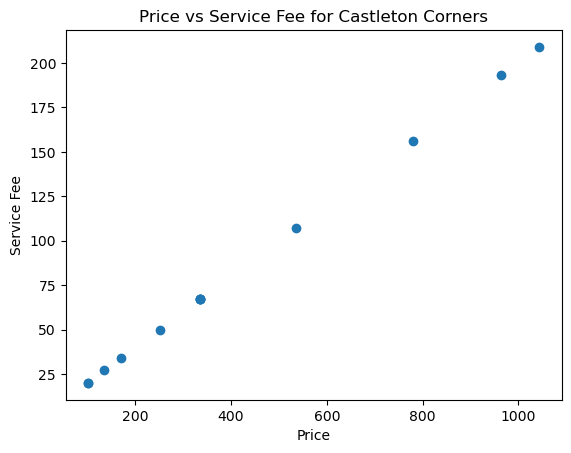

East Morrisania


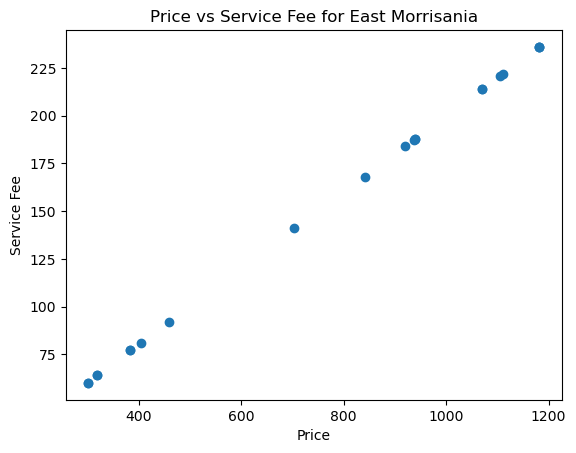

Hunts Point


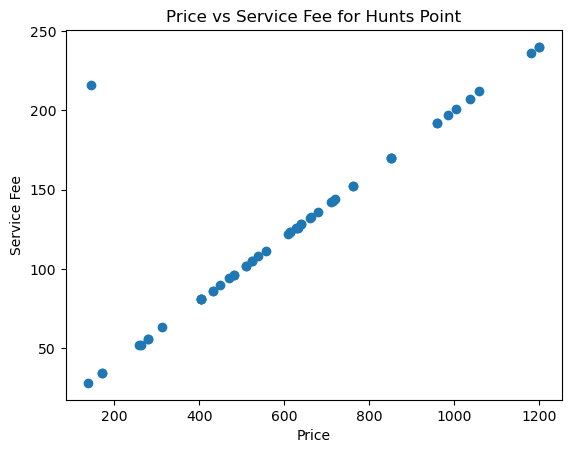

Neponsit


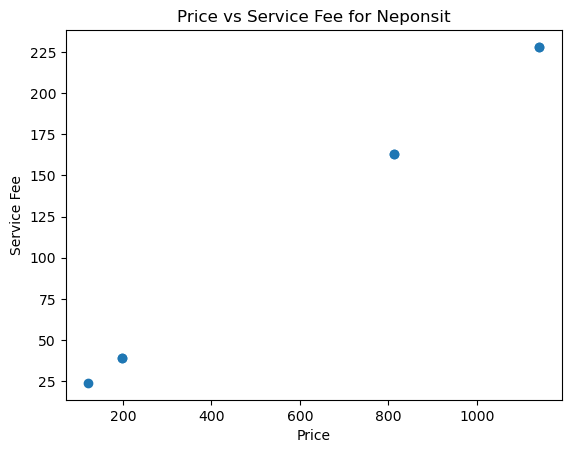

Pelham Bay


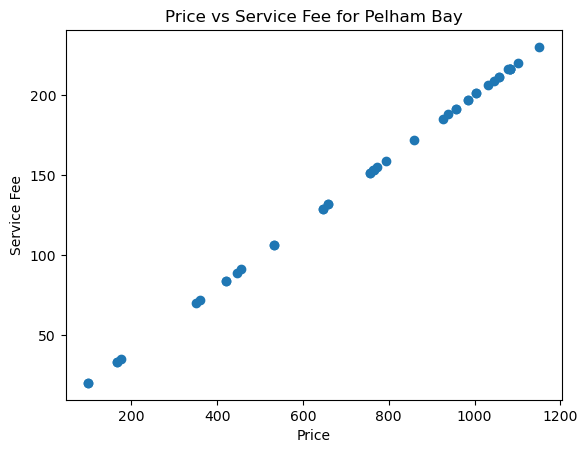

Randall Manor


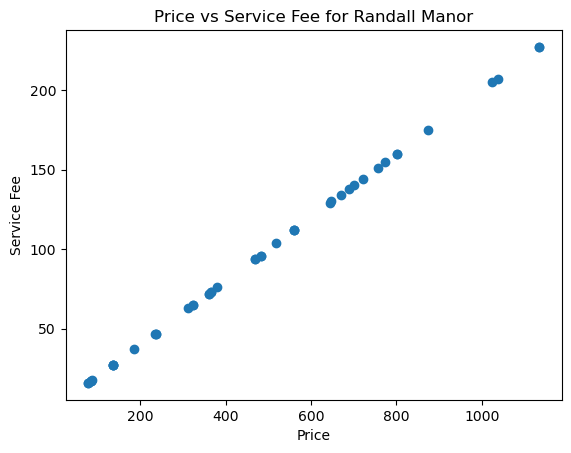

Throgs Neck


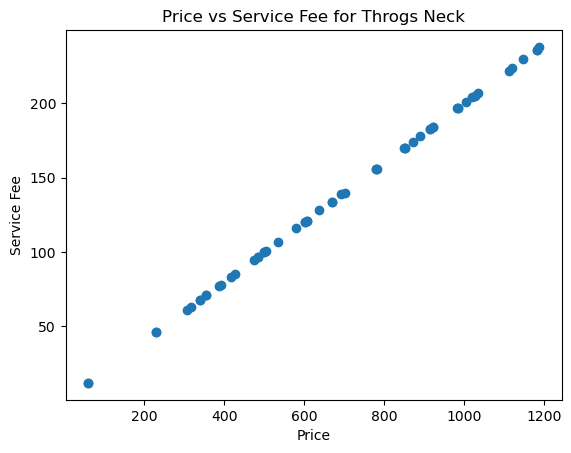

Todt Hill


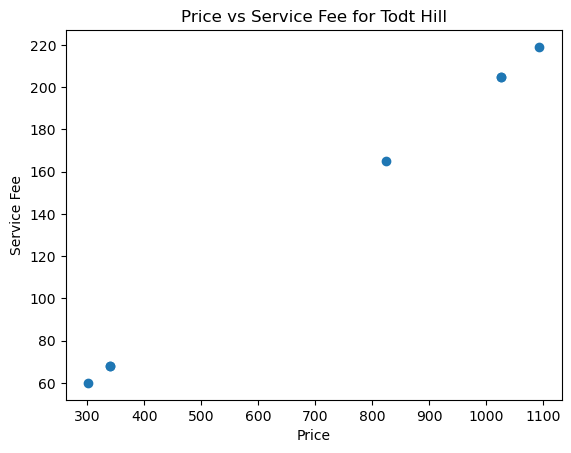

West Farms


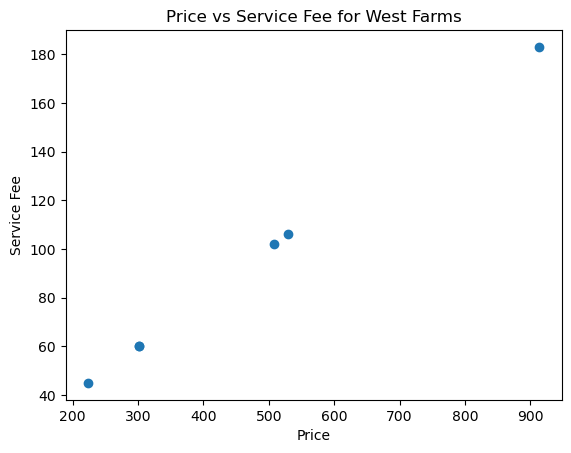

Silver Lake


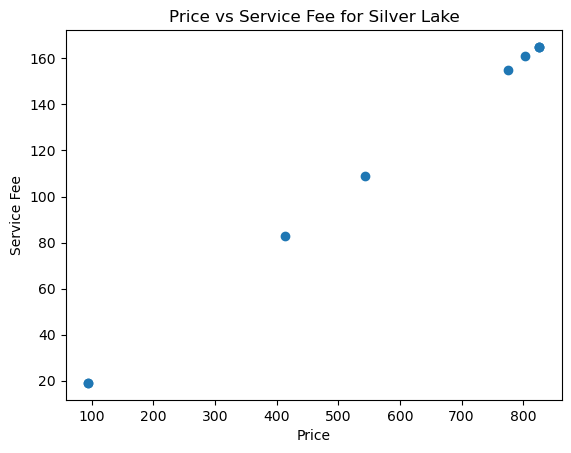

Morrisania


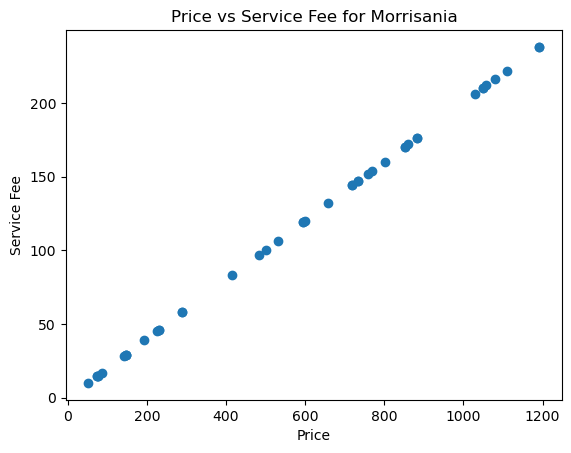

Laurelton


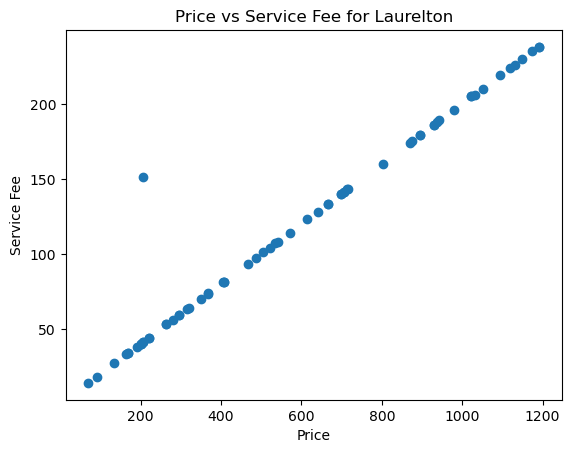

Grymes Hill


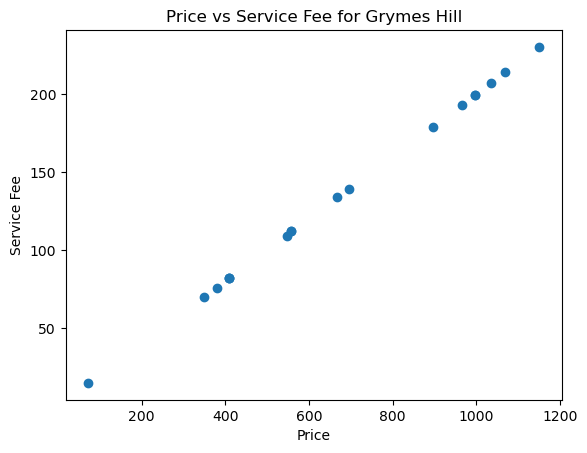

Holliswood


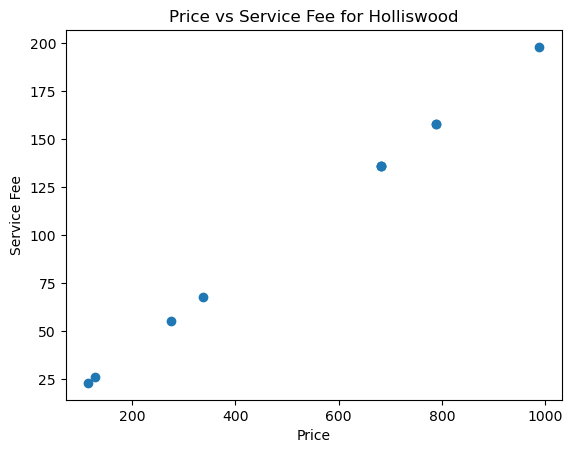

Pelham Gardens


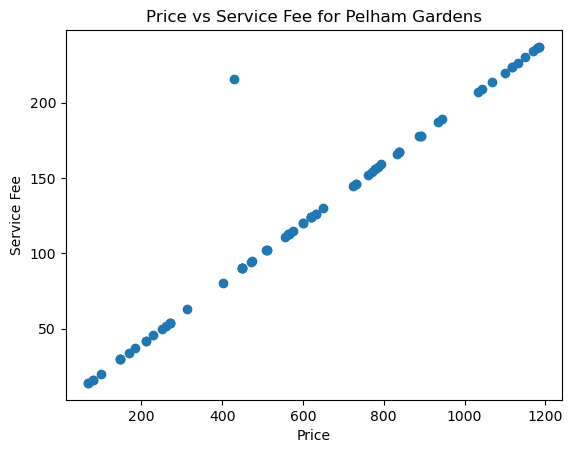

Belmont


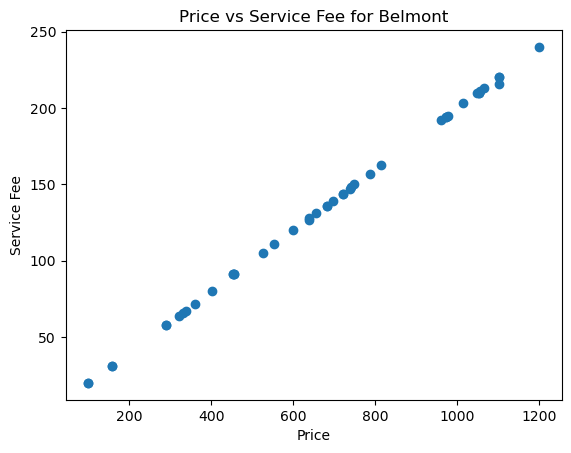

Rosedale


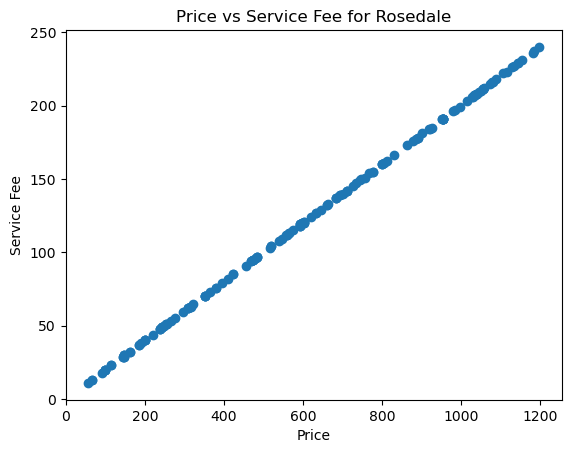

Edgemere


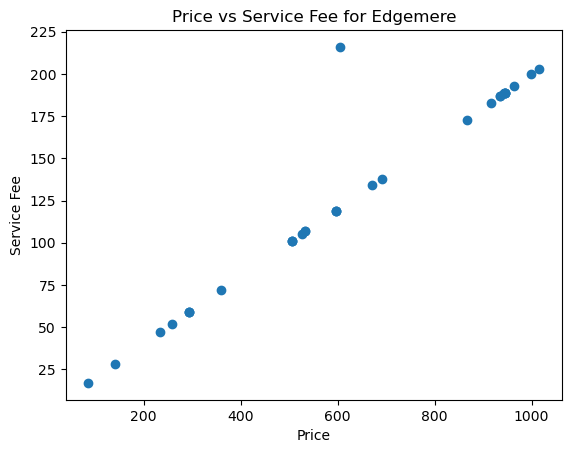

New Brighton


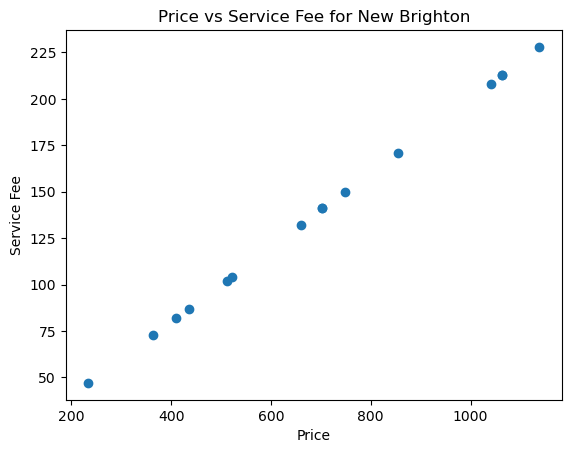

Midland Beach


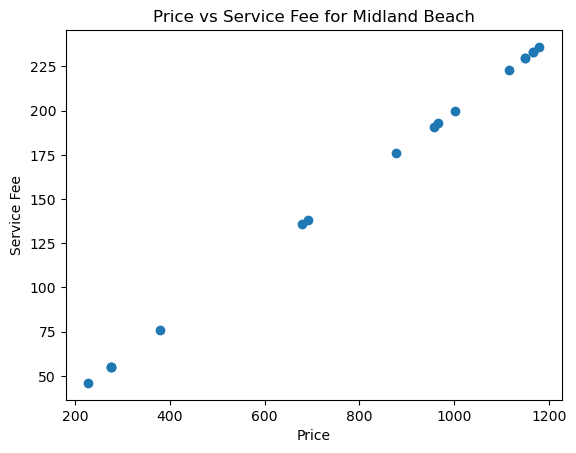

Baychester


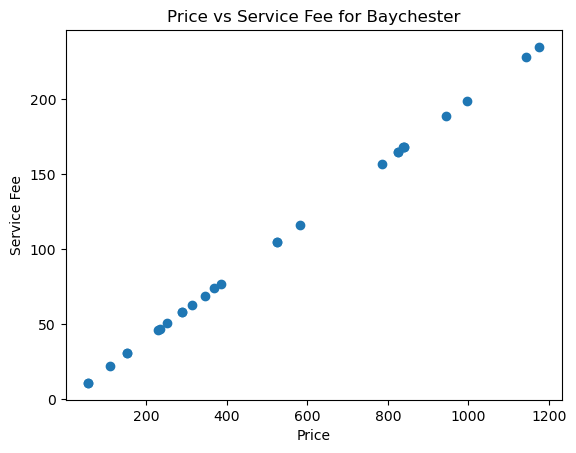

Melrose


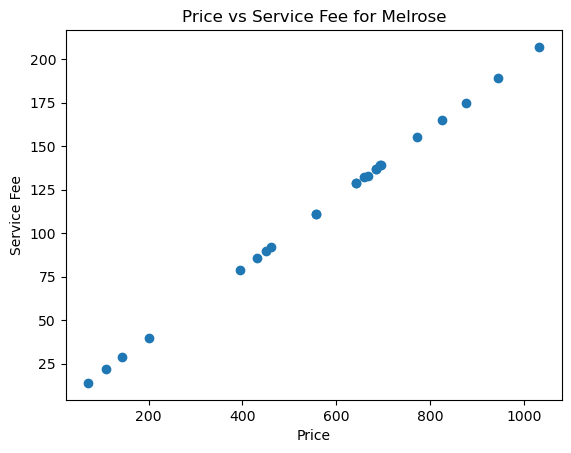

Bergen Beach


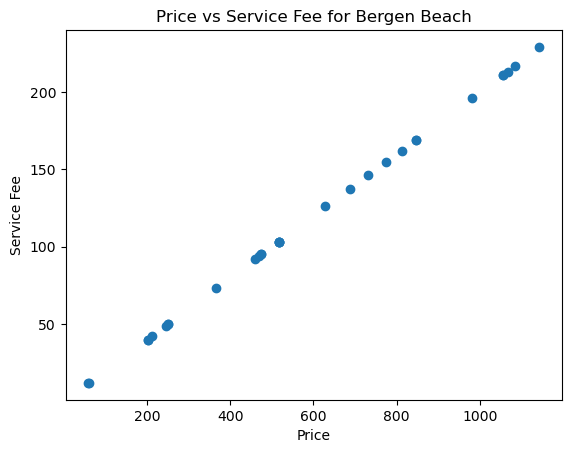

Richmondtown


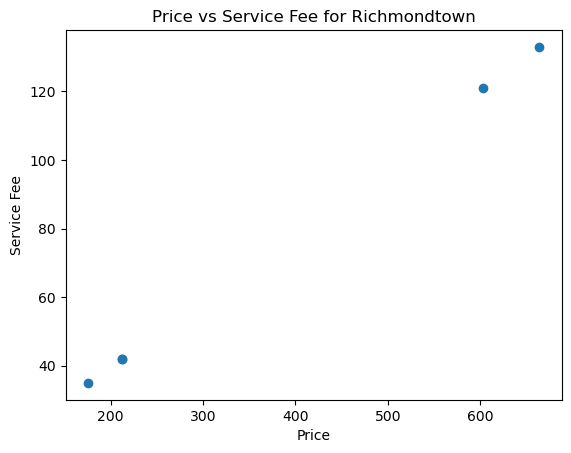

Howland Hook


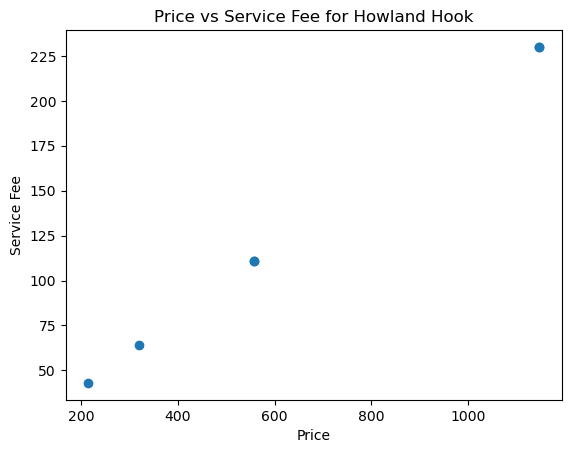

Schuylerville


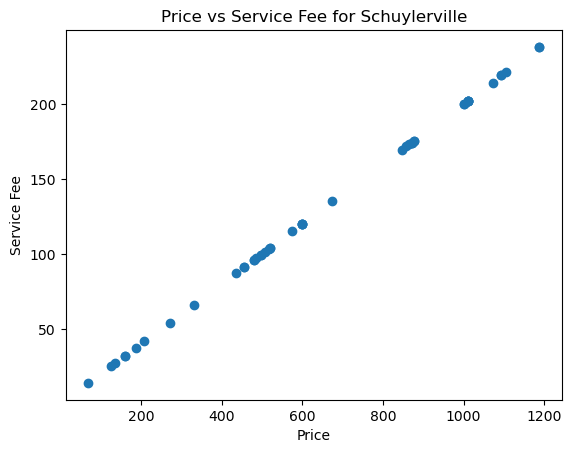

Coney Island


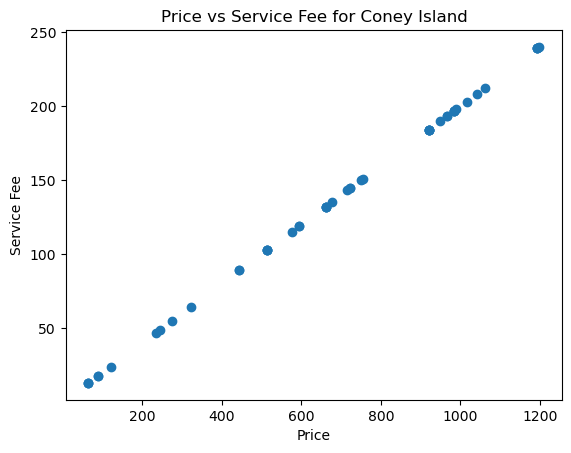

New Dorp Beach


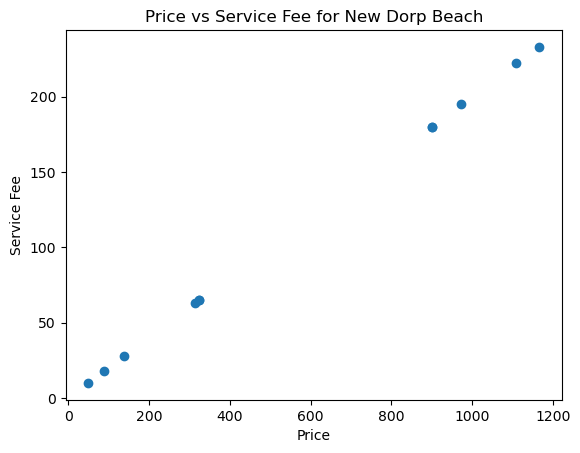

Prince's Bay


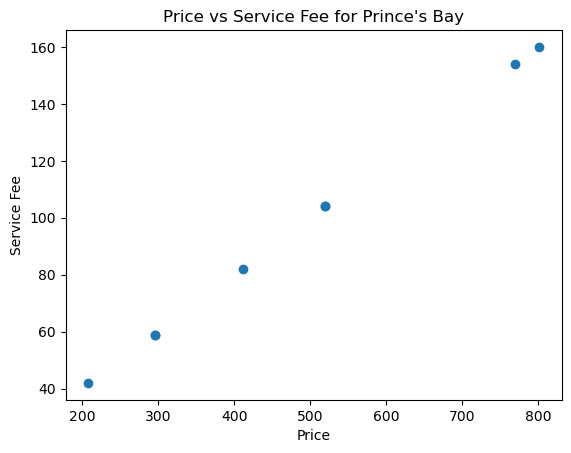

South Beach


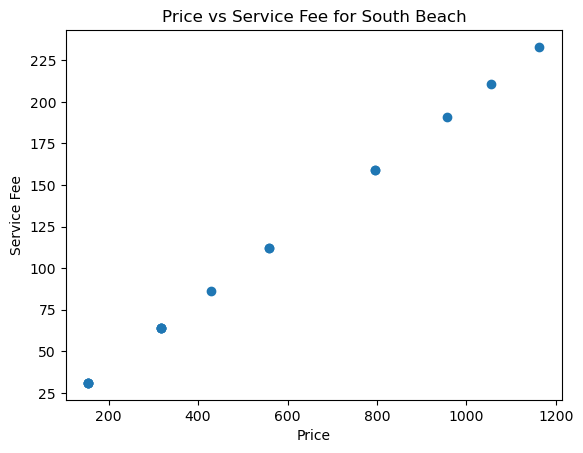

Bath Beach


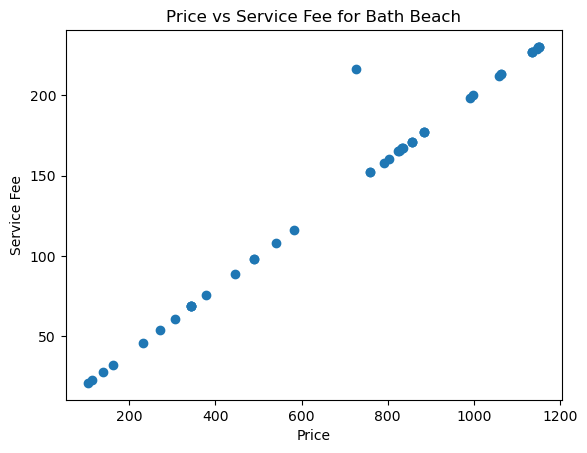

Jamaica Hills


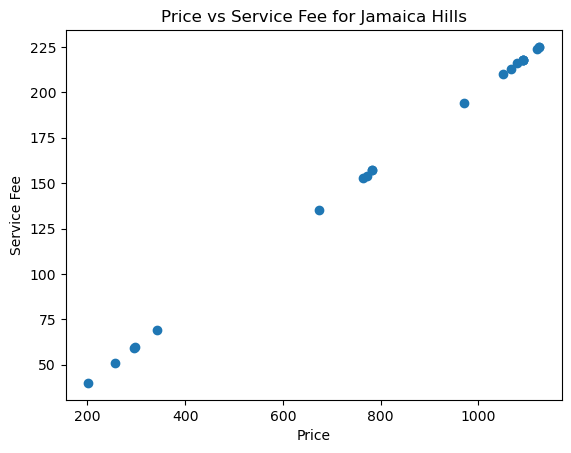

Oakwood


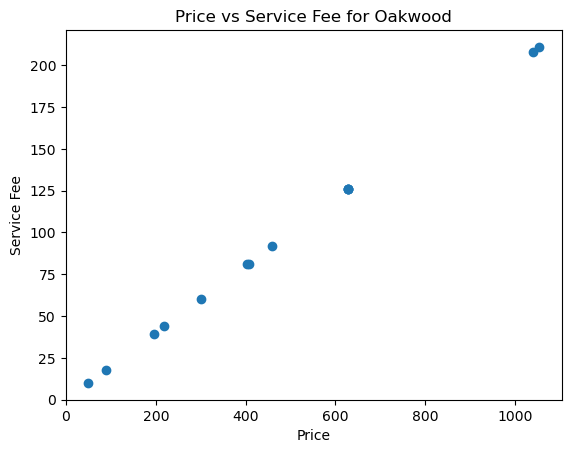

Castle Hill


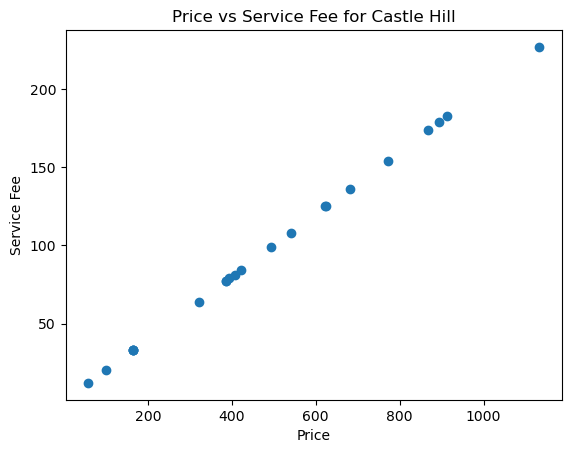

Hollis


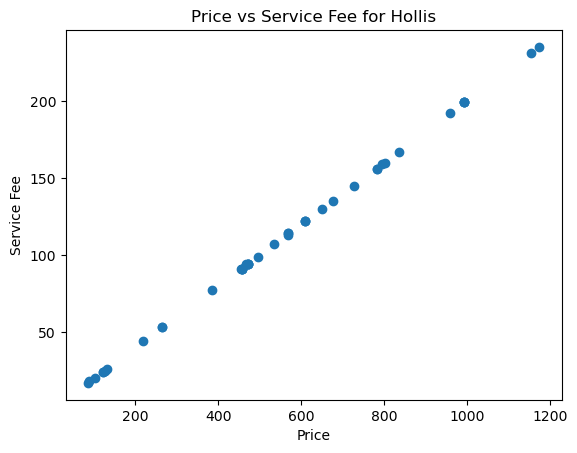

Douglaston


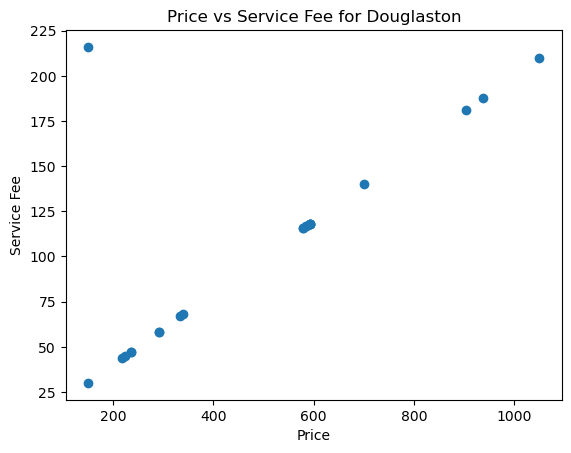

Huguenot


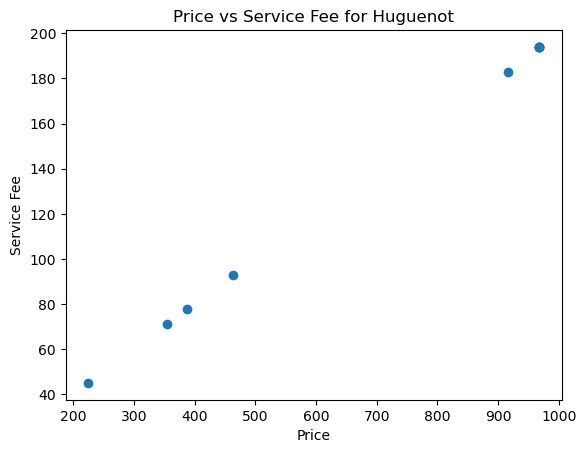

Olinville


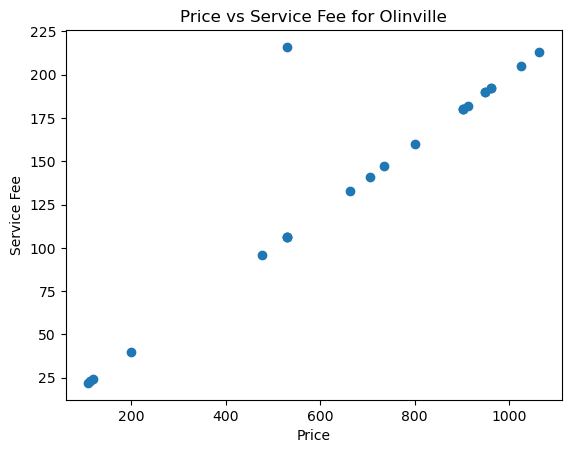

Edenwald


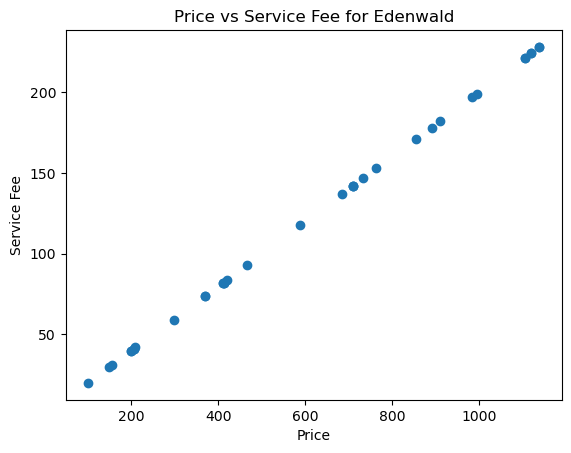

Grant City


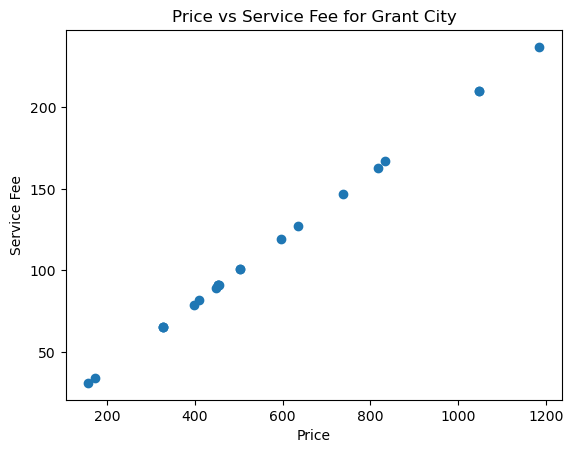

Westerleigh


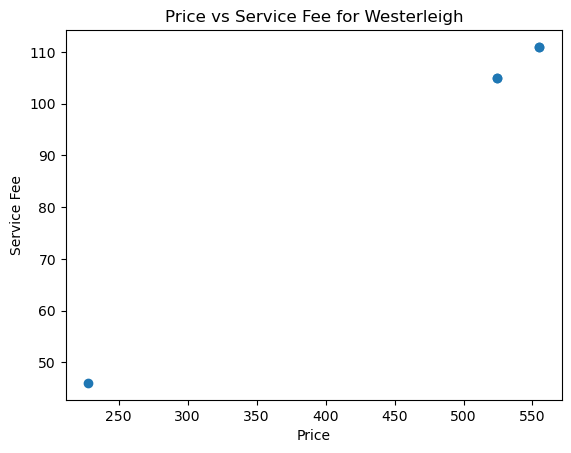

Bay Terrace, Staten Island


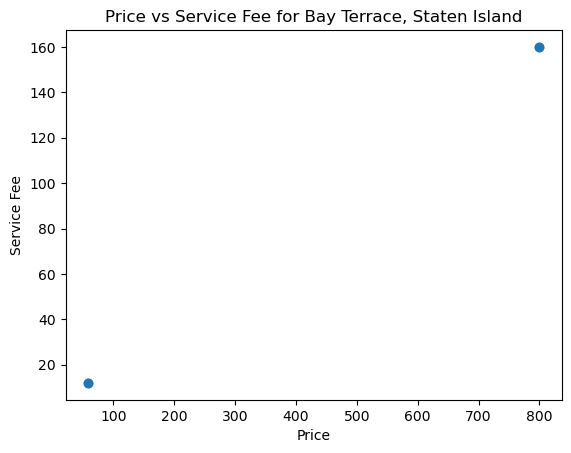

Westchester Square


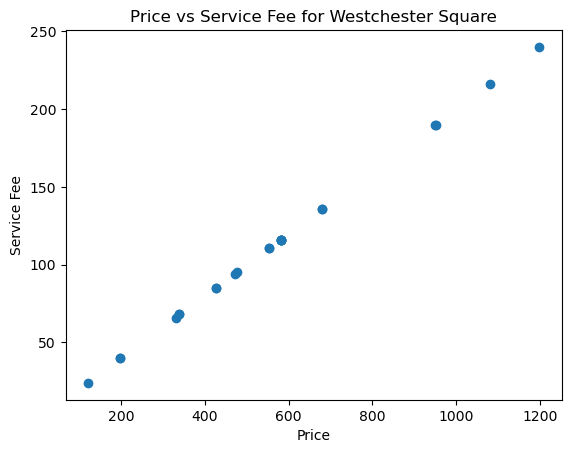

Little Neck


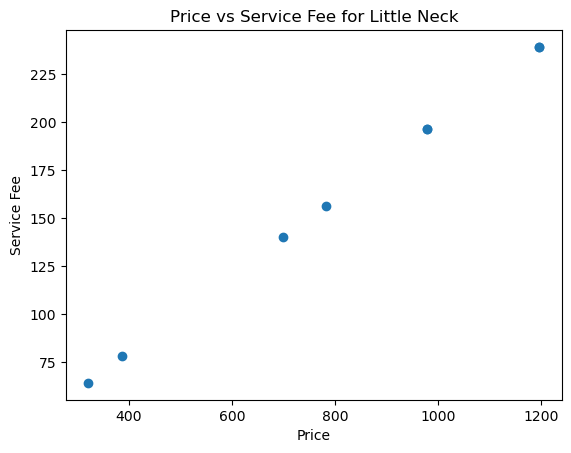

Fort Wadsworth


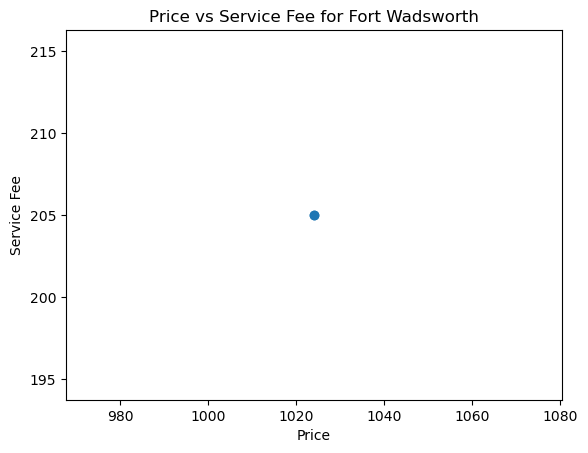

Rosebank


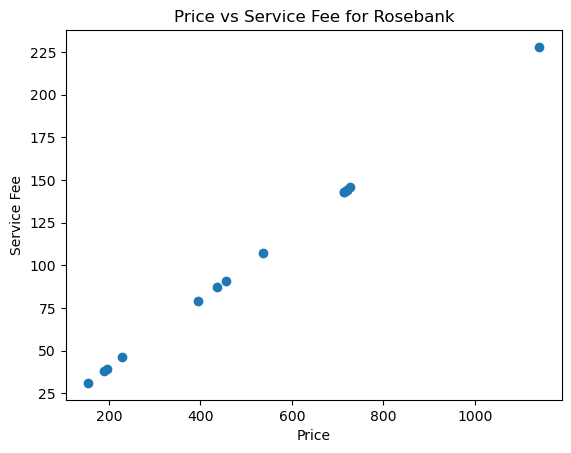

Unionport


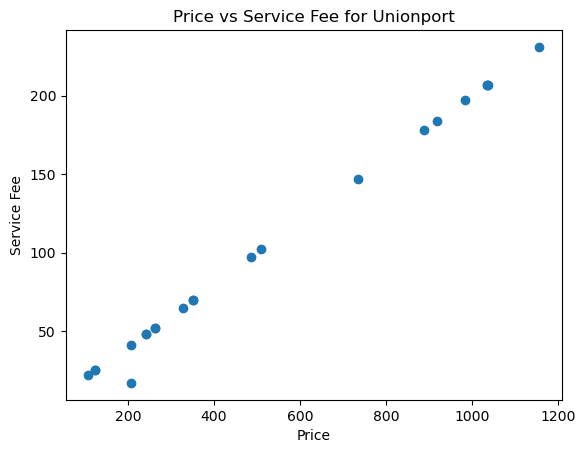

Mill Basin


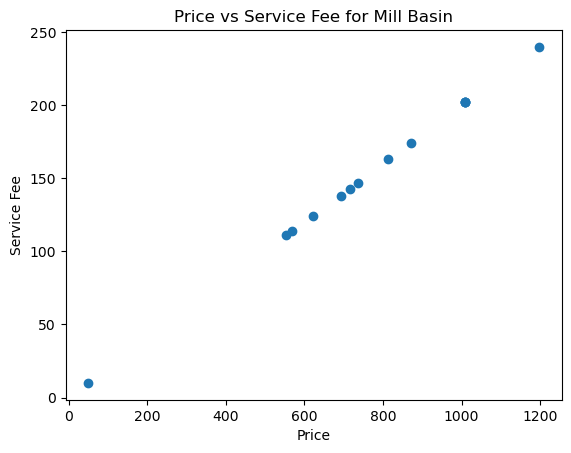

Arden Heights


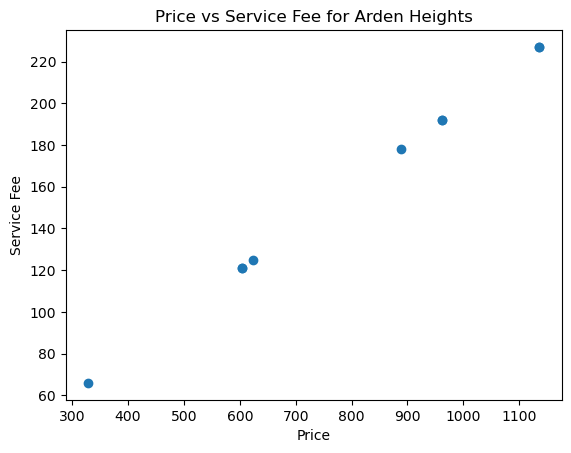

Bull's Head


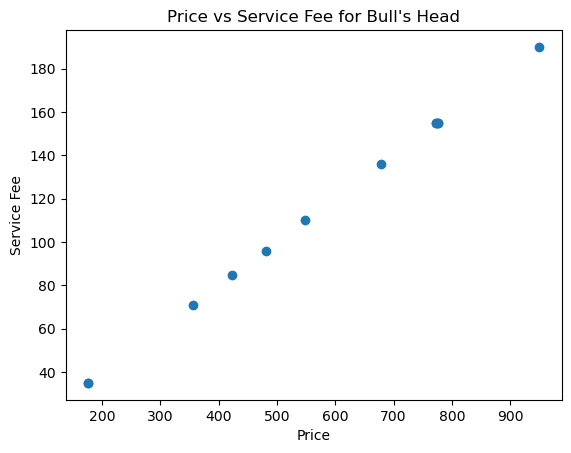

New Dorp


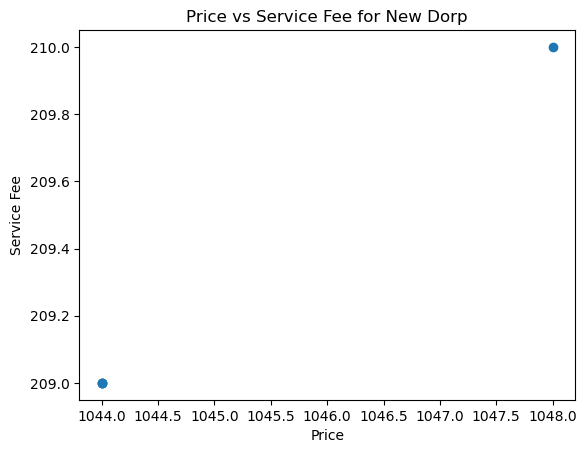

Rossville


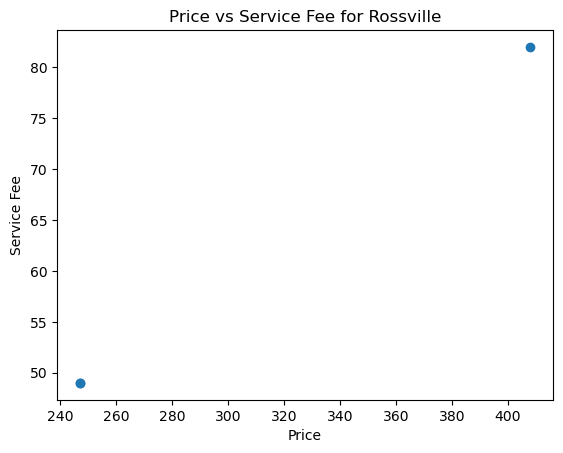

Breezy Point


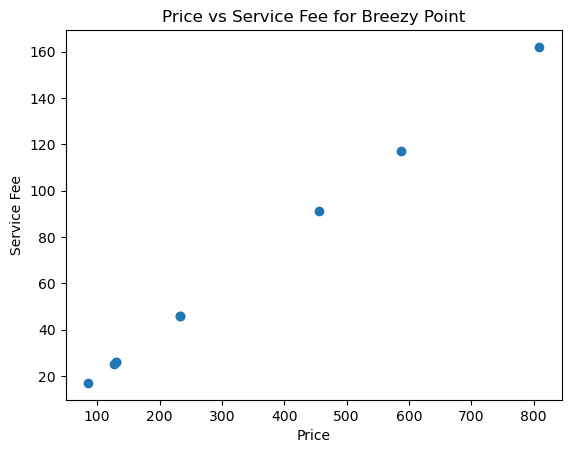

Willowbrook


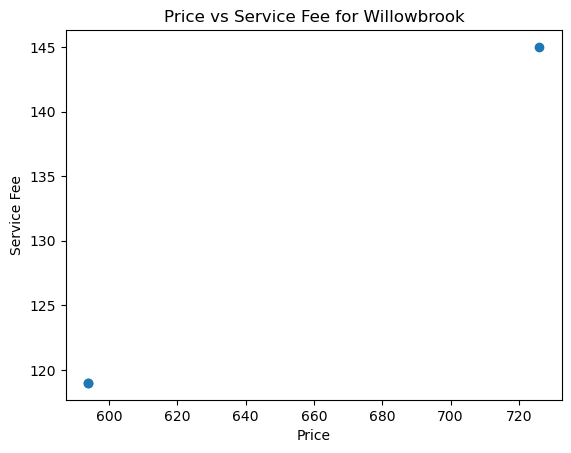

Glen Oaks


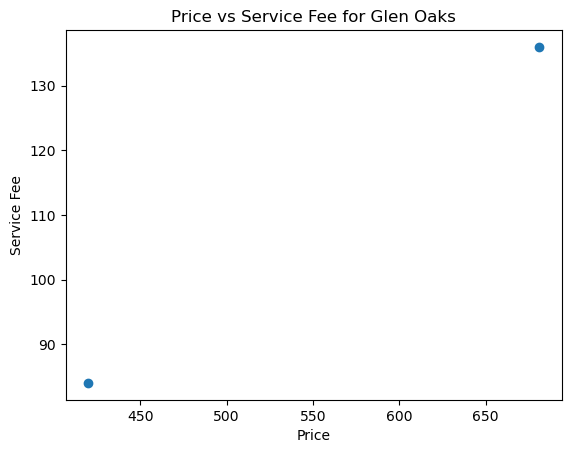

Gerritsen Beach


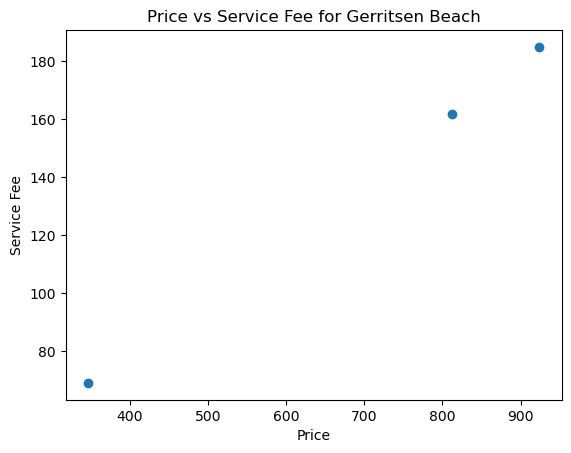

Chelsea, Staten Island


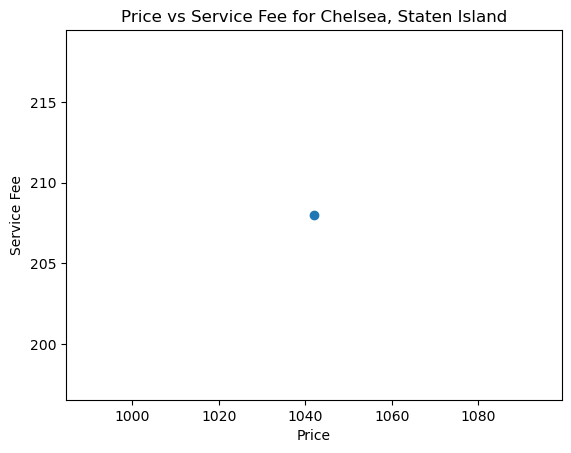

In [43]:
## Plotting relationship between Price and Service fee

unique_cities = df['neighbourhood'].unique()

for city in unique_cities:
    city_data = df.loc[df['neighbourhood'] == city, ['price', 'service_fee']]
    print(city)
    
    plt.figure()
    
    plt.scatter(city_data['price'], city_data['service_fee'])
    
    plt.title(f'Price vs Service Fee for {city}')
    plt.xlabel('Price')
    plt.ylabel('Service Fee')
    plt.show()